# Housekeeping

---



In [1]:
pip install yfinance # Install yfinance

     |████████████████████████████████| 6.4 MB 13.4 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
pip install ta

  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=89cc41d9a44f60664b3852a0a471ab0c0df1ce5c4d6a4f3849858b1ac5a66360
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta


In [3]:
pip install sqldf

In [4]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 133 kB 8.6 MB/s 


In [5]:
pip install beautifulsoup4

In [6]:
pip install graphviz

In [7]:
pip install -q snscrape

In [8]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 7.0 MB/s 


In [9]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import time
import requests
import io
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
%matplotlib inline
import sqldf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
from keras_tuner import BayesianOptimization
from bs4 import BeautifulSoup
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import snscrape.modules.twitter as sntwitter #for tweets
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import sklearn.metrics as metrics
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz

# Use keras tuner
# https://medium.com/swlh/hyperparameter-tuning-in-keras-tensorflow-2-with-keras-tuner-randomsearch-hyperband-3e212647778f

pd.set_option('display.max_columns', None, 'display.expand_frame_repr', False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Exploratory Data Analysis & Data Import

## Explore Price Data 

In [10]:
#Choose stocks to analyze 
stocks = ["AMZN","GOOG","TSLA"]

#Import price data 
df = yf.download(stocks,
                 period="2y",  #Choice of: “1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max”
                 interval="1d",  #Choice of: “1m”, “2m”, “5m”, “15m”, “30m”, “60m”, “90m”, “1h”, “1d”, “5d”, “1wk”, “1mo”, “3mo”
                 group_by= 'ticker'
                 )
#(Bland, 2020)
df

[*********************100%***********************]  3 of 3 completed


GOOG                                                                      TSLA                                                                       AMZN                                                             
                   Open         High          Low        Close    Adj Close   Volume         Open         High         Low        Close    Adj Close     Volume         Open         High          Low        Close    Adj Close   Volume
Date                                                                                                                                                                                                                                     
2020-04-23  1271.550049  1293.310059  1265.670044  1276.310059  1276.310059  1566200   145.520004   146.800003  140.626007   141.126007   141.126007   66183500  2399.979980  2424.219971  2382.080078  2399.449951  2399.449951  5066600
2020-04-24  1261.170044  1280.400024  1249.449951  1279.310059  1279.310059  1639600   142.162003   146.145996  139.636002   145.029999   145.029999   66060000  2417.000000  2420.429932  2382.000000  2410.219971  2410.219971  3824900
2020-04-27  1296.000000  1296.150024  1269.000000  1275.880005  1275.880005  1600600   147.522003   159.897995  147.000000   159.750000   159.750000  103407000  2443.199951  2444.879883  2363.000000  2376.000000  2376.000000  5645600
2020-04-28  1287.930054  1288.050049  1232.199951  1233.670044  1233.670044  2951300   159.128006   161.000000  151.337997   153.824005   153.824005   76110000  2372.100098  2373.500000  2306.000000  2314.080078  2314.080078  5269400
2020-04-29  1341.459961  1359.989990  1325.339966  1341.479980  1341.479980  3793600   158.033997   160.639999  156.632004   160.102005   160.102005   81080000  2330.010010  2391.889893  2310.000000  2372.709961  2372.709961  4591600
...                 ...          ...          ...          ...          ...      ...          ...          ...         ...          ...          ...        ...          ...          ...          ...          ...          ...      ...
2022-04-18  2548.199951  2574.239990  2531.569092  2559.219971  2559.219971   745900   989.030029  1014.919983  973.409973  1004.289978  1004.289978   17238400  3030.469971  3080.790039  3005.010010  3055.699951  3055.699951  2325700
2022-04-19  2561.540039  2618.074951  2549.030029  2610.620117  2610.620117  1136000  1005.059998  1034.939941  995.330017  1028.150024  1028.150024   16615900  3040.590088  3172.979980  3031.010010  3162.310059  3162.310059  2746300
2022-04-20  2625.679932  2638.469971  2557.881104  2564.909912  2564.909912  1130500  1030.000000  1034.000000  975.250000   977.200012   977.200012   23570400  3152.050049  3152.050049  3072.070068  3079.959961  3079.959961  2981500
2022-04-21  2587.000000  2606.149902  2493.000000  2498.750000  2498.750000  1507900  1074.729980  1092.219971  996.419983  1008.780029  1008.780029   35138800  3094.280029  3134.760010  2951.790039  2965.919922  2965.919922  3198500
2022-04-22  2500.000000  2509.040039  2382.810059  2392.280029  2392.280029  2317600  1014.909973  1034.849976  994.000000  1005.049988  1005.049988   23181600  2965.000000  2992.300049  2873.949951  2887.000000  2887.000000  3649800

[505 rows x 18 columns]

In [11]:
#Check data for completeness
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-04-23 to 2022-04-22
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (GOOG, Open)       505 non-null    float64
 1   (GOOG, High)       505 non-null    float64
 2   (GOOG, Low)        505 non-null    float64
 3   (GOOG, Close)      505 non-null    float64
 4   (GOOG, Adj Close)  505 non-null    float64
 5   (GOOG, Volume)     505 non-null    int64  
 6   (TSLA, Open)       505 non-null    float64
 7   (TSLA, High)       505 non-null    float64
 8   (TSLA, Low)        505 non-null    float64
 9   (TSLA, Close)      505 non-null    float64
 10  (TSLA, Adj Close)  505 non-null    float64
 11  (TSLA, Volume)     505 non-null    int64  
 12  (AMZN, Open)       505 non-null    float64
 13  (AMZN, High)       505 non-null    float64
 14  (AMZN, Low)        505 non-null    float64
 15  (AMZN, Close)      505 non-null    float64
 16  (AMZN, 

Stock data is complete with no null values and variable formats are correct

Text(0, 0.5, 'Close Price')

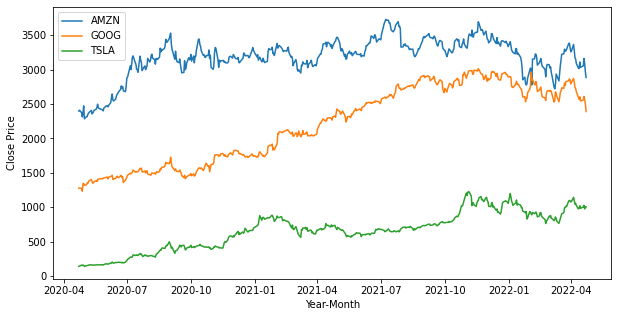

In [12]:
#Plot close price of stocks

fig, ax = plt.subplots(figsize=(10, 5))
for stock in stocks:
  ax.plot(df.index, df[stock]["Close"], label=stock)
ax.legend()
ax.set_xlabel("Year-Month")
ax.set_ylabel("Close Price")

Text(0, 0.5, 'Traded Volume')

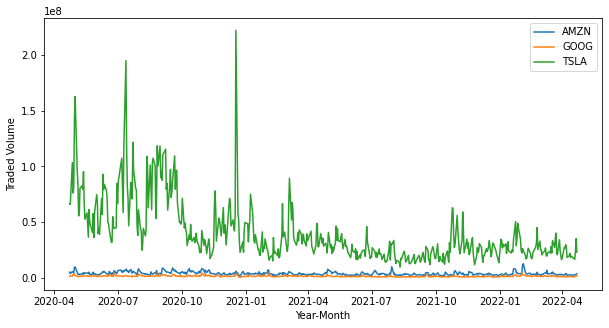

In [13]:
#Plot stock volume

jfig, ax = plt.subplots(figsize=(10, 5))
for stock in stocks:
  ax.plot(df.index, df[stock]["Volume"], label=stock)
ax.legend()
ax.set_xlabel("Year-Month")
ax.set_ylabel("Traded Volume")

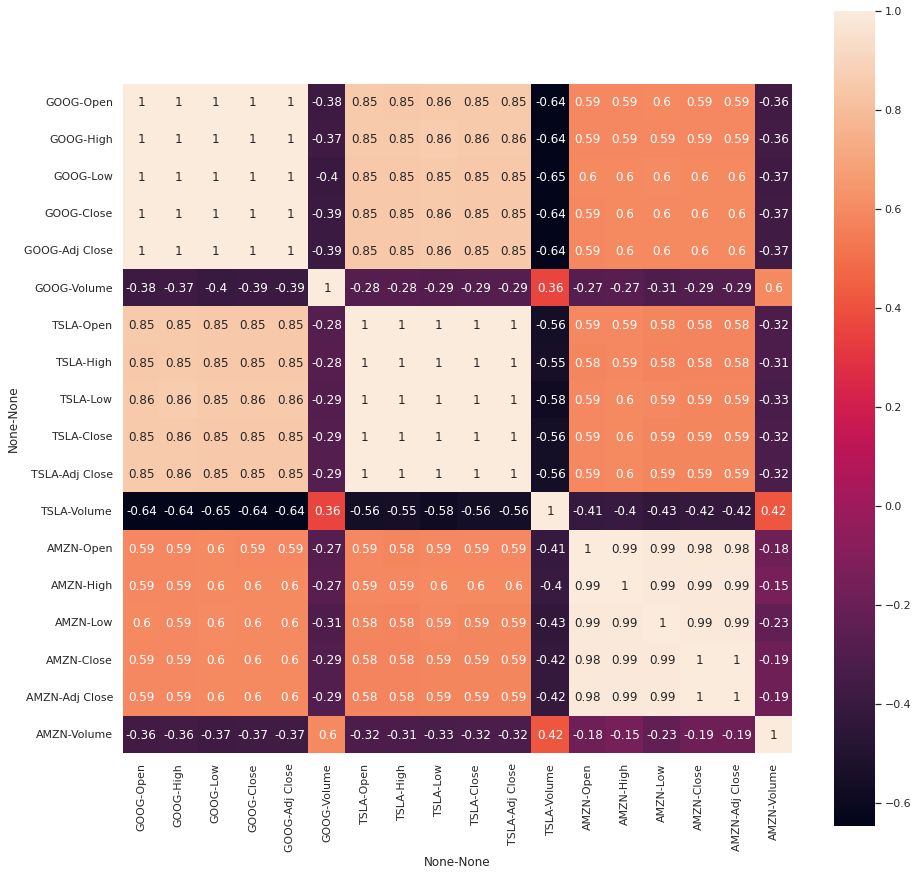

In [14]:
#Check for correlation between variables among and within stocks 

df_corr = df.corr()

sns.set(rc = {'figure.figsize':(15,15)})
df_corr_mat = sns.heatmap(df_corr, annot = True, square = True)

plt.show()

Some interesting points:
*   High trading volume seems to be negatively correlated with price for Amazon and Google but the opposite for Tesla.
*   Medium positive correlation between Amazon and Google trading volume. Could be due to being in same index funds.
*   Overall prices have medium to strong correlation across different stocks
*   Not really a surprise that different prices for the same stocks are strongly correlated

##Investigating stock volatility in the S&P 500

In [15]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)
#(Wikipedia, 2022)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'id':"constituents"})

dfsnpticker=pd.read_html(str(indiatable))
# convert list to dataframe
dfsnpticker=pd.DataFrame(dfsnpticker[0])
print(dfsnpticker.head())
#(Lakhotia, 2020)

200
  Symbol     Security SEC filings  GICS Sector         GICS Sub-Industry    Headquarters Location Date first added      CIK      Founded
0    MMM           3M     reports  Industrials  Industrial Conglomerates    Saint Paul, Minnesota       1976-08-09    66740         1902
1    AOS  A. O. Smith     reports  Industrials         Building Products     Milwaukee, Wisconsin       2017-07-26    91142         1916
2    ABT       Abbott     reports  Health Care     Health Care Equipment  North Chicago, Illinois       1964-03-31     1800         1888
3   ABBV       AbbVie     reports  Health Care           Pharmaceuticals  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)
4   ABMD      Abiomed     reports  Health Care     Health Care Equipment   Danvers, Massachusetts       2018-05-31   815094         1981


In [16]:
#Import price data for the S&P 500

sandp500 = dfsnpticker['Symbol'].tolist()

SAPdf = yf.download(sandp500,
                 period="6mo",  #Choice of: “1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max”
                 interval="1d",  #Choice of: “1m”, “2m”, “5m”, “15m”, “30m”, “60m”, “90m”, “1h”, “1d”, “5d”, “1wk”, “1mo”, “3mo”
                 #group_by= 'ticker'
                 )
#(Bland, 2020)

SAPdf["Close"].head()

[*********************100%***********************]  504 of 504 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


A        AAL         AAP        AAPL        ABBV         ABC        ABMD         ABT         ACN        ADBE         ADI        ADM         ADP        ADSK        AEE        AEP        AES        AFL        AIG         AIZ         AJG        AKAM         ALB        ALGN        ALK         ALL        ALLE        AMAT   AMCR         AMD         AME        AMGN         AMP         AMT         AMZN        ANET        ANSS        ANTM         AON        AOS        APA         APD        APH        APTV         ARE        ATO       ATVI         AVB        AVGO         AVY         AWK         AXP          AZO          BA        BAC        BAX       BBWI         BBY         BDX        BEN  BF.B        BIIB         BIO         BK         BKNG        BKR         BLK        BLL        BMY          BR  BRK.B        BRO        BSX        BWA         BXP          C        CAG        CAH       CARR         CAT          CB        CBOE        CBRE         CCI        CCL        CDAY        CDNS         CDW          CE  CEG       CERN         CF        CFG        CHD       CHRW        CHTR          CI        CINF         CL         CLX        CMA      CMCSA         CME          CMG         CMI        CMS        CNC        CNP         COF         COO        COP        COST        CPB        CPRT         CPT         CRL         CRM       CSCO        CSX        CTAS        CTLT       CTRA       CTSH       CTVA       CTXS        CVS         CVX         CZR          D        DAL         DD          DE         DFS          DG         DGX        DHI         DHR         DIS       DISH         DLR        DLTR         DOV        DOW         DPZ        DRE         DRI         DTE         DUK         DVA        DVN        DXC        DXCM          EA       EBAY         ECL         ED         EFX        EIX          EL         EMN        EMR        ENPH        EOG        EPAM        EQIX        EQR         ES         ESS         ETN         ETR        ETSY       EVRG          EW        EXC        EXPD        EXPE         EXR          F        FANG       FAST          FB        FBHS        FCX         FDS         FDX         FE        FFIV         FIS        FISV       FITB         FLT        FMC        FOX       FOXA         FRC         FRT        FTNT        FTV          GD          GE       GILD        GIS         GL        GLW         GM        GNRC         GOOG        GOOGL         GPC         GPN        GRMN          GS         GWW        HAL        HAS       HBAN         HCA          HD        HES        HIG         HII         HLT       HOLX         HON    HPE        HPQ        HRL       HSIC        HST         HSY         HUM        HWM         IBM         ICE        IDXX         IEX         IFF        ILMN       INCY       INTC        INTU         IP        IPG        IPGP         IQV         IR        IRM        ISRG          IT         ITW        IVZ           J        JBHT        JCI        JKHY         JNJ       JNPR         JPM          K        KEY        KEYS        KHC        KIM        KLAC         KMB        KMI         KMX         KO         KR          L        LDOS         LEN          LH         LHX         LIN        LKQ         LLY         LMT        LNC        LNT         LOW        LRCX   LUMN        LUV        LVS         LW        LYB         LYV          MA         MAA         MAR        MAS         MCD       MCHP         MCK         MCO       MDLZ         MDT        MET        MGM         MHK        MKC        MKTX         MLM         MMC         MMM       MNST         MO         MOH        MOS        MPC        MPWR        MRK        MRNA        MRO          MS        MSCI        MSFT         MSI         MTB        MTCH          MTD         MU       NCLH        NDAQ        NDSN        NEE        NEM        NFLX         NI         NKE       NLOK       NLSN         NOC         NOW        NRG         NSC       NTAP        NTRS         NUE        NVDA          NVR        NWL        NWS       NWSA        NXPI          O        ODFL 

In [17]:
#Calculate standard deviation for stocks

SD_dict = {}

for stock in SAPdf["Close"].columns:
  SD_dict[stock] = SAPdf["Close"][stock].std()

SD_df = pd.DataFrame.from_dict(SD_dict, orient= "index", columns=['Std dev'])
SD_df.dropna(inplace=True)
SD_df

Std dev
A     11.546445
AAL    1.710020
AAP   11.880923
AAPL   9.153640
ABBV  16.879202
...         ...
YUM    5.847604
ZBH    6.936428
ZBRA  81.028422
ZION   3.325481
ZTS   17.415302

[502 rows x 1 columns]

In [18]:
#Sort stocks by volatility

SD_df.sort_values(by=['Std dev'], inplace=True)
print(SD_df.head(5))
print(SD_df.tail(5))

#Pick out least and most volatile stocks

stock_least_volatile = SD_df.first_valid_index()
stock_most_volatile = SD_df.last_valid_index()

print("Least volatile stock:", stock_least_volatile)
print("Most volatile stock:", stock_most_volatile)

       Std dev
AMCR  0.347434
KIM   0.774651
NWS   0.794100
NWSA  0.845367
T     0.888272
         Std dev
GOOG  143.157995
BKNG  168.206593
EPAM  170.177672
AMZN  230.226057
NVR   453.341205
Least volatile stock: AMCR
Most volatile stock: NVR


##Import Price Data

In [19]:
#Set stocks
stocks = [stock_least_volatile, stock_most_volatile] # AMCR, NVR

#Download stock data 
df = yf.download(stocks,
                 start = "2020-04-20",
                 end = "2022-04-20",
                 interval="1d",  #Choice of: “1m”, “2m”, “5m”, “15m”, “30m”, “60m”, “90m”, “1h”, “1d”, “5d”, “1wk”, “1mo”, “3mo”
                 group_by= 'ticker'
                 )
#(Bland, 2020)

df = df[[stock_least_volatile, stock_most_volatile]]
df

[*********************100%***********************]  2 of 2 completed


AMCR                                                   NVR                                                           
             Open   High    Low  Close  Adj Close   Volume         Open         High          Low        Close    Adj Close Volume
Date                                                                                                                              
2020-04-20   8.74   8.79   8.56   8.64   7.962883  4062500  2836.969971  2959.169922  2800.550049  2846.860107  2846.860107  32500
2020-04-21   8.32   8.46   8.18   8.26   7.612665  4576500  2782.000000  2879.620117  2782.000000  2805.439941  2805.439941  41600
2020-04-22   8.37   8.42   8.23   8.36   7.704828  3539400  2874.449951  2927.899902  2813.000000  2847.600098  2847.600098  46800
2020-04-23   8.40   8.51   8.20   8.21   7.566583  4101900  2809.550049  2840.000000  2718.010010  2746.330078  2746.330078  55900
2020-04-24   8.38   8.47   8.29   8.42   7.760125  3881100  2750.000000  2875.000000  2728.379883  2847.370117  2847.370117  46500
...           ...    ...    ...    ...        ...      ...          ...          ...          ...          ...          ...    ...
2022-04-12  11.75  11.83  11.59  11.66  11.660000  3042300  4400.000000  4499.939941  4332.850098  4352.020020  4352.020020  29100
2022-04-13  11.69  11.74  11.60  11.70  11.700000  4212000  4354.029785  4449.970215  4311.000000  4419.990234  4419.990234  20800
2022-04-14  11.73  11.80  11.67  11.67  11.670000  3345200  4453.160156  4480.000000  4312.009766  4335.450195  4335.450195  18800
2022-04-18  11.62  11.72  11.51  11.53  11.530000  3211300  4308.979980  4374.959961  4293.580078  4320.620117  4320.620117  13800
2022-04-19  11.49  11.80  11.49  11.76  11.760000  4107400  4356.979980  4461.439941  4356.979980  4444.640137  4444.640137  17500

[505 rows x 12 columns]

In [20]:
#Check stock data for completeness

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-04-20 to 2022-04-19
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (AMCR, Open)       505 non-null    float64
 1   (AMCR, High)       505 non-null    float64
 2   (AMCR, Low)        505 non-null    float64
 3   (AMCR, Close)      505 non-null    float64
 4   (AMCR, Adj Close)  505 non-null    float64
 5   (AMCR, Volume)     505 non-null    int64  
 6   (NVR, Open)        505 non-null    float64
 7   (NVR, High)        505 non-null    float64
 8   (NVR, Low)         505 non-null    float64
 9   (NVR, Close)       505 non-null    float64
 10  (NVR, Adj Close)   505 non-null    float64
 11  (NVR, Volume)      505 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 51.3 KB
None
             AMCR                                                                        NVR                                                       

Data is complete and in an appropriate format.

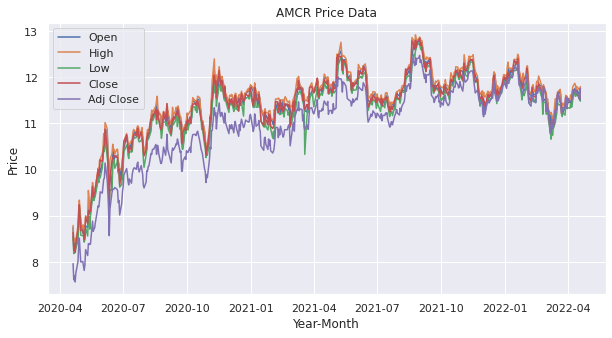

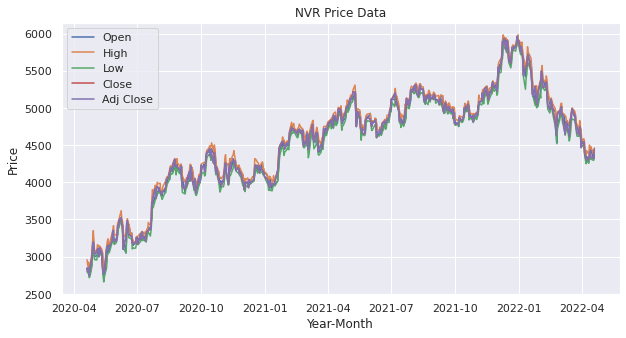

In [21]:
#Plot stock prices

df_no_vol = df.drop(["Volume"], level=1, axis=1)

for stock in stocks:
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(df_no_vol.index, df_no_vol[stock], label=stock)
  ax.legend(df_no_vol[stock])
  ax.set_xlabel("Year-Month")
  ax.set_ylabel("Price")
  ax.set_title(stock + " Price Data")

AMCR is a lower value stock which has seen an initial increase in the chosen period followed by a long level period.

NVR has a markedly higher value than AMCR. It has seen a gradual increase in price over most of the chosen period followed by a steep decrease in the final few months. Interestingly, this is the period that will be predicted.

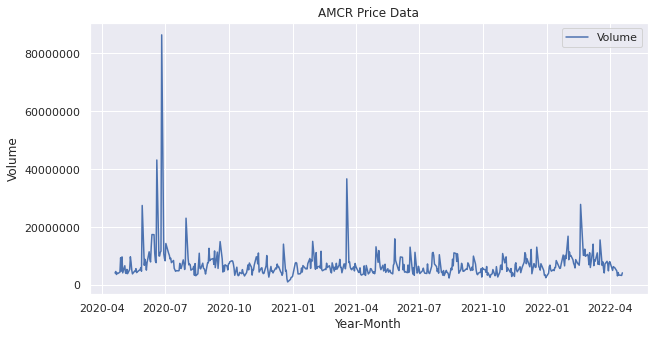

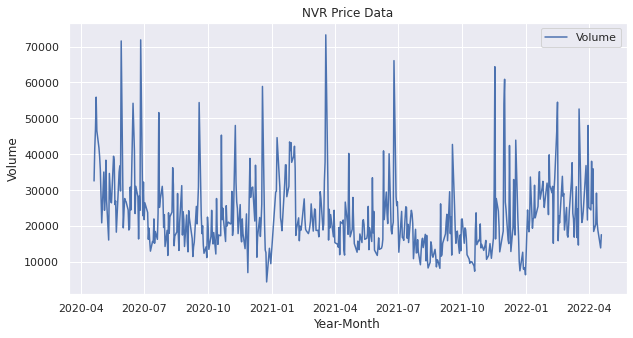

In [22]:
#Plot stock volumes

df_vol = df.drop(["Open","High","Low","Close","Adj Close"], level=1, axis=1)

for stock in stocks:
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(df_vol.index, df_vol[stock], label=stock)
  ax.legend(df_vol[stock])
  ax.set_xlabel("Year-Month")
  ax.set_ylabel("Volume")
  ax.set_title(stock + " Price Data")
  plt.ticklabel_format(style= 'plain', axis= 'y')

plt.show()

AMCR is traded a great deal more than NVR which makes sense given that it is a great deal cheaper to buy. This could contribute to AMCR's higher volatility.

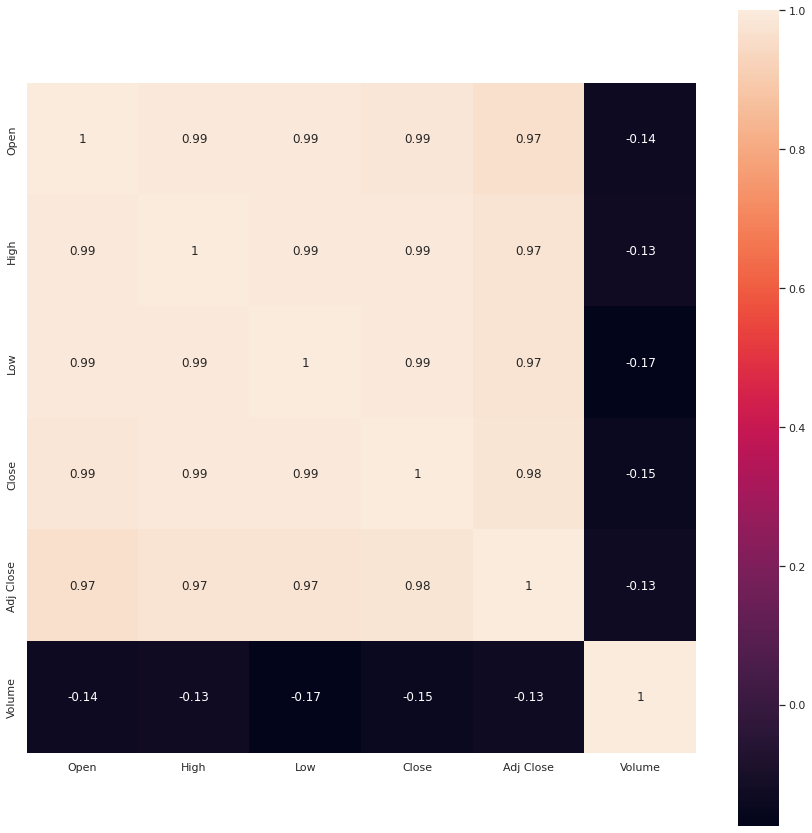

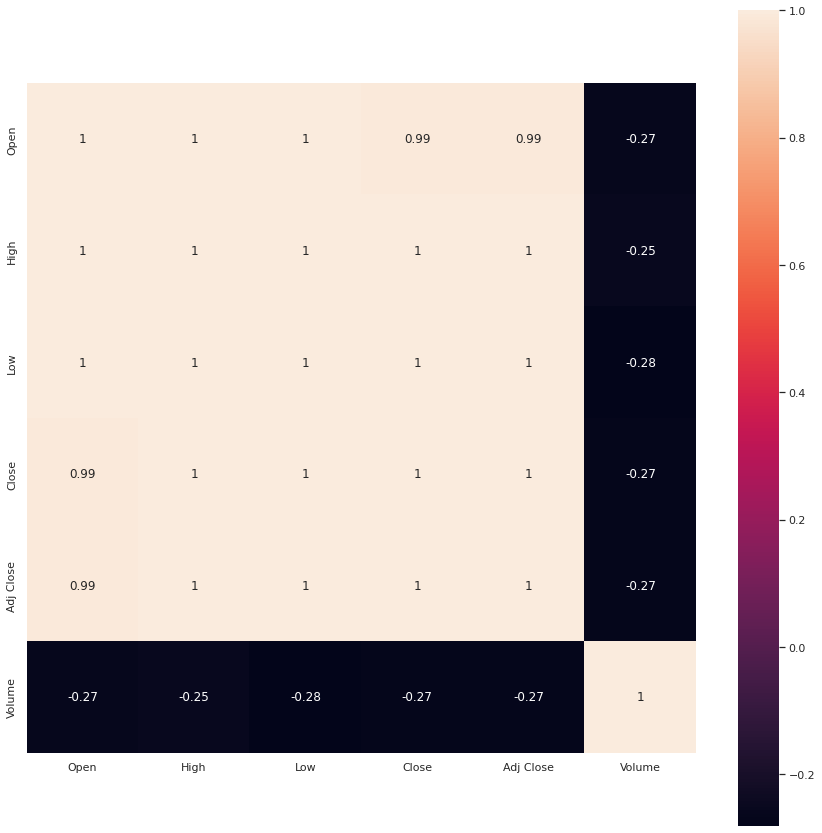

In [23]:
#Check for correlation in stock variables 

for stock in stocks:
  df_corr = df[stock].corr()
  sns.set(rc = {'figure.figsize':(15,15)})
  df_corr_mat = sns.heatmap(df_corr, annot = True, square = True)
  plt.show()

As previously observed, stock prices are highly correlated. Volume is slightly negatively correlated with price

#Twitter Sentiment analysis score(prasad)

In [24]:
#cleaning text
def cleaningtxt(text):
  text=text.lower()
  text=re.sub(r'@[A-Za-z]+','',text) # removing @ text
  text=re.sub(r'http\S+','',text) #removing links
  text=re.sub(r'\n','',text)  #reomving linespacing
  text=re.sub(r'\d+','',text) # removing numbers 
  return text

#removing all punctuation
def removingpunct(text):
  for punct in string.punctuation:
      text = text.replace(punct, '')
  return text

#removing emojies from text
def removingemoji(text):
  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

#function for positive, negative and neutral analysis
def removingstopword(text):
  stopword=nltk.corpus.stopwords.words('english')
  stopword.remove('not')
  a=[w for w in nltk.word_tokenize(text) if w not in stopword]
  return ' '.join(a)

#function for positive, negative and neutral analysis
def analysingscore(score):
  if score < 0:
    return 'negative'
  if score== 0:
    return 'neutral'
  else:
    return 'positive'


## AMCR

In [25]:
# Creating list to append tweet data
tweets_list_AMCR = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('$AMCR since:2020-04-20 until:2022-04-20').get_items()):
    tweets_list_AMCR.append([tweet.date, tweet.id, tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_df_AMCR = pd.DataFrame(tweets_list_AMCR, columns=['date','Tweet Id','Text'])
tweets_df_AMCR.head()

date             Tweet Id                                               Text
0 2022-04-19 23:36:05+00:00  1516561303778770954  $AMCR NEW ARTICLE : Amcor to report Third Quar...
1 2022-04-19 23:29:12+00:00  1516559571891990533  $AMCR Amcor to report Third Quarter 2022 Year ...
2 2022-04-19 23:28:30+00:00  1516559394409959431  $AMCR [15s. delayed]: Issued Press Release on ...
3 2022-04-19 23:28:28+00:00  1516559386554085379  $AMCR Amcor to report Third Quarter 2022 Year ...
4 2022-04-19 23:28:06+00:00  1516559294862344193  Amcor to report Third Quarter 2022 Year to Dat...

In [26]:
#separating date and time
tweets_df_AMCR['Date'] = [d.date() for d in tweets_df_AMCR['date']]
tweets_df_AMCR['time'] = [d.time() for d in tweets_df_AMCR['date']]

#droping original date and tweetid columns
tweets_df_AMCR = tweets_df_AMCR.drop(['date','Tweet Id'], axis=1)

#re-ordering data
tweets_df_AMCR=tweets_df_AMCR[['Date','time','Text']]
tweets_df_AMCR.head()

Date      time                                               Text
0  2022-04-19  23:36:05  $AMCR NEW ARTICLE : Amcor to report Third Quar...
1  2022-04-19  23:29:12  $AMCR Amcor to report Third Quarter 2022 Year ...
2  2022-04-19  23:28:30  $AMCR [15s. delayed]: Issued Press Release on ...
3  2022-04-19  23:28:28  $AMCR Amcor to report Third Quarter 2022 Year ...
4  2022-04-19  23:28:06  Amcor to report Third Quarter 2022 Year to Dat...

In [27]:
#cleaning text
tweets_df_AMCR['Text']= tweets_df_AMCR['Text'].apply(cleaningtxt)
tweets_df_AMCR.head()

Date      time                                               Text
0  2022-04-19  23:36:05  $amcr new article : amcor to report third quar...
1  2022-04-19  23:29:12  $amcr amcor to report third quarter  year to d...
2  2022-04-19  23:28:30  $amcr [s. delayed]: issued press release on ap...
3  2022-04-19  23:28:28  $amcr amcor to report third quarter  year to d...
4  2022-04-19  23:28:06  amcor to report third quarter  year to date re...

In [28]:
#removing all punctuation
tweets_df_AMCR['Text']= tweets_df_AMCR['Text'].apply(removingpunct)
tweets_df_AMCR.head()

Date      time                                               Text
0  2022-04-19  23:36:05  amcr new article  amcor to report third quarte...
1  2022-04-19  23:29:12  amcr amcor to report third quarter  year to da...
2  2022-04-19  23:28:30  amcr s delayed issued press release on april  ...
3  2022-04-19  23:28:28  amcr amcor to report third quarter  year to da...
4  2022-04-19  23:28:06  amcor to report third quarter  year to date re...

In [29]:
#removing emojies from text
tweets_df_AMCR['Text']= tweets_df_AMCR['Text'].apply(removingemoji)
tweets_df_AMCR.head()

Date      time                                               Text
0  2022-04-19  23:36:05  amcr new article  amcor to report third quarte...
1  2022-04-19  23:29:12  amcr amcor to report third quarter  year to da...
2  2022-04-19  23:28:30  amcr s delayed issued press release on april  ...
3  2022-04-19  23:28:28  amcr amcor to report third quarter  year to da...
4  2022-04-19  23:28:06  amcor to report third quarter  year to date re...

In [30]:
#removing words like the,and,an...etc
tweets_df_AMCR['Text'] = tweets_df_AMCR['Text'].apply(removingstopword)
tweets_df_AMCR.head()

Date      time                                               Text
0  2022-04-19  23:36:05  amcr new article amcor report third quarter ye...
1  2022-04-19  23:29:12  amcr amcor report third quarter year date results
2  2022-04-19  23:28:30  amcr delayed issued press release april amcor ...
3  2022-04-19  23:28:28  amcr amcor report third quarter year date results
4  2022-04-19  23:28:06  amcor report third quarter year date results amcr

In [31]:
sentiment_score= SentimentIntensityAnalyzer()
tweets_df_AMCR['compound'] = [sentiment_score.polarity_scores(x)['compound'] for x in tweets_df_AMCR['Text']]
tweets_df_AMCR.head()

Date      time                                               Text  compound
0  2022-04-19  23:36:05  amcr new article amcor report third quarter ye...    0.0000
1  2022-04-19  23:29:12  amcr amcor report third quarter year date results    0.0000
2  2022-04-19  23:28:30  amcr delayed issued press release april amcor ...   -0.2263
3  2022-04-19  23:28:28  amcr amcor report third quarter year date results    0.0000
4  2022-04-19  23:28:06  amcor report third quarter year date results amcr    0.0000

In [32]:
#function for positive, negative and neutral analysis
tweets_df_AMCR['Sentiments']=tweets_df_AMCR['compound'].apply(analysingscore)
tweets_df_AMCR.head()

Date      time                                               Text  compound Sentiments
0  2022-04-19  23:36:05  amcr new article amcor report third quarter ye...    0.0000    neutral
1  2022-04-19  23:29:12  amcr amcor report third quarter year date results    0.0000    neutral
2  2022-04-19  23:28:30  amcr delayed issued press release april amcor ...   -0.2263   negative
3  2022-04-19  23:28:28  amcr amcor report third quarter year date results    0.0000    neutral
4  2022-04-19  23:28:06  amcor report third quarter year date results amcr    0.0000    neutral

neutral     2014
positive    1730
negative     614
Name: Sentiments, dtype: int64


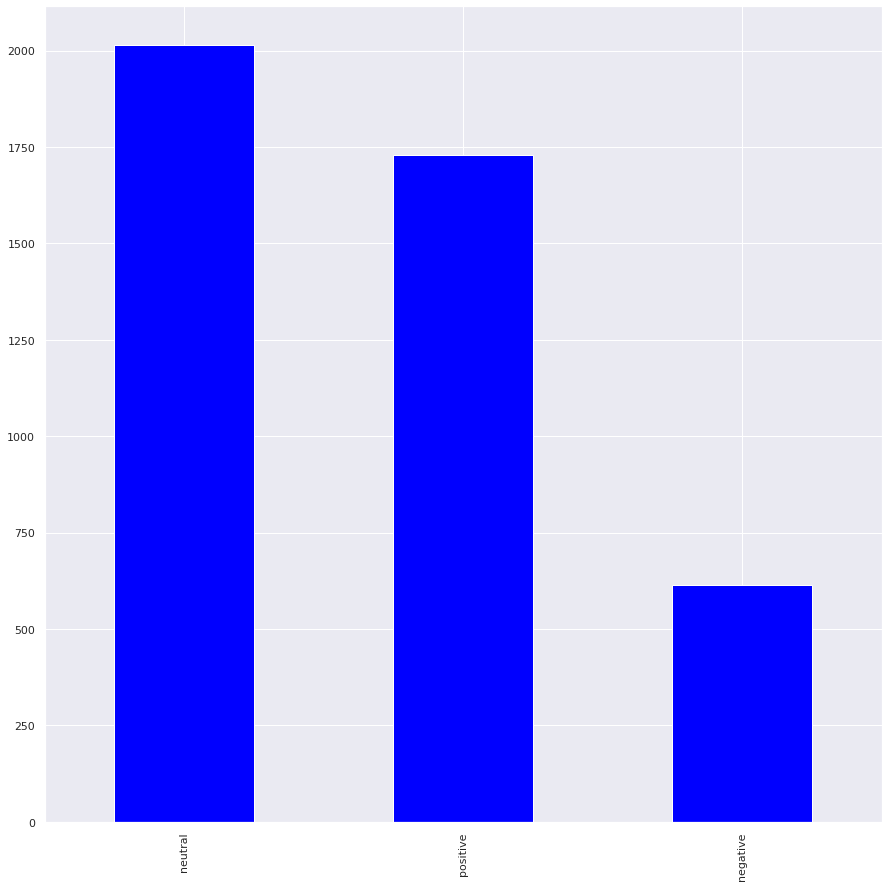

In [33]:
#counting sentiment values
print(tweets_df_AMCR['Sentiments'].value_counts())
#plot for pos,neg,and neutral values
tweets_df_AMCR['Sentiments'].value_counts().plot(kind='bar',color=['blue'])

In [34]:
#taking sentiment average for each date
averagescore_per_day = tweets_df_AMCR.groupby(['Date'])['compound'].agg(['mean','count']).reset_index()
averagescore_per_day.head()

#all data sentiment average
sentimentscore_ovrallavg = tweets_df_AMCR['compound'].mean()
sentimentscore_ovrallavg

0.13308311151904584

In [35]:
#getting all negative neutal and positive values per day 
sentiments_AMCR_df=tweets_df_AMCR.groupby(['Date', 'Sentiments'], as_index=False).size().pivot('Date', 'Sentiments', 'size').replace(np.nan, 0)

#total count(neg,pos,neu) perday
sentiments_AMCR_df['Total']=sentiments_AMCR_df.iloc[0:].sum(axis=1)
sentiments_AMCR_df.head()

Sentiments  negative  neutral  positive  Total
Date                                          
2020-04-20       0.0      1.0       0.0    1.0
2020-04-21       1.0      4.0       1.0    6.0
2020-04-22       0.0      0.0       3.0    3.0
2020-04-23       1.0      6.0       1.0    8.0
2020-04-24       2.0      0.0       1.0    3.0

In [36]:
#taking probability perday for each value(neg,neu,pos)
sentiments_AMCR_df['neg_prob']=sentiments_AMCR_df['negative']/sentiments_AMCR_df['Total']
sentiments_AMCR_df['neu_prob']=sentiments_AMCR_df['neutral']/sentiments_AMCR_df['Total']
sentiments_AMCR_df['pos_prob']=sentiments_AMCR_df['positive']/sentiments_AMCR_df['Total']
print(sentiments_AMCR_df.head())

#all days prob for positive
alldates_pos_prob = sentiments_AMCR_df['pos_prob'].mean()
print(alldates_pos_prob)

#all days prob for negative
alldates_neg_prob = sentiments_AMCR_df['neg_prob'].mean()
print(alldates_neg_prob)

Sentiments  negative  neutral  positive  Total  neg_prob  neu_prob  pos_prob
Date                                                                        
2020-04-20       0.0      1.0       0.0    1.0  0.000000  1.000000  0.000000
2020-04-21       1.0      4.0       1.0    6.0  0.166667  0.666667  0.166667
2020-04-22       0.0      0.0       3.0    3.0  0.000000  0.000000  1.000000
2020-04-23       1.0      6.0       1.0    8.0  0.125000  0.750000  0.125000
2020-04-24       2.0      0.0       1.0    3.0  0.666667  0.000000  0.333333
0.34573463053094294
0.15180410150082072


##NVR

In [37]:
# Creating list to append tweet data
tweets_list_NVR = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('$NVR since:2020-04-20 until:2022-04-20').get_items()):
    tweets_list_NVR.append([tweet.date, tweet.id, tweet.content])

# Creating a dataframe from the tweets list above
tweets_df_NVR = pd.DataFrame(tweets_list_NVR, columns=['date','Tweet Id','Text'])
tweets_df_NVR.head()

date             Tweet Id                                               Text
0 2022-04-19 20:55:13+00:00  1516520820184694792  The Twilight Zone\n$AMGN $MRK $CLR $SPG $SPG-P...
1 2022-04-19 19:56:37+00:00  1516506071845814282  The Twilight Zone $NVR\n\nFull take right here...
2 2022-04-19 19:51:04+00:00  1516504676220375040  $CLR $DHI $LEN $NVR $OXY - The Twilight Zone h...
3 2022-04-19 19:45:11+00:00  1516503193731088400  The Twilight Zone $OXY $CLR $DHI $LEN $NVR #st...
4 2022-04-19 19:17:37+00:00  1516496258705551360  $NVR ~Don't miss the next move in a few hours-...

In [38]:
#separating date and time
tweets_df_NVR['Date'] = [d.date() for d in tweets_df_NVR['date']]
tweets_df_NVR['time'] = [d.time() for d in tweets_df_NVR['date']]

#droping original date and tweetid columns
tweets_df_NVR = tweets_df_NVR.drop(['date','Tweet Id'], axis=1)

#re-ordering data
tweets_df_NVR=tweets_df_NVR[['Date','time','Text']]
tweets_df_NVR.head()

Date      time                                               Text
0  2022-04-19  20:55:13  The Twilight Zone\n$AMGN $MRK $CLR $SPG $SPG-P...
1  2022-04-19  19:56:37  The Twilight Zone $NVR\n\nFull take right here...
2  2022-04-19  19:51:04  $CLR $DHI $LEN $NVR $OXY - The Twilight Zone h...
3  2022-04-19  19:45:11  The Twilight Zone $OXY $CLR $DHI $LEN $NVR #st...
4  2022-04-19  19:17:37  $NVR ~Don't miss the next move in a few hours-...

In [39]:
#cleaning text
tweets_df_NVR['Text'] = tweets_df_NVR['Text'].apply(cleaningtxt)
tweets_df_NVR.head()

Date      time                                               Text
0  2022-04-19  20:55:13  the twilight zone$amgn $mrk $clr $spg $spg-pj ...
1  2022-04-19  19:56:37      the twilight zone $nvrfull take right here 🗞 
2  2022-04-19  19:51:04     $clr $dhi $len $nvr $oxy - the twilight zone  
3  2022-04-19  19:45:11  the twilight zone $oxy $clr $dhi $len $nvr #st...
4  2022-04-19  19:17:37  $nvr ~don't miss the next move in a few hours-,.

In [40]:
#removing all punctuation
tweets_df_NVR['Text'] = tweets_df_NVR['Text'].apply(removingpunct)
tweets_df_NVR.head()

Date      time                                               Text
0  2022-04-19  20:55:13       the twilight zoneamgn mrk clr spg spgpj nvr 
1  2022-04-19  19:56:37       the twilight zone nvrfull take right here 🗞 
2  2022-04-19  19:51:04           clr dhi len nvr oxy  the twilight zone  
3  2022-04-19  19:45:11  the twilight zone oxy clr dhi len nvr stocks i...
4  2022-04-19  19:17:37        nvr dont miss the next move in a few hours

In [41]:
#removing emojies from text
tweets_df_NVR['Text'] = tweets_df_NVR['Text'].apply(removingemoji)
tweets_df_NVR.head()

Date      time                                               Text
0  2022-04-19  20:55:13       the twilight zoneamgn mrk clr spg spgpj nvr 
1  2022-04-19  19:56:37        the twilight zone nvrfull take right here  
2  2022-04-19  19:51:04           clr dhi len nvr oxy  the twilight zone  
3  2022-04-19  19:45:11  the twilight zone oxy clr dhi len nvr stocks i...
4  2022-04-19  19:17:37        nvr dont miss the next move in a few hours

In [42]:
#removing words like the,and,an...etc
tweets_df_NVR['Text'] = tweets_df_NVR['Text'].apply(removingstopword)
tweets_df_NVR.head()

Date      time                                               Text
0  2022-04-19  20:55:13            twilight zoneamgn mrk clr spg spgpj nvr
1  2022-04-19  19:56:37                   twilight zone nvrfull take right
2  2022-04-19  19:51:04                  clr dhi len nvr oxy twilight zone
3  2022-04-19  19:45:11  twilight zone oxy clr dhi len nvr stocks inves...
4  2022-04-19  19:17:37                      nvr dont miss next move hours

In [43]:
sentiment_score= SentimentIntensityAnalyzer()
tweets_df_NVR['compound'] = [sentiment_score.polarity_scores(x)['compound'] for x in tweets_df_NVR['Text']]
tweets_df_NVR.head()

Date      time                                               Text  compound
0  2022-04-19  20:55:13            twilight zoneamgn mrk clr spg spgpj nvr    0.0000
1  2022-04-19  19:56:37                   twilight zone nvrfull take right    0.0000
2  2022-04-19  19:51:04                  clr dhi len nvr oxy twilight zone    0.0000
3  2022-04-19  19:45:11  twilight zone oxy clr dhi len nvr stocks inves...    0.0000
4  2022-04-19  19:17:37                      nvr dont miss next move hours    0.1139

In [44]:
#function for positive, negative and neutral analysis
tweets_df_NVR['Sentiments'] = tweets_df_NVR['compound'].apply(analysingscore)
tweets_df_NVR.head()

Date      time                                               Text  compound Sentiments
0  2022-04-19  20:55:13            twilight zoneamgn mrk clr spg spgpj nvr    0.0000    neutral
1  2022-04-19  19:56:37                   twilight zone nvrfull take right    0.0000    neutral
2  2022-04-19  19:51:04                  clr dhi len nvr oxy twilight zone    0.0000    neutral
3  2022-04-19  19:45:11  twilight zone oxy clr dhi len nvr stocks inves...    0.0000    neutral
4  2022-04-19  19:17:37                      nvr dont miss next move hours    0.1139   positive

positive    1845
neutral     1807
negative     522
Name: Sentiments, dtype: int64


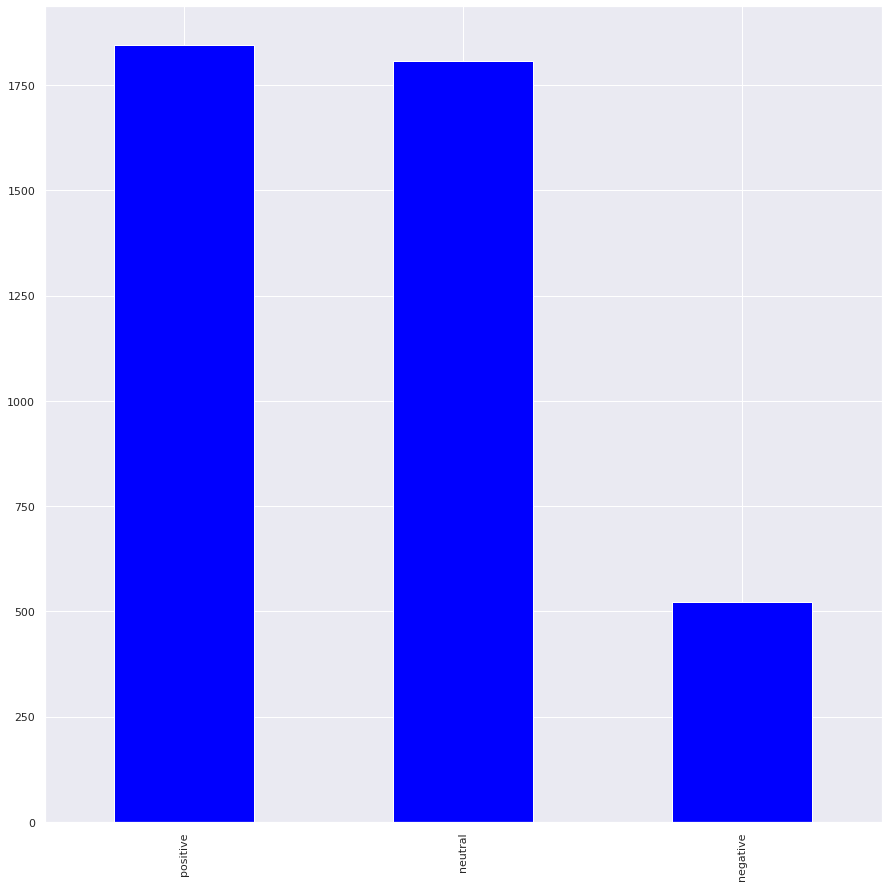

In [45]:
#counting sentiment values
print(tweets_df_NVR['Sentiments'].value_counts())
#plot for pos,neg,and neutral values
tweets_df_NVR['Sentiments'].value_counts().plot(kind='bar',color=['blue'])

In [46]:
#taking sentiment average for each date
averagescore_per_day = tweets_df_NVR.groupby(['Date'])['compound'].agg(['mean','count']).reset_index()
averagescore_per_day.head()

#all data sentiment average
sentimentscore_ovrallavg = tweets_df_AMCR['compound'].mean()
sentimentscore_ovrallavg

0.13308311151904584

In [47]:
#getting all negative neutal and positive values per day 
sentiments_NVR_df=tweets_df_AMCR.groupby(['Date', 'Sentiments'], as_index=False).size().pivot('Date', 'Sentiments', 'size').replace(np.nan, 0)

#total count(neg,pos,neu) perday
sentiments_NVR_df['Total']=sentiments_NVR_df.iloc[0:].sum(axis=1)
sentiments_NVR_df.head()

Sentiments  negative  neutral  positive  Total
Date                                          
2020-04-20       0.0      1.0       0.0    1.0
2020-04-21       1.0      4.0       1.0    6.0
2020-04-22       0.0      0.0       3.0    3.0
2020-04-23       1.0      6.0       1.0    8.0
2020-04-24       2.0      0.0       1.0    3.0

In [48]:
#taking probability perday for each value(neg,neu,pos)
sentiments_NVR_df['neg_prob']=sentiments_NVR_df['negative']/sentiments_NVR_df['Total']
sentiments_NVR_df['neu_prob']=sentiments_NVR_df['neutral']/sentiments_NVR_df['Total']
sentiments_NVR_df['pos_prob']=sentiments_NVR_df['positive']/sentiments_NVR_df['Total']
print(sentiments_NVR_df.head())

#all days prob for positive
alldates_pos_prob = sentiments_NVR_df['pos_prob'].mean()
print(alldates_pos_prob)

#all days prob for negative
alldates_neg_prob = sentiments_NVR_df['neg_prob'].mean()
print(alldates_neg_prob)

Sentiments  negative  neutral  positive  Total  neg_prob  neu_prob  pos_prob
Date                                                                        
2020-04-20       0.0      1.0       0.0    1.0  0.000000  1.000000  0.000000
2020-04-21       1.0      4.0       1.0    6.0  0.166667  0.666667  0.166667
2020-04-22       0.0      0.0       3.0    3.0  0.000000  0.000000  1.000000
2020-04-23       1.0      6.0       1.0    8.0  0.125000  0.750000  0.125000
2020-04-24       2.0      0.0       1.0    3.0  0.666667  0.000000  0.333333
0.34573463053094294
0.15180410150082072


In [49]:
df2 = pd.concat([df, sentiments_AMCR_df], axis = 1, join = 'inner')
df2 = pd.concat([df2, sentiments_NVR_df], axis = 1, join = 'inner')
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


(AMCR, Open)  (AMCR, High)  (AMCR, Low)  (AMCR, Close)  (AMCR, Adj Close)  (AMCR, Volume)  (NVR, Open)  (NVR, High)   (NVR, Low)  (NVR, Close)  (NVR, Adj Close)  (NVR, Volume)  negative  neutral  positive  Total  neg_prob  neu_prob  pos_prob  negative  neutral  positive  Total  neg_prob  neu_prob  pos_prob
Date                                                                                                                                                                                                                                                                                                                           
2020-04-20          8.74          8.79         8.56           8.64           7.962883         4062500  2836.969971  2959.169922  2800.550049   2846.860107       2846.860107          32500       0.0      1.0       0.0    1.0  0.000000  1.000000  0.000000       0.0      1.0       0.0    1.0  0.000000  1.000000  0.000000
2020-04-21          8.32          8.46         8.18           8.26           7.612665         4576500  2782.000000  2879.620117  2782.000000   2805.439941       2805.439941          41600       1.0      4.0       1.0    6.0  0.166667  0.666667  0.166667       1.0      4.0       1.0    6.0  0.166667  0.666667  0.166667
2020-04-22          8.37          8.42         8.23           8.36           7.704828         3539400  2874.449951  2927.899902  2813.000000   2847.600098       2847.600098          46800       0.0      0.0       3.0    3.0  0.000000  0.000000  1.000000       0.0      0.0       3.0    3.0  0.000000  0.000000  1.000000
2020-04-23          8.40          8.51         8.20           8.21           7.566583         4101900  2809.550049  2840.000000  2718.010010   2746.330078       2746.330078          55900       1.0      6.0       1.0    8.0  0.125000  0.750000  0.125000       1.0      6.0       1.0    8.0  0.125000  0.750000  0.125000
2020-04-24          8.38          8.47         8.29           8.42           7.760125         3881100  2750.000000  2875.000000  2728.379883   2847.370117       2847.370117          46500       2.0      0.0       1.0    3.0  0.666667  0.000000  0.333333       2.0      0.0       1.0    3.0  0.666667  0.000000  0.333333
...                  ...           ...          ...            ...                ...             ...          ...          ...          ...           ...               ...            ...       ...      ...       ...    ...       ...       ...       ...       ...      ...       ...    ...       ...       ...       ...
2022-04-12         11.75         11.83        11.59          11.66          11.660000         3042300  4400.000000  4499.939941  4332.850098   4352.020020       4352.020020          29100       3.0     14.0      16.0   33.0  0.090909  0.424242  0.484848       3.0     14.0      16.0   33.0  0.090909  0.424242  0.484848
2022-04-13         11.69         11.74        11.60          11.70          11.700000         4212000  4354.029785  4449.970215  4311.000000   4419.990234       4419.990234          20800       0.0      7.0      11.0   18.0  0.000000  0.388889  0.611111       0.0      7.0      11.0   18.0  0.000000  0.388889  0.611111
2022-04-14         11.73         11.80        11.67          11.67          11.670000         3345200  4453.160156  4480.000000  4312.009766   4335.450195       4335.450195          18800       3.0      2.0      12.0   17.0  0.176471  0.117647  0.705882       3.0      2.0      12.0   17.0  0.176471  0.117647  0.705882
2022-04-18         11.62         11.72        11.51          11.53          11.530000         3211300  4308.979980  4374.959961  4293.580078   4320.620117       4320.620117          13800       9.0      4.0      18.0   31.0  0.290323  0.129032  0.580645       9.0      4.0      18.0   31.0  0.290323  0.129032  0.580645
2022-04-19         11.49         11.80        11.49          11.76          11.760000         4107400  4356.979980  4461.439941  4356.979980   4444.640137       4444.640137

# Data Pre-Processing

## Data For LSTM

In [50]:
# using all the columns

# AMCR
values_AMCR = df.iloc[:,0:4].values

# NVR
values_NVR = df.iloc[:,6:10].values

print(values_AMCR.shape, values_NVR.shape)

(505, 4) (505, 4)


In [51]:
# split into training and test datasets

# AMCR
ratio = round(0.8*values_AMCR.shape[0])
train_values_AMCR = values_AMCR[:ratio, :]
test_values_AMCR = values_AMCR[ratio:, :]
print('AMCR training data size: ', train_values_AMCR.shape, '\n    AMCR test data size: ', test_values_AMCR.shape)

# AMCR
ratio = round(0.8*values_NVR.shape[0])
train_values_NVR = values_NVR[:ratio, :]
test_values_NVR = values_NVR[ratio:, :]
print('NVR training data size: ', train_values_NVR.shape, '\n    NVR test data size: ', test_values_NVR.shape)

AMCR training data size:  (404, 4) 
    AMCR test data size:  (101, 4)
NVR training data size:  (404, 4) 
    NVR test data size:  (101, 4)


In [52]:
from pandas import concat

# convert series to supervised learning by Jason Brownlee 
def series_to_supervised(data,
                         n_in=1, #this affects how far back in time the model remembers for each loop. +1 here means +1 interval from the data we've chosen
												 n_out=1,
												 dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
    
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

	#https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

### Train Test Split Scale

### AMCR - 5 lags

In [53]:
# Predicts Close from previous 5 days of Open, High, Low, Close

# normalize features
scaler_5_AMCR = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_5_AMCR.fit_transform(train_values_AMCR)

lags = 5
features = train_scaled.shape[1]
print(lags, features)
 
# frame as supervised learning
train_reframed = series_to_supervised(train_scaled, lags, 1)
print(train_reframed)
# drop columns we don't want to predict
train_reframed.drop(train_reframed.columns[[-2,-3,-4]], axis=1, inplace=True)

test_scaled = scaler_5_AMCR.transform(test_values_AMCR)
test_reframed = series_to_supervised(test_scaled, lags, 1)
test_reframed.drop(test_reframed.columns[[-2,-3,-4]], axis=1, inplace=True)

print(train_reframed.head())
print(test_reframed.head())

5 4
     var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)   var4(t)
5     0.093541   0.082222   0.083333   0.092672   0.000000   0.008889   0.000000   0.010776   0.011136   0.000000   0.010965   0.032328   0.017817   0.020000   0.004386   0.000000   0.013363   0.011111   0.024123   0.045259  0.035635  0.080000  0.059210  0.101293
6     0.000000   0.008889   0.000000   0.010776   0.011136   0.000000   0.010965   0.032328   0.017817   0.020000   0.004386   0.000000   0.013363   0.011111   0.024123   0.045259   0.035635   0.080000   0.059210   0.101293  0.124722  0.153333  0.151316  0.174569
7     0.011136   0.000000   0.010965   0.032328   0.017817   0.020000   0.004386   0.000000   0.013363   0.011111   0.024123   0.045259   0.035635   0.080000   0.059210   0.101293   0.124722   0.153333   

In [54]:
# split into input and outputs
values_train_5_AMCR = train_reframed.values
values_test_5_AMCR = test_reframed.values

train_X_5_AMCR, train_y_5_AMCR = values_train_5_AMCR[:, :-1], values_train_5_AMCR[:, -1]
test_X_5_AMCR, test_y_5_AMCR = values_test_5_AMCR[:, :-1], values_test_5_AMCR[:, -1]
print(train_X_5_AMCR.shape, test_X_5_AMCR.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X_5_AMCR = train_X_5_AMCR.reshape((train_X_5_AMCR.shape[0], lags, features))
test_X_5_AMCR = test_X_5_AMCR.reshape((test_X_5_AMCR.shape[0], lags, features))

print(train_X_5_AMCR.shape, train_y_5_AMCR.shape, test_X_5_AMCR.shape, test_y_5_AMCR.shape)

(399, 20) (96, 20)
(399, 5, 4) (399,) (96, 5, 4) (96,)


### AMCR - 10 lags

In [55]:
# Predicts Close from previous 10 days of Open, High, Low, Close

# normalize features
scaler_10_AMCR = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_10_AMCR.fit_transform(train_values_AMCR)

lags = 10
features = train_scaled.shape[1]
print(lags, features)
 
# frame as supervised learning
train_reframed = series_to_supervised(train_scaled, lags, 1)
print(train_reframed)
# drop columns we don't want to predict
train_reframed.drop(train_reframed.columns[[-2,-3,-4]], axis=1, inplace=True)

test_scaled = scaler_10_AMCR.transform(test_values_AMCR)
test_reframed = series_to_supervised(test_scaled, lags, 1)
test_reframed.drop(test_reframed.columns[[-2,-3,-4]], axis=1, inplace=True)

print(train_reframed.head())
print(test_reframed.head())

10 4
     var1(t-10)  var2(t-10)  var3(t-10)  var4(t-10)  var1(t-9)  var2(t-9)  var3(t-9)  var4(t-9)  var1(t-8)  var2(t-8)  var3(t-8)  var4(t-8)  var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)   var4(t)
10     0.093541    0.082222    0.083333    0.092672   0.000000   0.008889   0.000000   0.010776   0.011136   0.000000   0.010965   0.032328   0.017817   0.020000   0.004386   0.000000   0.013363   0.011111   0.024123   0.045259   0.035635   0.080000   0.059210   0.101293   0.124722   0.153333   0.151316   0.174569   0.193764   0.204444   0.212719   0.221983   0.169265   0.162222   0.157895   0.163793   0.124722   0.102222   0.087719   0.101293  0.069042  0.068889  0.085526  0.103448
11     0.000000    

In [56]:
# split into input and outputs
values_train_10_AMCR = train_reframed.values
values_test_10_AMCR = test_reframed.values

train_X_10_AMCR, train_y_10_AMCR = values_train_10_AMCR[:, :-1], values_train_10_AMCR[:, -1]
test_X_10_AMCR, test_y_10_AMCR = values_test_10_AMCR[:, :-1], values_test_10_AMCR[:, -1]
print(train_X_10_AMCR.shape, test_X_10_AMCR.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X_10_AMCR = train_X_10_AMCR.reshape((train_X_10_AMCR.shape[0], lags, features))
test_X_10_AMCR = test_X_10_AMCR.reshape((test_X_10_AMCR.shape[0], lags, features))

print(train_X_10_AMCR.shape, train_y_10_AMCR.shape, test_X_10_AMCR.shape, test_y_10_AMCR.shape)

(394, 40) (91, 40)
(394, 10, 4) (394,) (91, 10, 4) (91,)


### AMCR - 20 lags

In [57]:
# Predicts Close from previous 20 days of Open, High, Low, Close

# normalize features
scaler_20_AMCR = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_20_AMCR.fit_transform(train_values_AMCR)

lags = 20
features = train_scaled.shape[1]
print(lags, features)
 
# frame as supervised learning
train_reframed = series_to_supervised(train_scaled, lags, 1)
print(train_reframed)
# drop columns we don't want to predict
train_reframed.drop(train_reframed.columns[[-2,-3,-4]], axis=1, inplace=True)

test_scaled = scaler_20_AMCR.transform(test_values_AMCR)
test_reframed = series_to_supervised(test_scaled, lags, 1)
test_reframed.drop(test_reframed.columns[[-2,-3,-4]], axis=1, inplace=True)

print(train_reframed.head())
print(test_reframed.head())

20 4
     var1(t-20)  var2(t-20)  var3(t-20)  var4(t-20)  var1(t-19)  var2(t-19)  var3(t-19)  var4(t-19)  var1(t-18)  var2(t-18)  var3(t-18)  var4(t-18)  var1(t-17)  var2(t-17)  var3(t-17)  var4(t-17)  var1(t-16)  var2(t-16)  var3(t-16)  var4(t-16)  var1(t-15)  var2(t-15)  var3(t-15)  var4(t-15)  var1(t-14)  var2(t-14)  var3(t-14)  var4(t-14)  var1(t-13)  var2(t-13)  var3(t-13)  var4(t-13)  var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var1(t-11)  var2(t-11)  var3(t-11)  var4(t-11)  var1(t-10)  var2(t-10)  var3(t-10)  var4(t-10)  var1(t-9)  var2(t-9)  var3(t-9)  var4(t-9)  var1(t-8)  var2(t-8)  var3(t-8)  var4(t-8)  var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)   var4(t)
20     0.093541    0.082222

In [58]:
# split into input and outputs
values_train_20_AMCR = train_reframed.values
values_test_20_AMCR = test_reframed.values

train_X_20_AMCR, train_y_20_AMCR = values_train_20_AMCR[:, :-1], values_train_20_AMCR[:, -1]
test_X_20_AMCR, test_y_20_AMCR = values_test_20_AMCR[:, :-1], values_test_20_AMCR[:, -1]
print(train_X_20_AMCR.shape, test_X_20_AMCR.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X_20_AMCR = train_X_20_AMCR.reshape((train_X_20_AMCR.shape[0], lags, features))
test_X_20_AMCR = test_X_20_AMCR.reshape((test_X_20_AMCR.shape[0], lags, features))

print(train_X_20_AMCR.shape, train_y_20_AMCR.shape, test_X_20_AMCR.shape, test_y_20_AMCR.shape)

(384, 80) (81, 80)
(384, 20, 4) (384,) (81, 20, 4) (81,)


### NVR - 5 lags

In [59]:
# Predicts Close from previous 5 days of Open, High, Low, Close

# normalize features
scaler_5_NVR = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_5_NVR.fit_transform(train_values_NVR)

lags = 5
features = train_scaled.shape[1]
print(lags, features)
 
# frame as supervised learning
train_reframed = series_to_supervised(train_scaled, lags, 1)
print(train_reframed)
# drop columns we don't want to predict
train_reframed.drop(train_reframed.columns[[-2,-3,-4]], axis=1, inplace=True)

test_scaled = scaler_5_NVR.transform(test_values_NVR)
test_reframed = series_to_supervised(test_scaled, lags, 1)
test_reframed.drop(test_reframed.columns[[-2,-3,-4]], axis=1, inplace=True)

print(train_reframed.head())
print(test_reframed.head())

5 4
     var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)   var4(t)
5     0.033840   0.061560   0.054433   0.039159   0.012451   0.030100   0.047249   0.023025   0.048424   0.049194   0.059254   0.039447   0.023171   0.014431   0.022466   0.000000   0.000000   0.028273   0.026482   0.039357  0.058121  0.092491  0.081233  0.095188
6     0.012451   0.030100   0.047249   0.023025   0.048424   0.049194   0.059254   0.039447   0.023171   0.014431   0.022466   0.000000   0.000000   0.028273   0.026482   0.039357   0.058121   0.092491   0.081233   0.095188  0.114136  0.161815  0.148457  0.162630
7     0.048424   0.049194   0.059254   0.039447   0.023171   0.014431   0.022466   0.000000   0.000000   0.028273   0.026482   0.039357   0.058121   0.092491   0.081233   0.095188   0.114136   0.161815   

In [60]:
# split into input and outputs
values_train_5_NVR = train_reframed.values
values_test_5_NVR = test_reframed.values

train_X_5_NVR, train_y_5_NVR = values_train_5_NVR[:, :-1], values_train_5_NVR[:, -1]
test_X_5_NVR, test_y_5_NVR = values_test_5_NVR[:, :-1], values_test_5_NVR[:, -1]
print(train_X_5_NVR.shape, test_X_5_NVR.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X_5_NVR = train_X_5_NVR.reshape((train_X_5_NVR.shape[0], lags, features))
test_X_5_NVR = test_X_5_NVR.reshape((test_X_5_NVR.shape[0], lags, features))

print(train_X_5_NVR.shape, train_y_5_NVR.shape, test_X_5_NVR.shape, test_y_5_NVR.shape)

(399, 20) (96, 20)
(399, 5, 4) (399,) (96, 5, 4) (96,)


### NVR - 10 lags

In [61]:
# Predicts Close from previous 10 days of Open, High, Low, Close

# normalize features
scaler_10_NVR = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_10_NVR.fit_transform(train_values_NVR)

lags = 10
features = train_scaled.shape[1]
print(lags, features)
 
# frame as supervised learning
train_reframed = series_to_supervised(train_scaled, lags, 1)
print(train_reframed)
# drop columns we don't want to predict
train_reframed.drop(train_reframed.columns[[-2,-3,-4]], axis=1, inplace=True)

test_scaled = scaler_10_NVR.transform(test_values_NVR)
test_reframed = series_to_supervised(test_scaled, lags, 1)
test_reframed.drop(test_reframed.columns[[-2,-3,-4]], axis=1, inplace=True)

print(train_reframed.head())
print(test_reframed.head())

10 4
     var1(t-10)  var2(t-10)  var3(t-10)  var4(t-10)  var1(t-9)  var2(t-9)  var3(t-9)  var4(t-9)  var1(t-8)  var2(t-8)  var3(t-8)  var4(t-8)  var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)   var4(t)
10     0.033840    0.061560    0.054433    0.039159   0.012451   0.030100   0.047249   0.023025   0.048424   0.049194   0.059254   0.039447   0.023171   0.014431   0.022466   0.000000   0.000000   0.028273   0.026482   0.039357   0.058121   0.092491   0.081233   0.095188   0.114136   0.161815   0.148457   0.162630   0.193813   0.216114   0.206228   0.175363   0.144447   0.141792   0.142319   0.137763   0.097276   0.104249   0.115798   0.113184  0.103101  0.112427  0.114527  0.123226
11     0.012451    

In [62]:
# split into input and outputs
values_train_10_NVR = train_reframed.values
values_test_10_NVR = test_reframed.values

train_X_10_NVR, train_y_10_NVR = values_train_10_NVR[:, :-1], values_train_10_NVR[:, -1]
test_X_10_NVR, test_y_10_NVR = values_test_10_NVR[:, :-1], values_test_10_NVR[:, -1]
print(train_X_10_NVR.shape, test_X_10_NVR.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X_10_NVR = train_X_10_NVR.reshape((train_X_10_NVR.shape[0], lags, features))
test_X_10_NVR = test_X_10_NVR.reshape((test_X_10_NVR.shape[0], lags, features))

print(train_X_10_NVR.shape, train_y_10_NVR.shape, test_X_10_NVR.shape, test_y_10_NVR.shape)

(394, 40) (91, 40)
(394, 10, 4) (394,) (91, 10, 4) (91,)


### NVR - 20 lags

In [63]:
# Predicts Close from previous 20 days of Open, High, Low, Close

# normalize features
scaler_20_NVR = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_20_NVR.fit_transform(train_values_NVR)

lags = 20
features = train_scaled.shape[1]
print(lags, features)
 
# frame as supervised learning
train_reframed = series_to_supervised(train_scaled, lags, 1)
print(train_reframed)
# drop columns we don't want to predict
train_reframed.drop(train_reframed.columns[[-2,-3,-4]], axis=1, inplace=True)

test_scaled = scaler_20_NVR.transform(test_values_NVR)
test_reframed = series_to_supervised(test_scaled, lags, 1)
test_reframed.drop(test_reframed.columns[[-2,-3,-4]], axis=1, inplace=True)

print(train_reframed.head())
print(test_reframed.head())

20 4
     var1(t-20)  var2(t-20)  var3(t-20)  var4(t-20)  var1(t-19)  var2(t-19)  var3(t-19)  var4(t-19)  var1(t-18)  var2(t-18)  var3(t-18)  var4(t-18)  var1(t-17)  var2(t-17)  var3(t-17)  var4(t-17)  var1(t-16)  var2(t-16)  var3(t-16)  var4(t-16)  var1(t-15)  var2(t-15)  var3(t-15)  var4(t-15)  var1(t-14)  var2(t-14)  var3(t-14)  var4(t-14)  var1(t-13)  var2(t-13)  var3(t-13)  var4(t-13)  var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var1(t-11)  var2(t-11)  var3(t-11)  var4(t-11)  var1(t-10)  var2(t-10)  var3(t-10)  var4(t-10)  var1(t-9)  var2(t-9)  var3(t-9)  var4(t-9)  var1(t-8)  var2(t-8)  var3(t-8)  var4(t-8)  var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)   var4(t)
20     0.033840    0.061560

In [64]:
# split into input and outputs
values_train_20_NVR = train_reframed.values
values_test_20_NVR = test_reframed.values

train_X_20_NVR, train_y_20_NVR = values_train_20_NVR[:, :-1], values_train_20_NVR[:, -1]
test_X_20_NVR, test_y_20_NVR = values_test_20_NVR[:, :-1], values_test_20_NVR[:, -1]
print(train_X_20_NVR.shape, test_X_20_NVR.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X_20_NVR = train_X_20_NVR.reshape((train_X_20_NVR.shape[0], lags, features))
test_X_20_NVR = test_X_20_NVR.reshape((test_X_20_NVR.shape[0], lags, features))

print(train_X_20_NVR.shape, train_y_20_NVR.shape, test_X_20_NVR.shape, test_y_20_NVR.shape)

(384, 80) (81, 80)
(384, 20, 4) (384,) (81, 20, 4) (81,)


## Data for LSTM + Sentiment Analysis

In [65]:
# using all the columns

# AMCR
values_AMCR_sentiment = df2.iloc[:,[0,1,2,3,20]].values

# NVR
values_NVR_sentiment = df2.iloc[:,[6,7,8,9,23]].values

print(values_AMCR_sentiment.shape, values_NVR_sentiment.shape)

(496, 5) (496, 5)


In [66]:
# split into training and test datasets

# AMCR
ratio = round(0.8*values_AMCR_sentiment.shape[0])
train_values_AMCR_sentiment = values_AMCR_sentiment[:ratio, :]
test_values_AMCR_sentiment = values_AMCR_sentiment[ratio:, :]
print('AMCR training data size: ', train_values_AMCR_sentiment.shape, '\n    AMCR test data size: ', test_values_AMCR_sentiment.shape)

# NVR
ratio = round(0.8*values_NVR_sentiment.shape[0])
train_values_NVR_sentiment = values_NVR_sentiment[:ratio, :]
test_values_NVR_sentiment = values_NVR_sentiment[ratio:, :]
print('NVR training data size: ', train_values_NVR_sentiment.shape, '\n    NVR test data size: ', test_values_NVR_sentiment.shape)

AMCR training data size:  (397, 5) 
    AMCR test data size:  (99, 5)
NVR training data size:  (397, 5) 
    NVR test data size:  (99, 5)


In [67]:
train_values_AMCR_sentiment

array([[ 8.73999977,  8.78999996,  8.56000042,  8.64000034,  1.        ],
       [ 8.31999969,  8.46000004,  8.18000031,  8.26000023,  4.        ],
       [ 8.36999989,  8.42000008,  8.22999954,  8.35999966,  0.        ],
       ...,
       [11.93000031, 12.02999973, 11.92000008, 11.96000004,  4.        ],
       [11.85000038, 11.93999958, 11.72000027, 11.77000046,  3.        ],
       [11.69999981, 11.72999954, 11.64000034, 11.65999985,  1.        ]])

### Train Test Split Scale

### AMCR - 5 lags

In [68]:
# Predicts Close from previous 5 days of Open, High, Low, Close, positive

# normalize features
scaler_5_AMCR_sentiment = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_5_AMCR_sentiment.fit_transform(train_values_AMCR_sentiment)

lags = 5
features = train_scaled.shape[1]
print(lags, features)
 
# frame as supervised learning
train_reframed = series_to_supervised(train_scaled, lags, 1)
print(train_reframed)
# drop columns we don't want to predict
train_reframed.drop(train_reframed.columns[[-1,-3,-4,-5]], axis=1, inplace=True)

test_scaled = scaler_5_AMCR_sentiment.transform(test_values_AMCR_sentiment)
test_reframed = series_to_supervised(test_scaled, lags, 1)
test_reframed.drop(test_reframed.columns[[-1,-3,-4,-5]], axis=1, inplace=True)

print(train_reframed.head())
print(test_reframed.head())

5 5
     var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var5(t-5)  var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var5(t-4)  var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)
5     0.093541   0.082222   0.083333   0.092672   0.030303   0.000000   0.008889   0.000000   0.010776   0.121212   0.011136   0.000000   0.010965   0.032328   0.000000   0.017817   0.020000   0.004386   0.000000   0.181818   0.013363   0.011111   0.024123   0.045259   0.000000  0.035635  0.080000  0.059210  0.101293  0.151515
6     0.000000   0.008889   0.000000   0.010776   0.121212   0.011136   0.000000   0.010965   0.032328   0.000000   0.017817   0.020000   0.004386   0.000000   0.181818   0.013363   0.011111   0.024123   0.045259   0.000000   0.035635   0.080000   0.059210   0.101293   0.151515  0.124722  0.153333  0.151316  0.174569  0.060606
7     0.0

In [69]:
# split into input and outputs
values_train_5_AMCR_sentiment = train_reframed.values
values_test_5_AMCR_sentiment = test_reframed.values

train_X_5_AMCR_sentiment, train_y_5_AMCR_sentiment = values_train_5_AMCR_sentiment[:, :-1], values_train_5_AMCR_sentiment[:, -1]
test_X_5_AMCR_sentiment, test_y_5_AMCR_sentiment = values_test_5_AMCR_sentiment[:, :-1], values_test_5_AMCR_sentiment[:, -1]
print(train_X_5_AMCR_sentiment.shape, test_X_5_AMCR_sentiment.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X_5_AMCR_sentiment = train_X_5_AMCR_sentiment.reshape((train_X_5_AMCR_sentiment.shape[0], lags, features))
test_X_5_AMCR_sentiment = test_X_5_AMCR_sentiment.reshape((test_X_5_AMCR_sentiment.shape[0], lags, features))

print(train_X_5_AMCR_sentiment.shape, train_y_5_AMCR_sentiment.shape, test_X_5_AMCR_sentiment.shape, test_y_5_AMCR_sentiment.shape)

(392, 25) (94, 25)
(392, 5, 5) (392,) (94, 5, 5) (94,)


### AMCR - 10 lags

In [70]:
# Predicts Close from previous 10 days of Open, High, Low, Close, positive

# normalize features
scaler_10_AMCR_sentiment = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_10_AMCR_sentiment.fit_transform(train_values_AMCR_sentiment)

lags = 10
features = train_scaled.shape[1]
print(lags, features)
 
# frame as supervised learning
train_reframed = series_to_supervised(train_scaled, lags, 1)
print(train_reframed)
# drop columns we don't want to predict
train_reframed.drop(train_reframed.columns[[-1,-3,-4,-5]], axis=1, inplace=True)

test_scaled = scaler_10_AMCR_sentiment.transform(test_values_AMCR_sentiment)
test_reframed = series_to_supervised(test_scaled, lags, 1)
test_reframed.drop(test_reframed.columns[[-1,-3,-4,-5]], axis=1, inplace=True)

print(train_reframed.head())
print(test_reframed.head())

10 5
     var1(t-10)  var2(t-10)  var3(t-10)  var4(t-10)  var5(t-10)  var1(t-9)  var2(t-9)  var3(t-9)  var4(t-9)  var5(t-9)  var1(t-8)  var2(t-8)  var3(t-8)  var4(t-8)  var5(t-8)  var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var5(t-7)  var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var5(t-5)  var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var5(t-4)  var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)
10     0.093541    0.082222    0.083333    0.092672    0.030303   0.000000   0.008889   0.000000   0.010776   0.121212   0.011136   0.000000   0.010965   0.032328   0.000000   0.017817   0.020000   0.004386   0.000000   0.181818   0.013363   0.011111   0.024123   0.045259   0.000000   0.035635   0.080000   0.059210   0.101293   0.151515   0.124722   0.153333   0.151316   0.174569   0

In [71]:
# split into input and outputs
values_train_10_AMCR_sentiment = train_reframed.values
values_test_10_AMCR_sentiment = test_reframed.values

train_X_10_AMCR_sentiment, train_y_10_AMCR_sentiment = values_train_10_AMCR_sentiment[:, :-1], values_train_10_AMCR_sentiment[:, -1]
test_X_10_AMCR_sentiment, test_y_10_AMCR_sentiment = values_test_10_AMCR_sentiment[:, :-1], values_test_10_AMCR_sentiment[:, -1]
print(train_X_10_AMCR_sentiment.shape, test_X_10_AMCR_sentiment.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X_10_AMCR_sentiment = train_X_10_AMCR_sentiment.reshape((train_X_10_AMCR_sentiment.shape[0], lags, features))
test_X_10_AMCR_sentiment = test_X_10_AMCR_sentiment.reshape((test_X_10_AMCR_sentiment.shape[0], lags, features))

print(train_X_10_AMCR_sentiment.shape, train_y_10_AMCR_sentiment.shape, test_X_10_AMCR_sentiment.shape, test_y_10_AMCR_sentiment.shape)

(387, 50) (89, 50)
(387, 10, 5) (387,) (89, 10, 5) (89,)


### AMCR - 20 lags

In [72]:
# Predicts Close from previous 20 days of Open, High, Low, Close, positive

# normalize features
scaler_20_AMCR_sentiment = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_20_AMCR_sentiment.fit_transform(train_values_AMCR_sentiment)

lags = 20
features = train_scaled.shape[1]
print(lags, features)
 
# frame as supervised learning
train_reframed = series_to_supervised(train_scaled, lags, 1)
print(train_reframed)
# drop columns we don't want to predict
train_reframed.drop(train_reframed.columns[[-1,-3,-4,-5]], axis=1, inplace=True)

test_scaled = scaler_20_AMCR_sentiment.transform(test_values_AMCR_sentiment)
test_reframed = series_to_supervised(test_scaled, lags, 1)
test_reframed.drop(test_reframed.columns[[-1,-3,-4,-5]], axis=1, inplace=True)

print(train_reframed.head())
print(test_reframed.head())

20 5
     var1(t-20)  var2(t-20)  var3(t-20)  var4(t-20)  var5(t-20)  var1(t-19)  var2(t-19)  var3(t-19)  var4(t-19)  var5(t-19)  var1(t-18)  var2(t-18)  var3(t-18)  var4(t-18)  var5(t-18)  var1(t-17)  var2(t-17)  var3(t-17)  var4(t-17)  var5(t-17)  var1(t-16)  var2(t-16)  var3(t-16)  var4(t-16)  var5(t-16)  var1(t-15)  var2(t-15)  var3(t-15)  var4(t-15)  var5(t-15)  var1(t-14)  var2(t-14)  var3(t-14)  var4(t-14)  var5(t-14)  var1(t-13)  var2(t-13)  var3(t-13)  var4(t-13)  var5(t-13)  var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var1(t-11)  var2(t-11)  var3(t-11)  var4(t-11)  var5(t-11)  var1(t-10)  var2(t-10)  var3(t-10)  var4(t-10)  var5(t-10)  var1(t-9)  var2(t-9)  var3(t-9)  var4(t-9)  var5(t-9)  var1(t-8)  var2(t-8)  var3(t-8)  var4(t-8)  var5(t-8)  var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var5(t-7)  var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var5(t-5)  var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var5(t-4)  

In [73]:
# split into input and outputs
values_train_20_AMCR_sentiment = train_reframed.values
values_test_20_AMCR_sentiment = test_reframed.values

train_X_20_AMCR_sentiment, train_y_20_AMCR_sentiment = values_train_20_AMCR_sentiment[:, :-1], values_train_20_AMCR_sentiment[:, -1]
test_X_20_AMCR_sentiment, test_y_20_AMCR_sentiment = values_test_20_AMCR_sentiment[:, :-1], values_test_20_AMCR_sentiment[:, -1]
print(train_X_20_AMCR_sentiment.shape, test_X_20_AMCR_sentiment.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X_20_AMCR_sentiment = train_X_20_AMCR_sentiment.reshape((train_X_20_AMCR_sentiment.shape[0], lags, features))
test_X_20_AMCR_sentiment = test_X_20_AMCR_sentiment.reshape((test_X_20_AMCR_sentiment.shape[0], lags, features))

print(train_X_20_AMCR_sentiment.shape, train_y_20_AMCR_sentiment.shape, test_X_20_AMCR_sentiment.shape, test_y_20_AMCR_sentiment.shape)

(377, 100) (79, 100)
(377, 20, 5) (377,) (79, 20, 5) (79,)


### NVR - 5 lags

In [74]:
# Predicts Close from previous 5 days of Open, High, Low, Close, positive

# normalize features
scaler_5_NVR_sentiment = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_5_NVR_sentiment.fit_transform(train_values_NVR_sentiment)

lags = 5
features = train_scaled.shape[1]
print(lags, features)
 
# frame as supervised learning
train_reframed = series_to_supervised(train_scaled, lags, 1)
print(train_reframed)
# drop columns we don't want to predict
train_reframed.drop(train_reframed.columns[[-1,-3,-4,-5]], axis=1, inplace=True)

test_scaled = scaler_5_NVR_sentiment.transform(test_values_NVR_sentiment)
test_reframed = series_to_supervised(test_scaled, lags, 1)
test_reframed.drop(test_reframed.columns[[-1,-3,-4,-5]], axis=1, inplace=True)

print(train_reframed.head())
print(test_reframed.head())

5 5
     var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var5(t-5)  var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var5(t-4)  var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)
5     0.033747   0.060792   0.053520   0.038590   0.000000   0.012417   0.029724   0.046457   0.022690   0.166667   0.048291   0.048580   0.058261   0.038874   0.000000   0.023107   0.014251   0.022090   0.000000   0.125000   0.000000   0.027920   0.026038   0.038786   0.666667  0.057960  0.091337  0.079871  0.093805  0.000000
6     0.012417   0.029724   0.046457   0.022690   0.166667   0.048291   0.048580   0.058261   0.038874   0.000000   0.023107   0.014251   0.022090   0.000000   0.125000   0.000000   0.027920   0.026038   0.038786   0.666667   0.057960   0.091337   0.079871   0.093805   0.000000  0.113821  0.159795  0.145969  0.160268  0.250000
7     0.0

In [75]:
# split into input and outputs
values_train_5_NVR_sentiment = train_reframed.values
values_test_5_NVR_sentiment = test_reframed.values

train_X_5_NVR_sentiment, train_y_5_NVR_sentiment = values_train_5_NVR_sentiment[:, :-1], values_train_5_NVR_sentiment[:, -1]
test_X_5_NVR_sentiment, test_y_5_NVR_sentiment = values_test_5_NVR_sentiment[:, :-1], values_test_5_NVR_sentiment[:, -1]
print(train_X_5_NVR_sentiment.shape, test_X_5_NVR_sentiment.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X_5_NVR_sentiment = train_X_5_NVR_sentiment.reshape((train_X_5_NVR_sentiment.shape[0], lags, features))
test_X_5_NVR_sentiment = test_X_5_NVR_sentiment.reshape((test_X_5_NVR_sentiment.shape[0], lags, features))

print(train_X_5_NVR_sentiment.shape, train_y_5_NVR_sentiment.shape, test_X_5_NVR_sentiment.shape, test_y_5_NVR_sentiment.shape)

(392, 25) (94, 25)
(392, 5, 5) (392,) (94, 5, 5) (94,)


### NVR - 10 lags

In [76]:
# Predicts Close from previous 10 days of Open, High, Low, Close, positive

# normalize features
scaler_10_NVR_sentiment = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_10_NVR_sentiment.fit_transform(train_values_NVR_sentiment)

lags = 10
features = train_scaled.shape[1]
print(lags, features)
 
# frame as supervised learning
train_reframed = series_to_supervised(train_scaled, lags, 1)
print(train_reframed)
# drop columns we don't want to predict
train_reframed.drop(train_reframed.columns[[-1,-3,-4,-5]], axis=1, inplace=True)

test_scaled = scaler_10_NVR_sentiment.transform(test_values_NVR_sentiment)
test_reframed = series_to_supervised(test_scaled, lags, 1)
test_reframed.drop(test_reframed.columns[[-1,-3,-4,-5]], axis=1, inplace=True)

print(train_reframed.head())
print(test_reframed.head())

10 5
     var1(t-10)  var2(t-10)  var3(t-10)  var4(t-10)  var5(t-10)  var1(t-9)  var2(t-9)  var3(t-9)  var4(t-9)  var5(t-9)  var1(t-8)  var2(t-8)  var3(t-8)  var4(t-8)  var5(t-8)  var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var5(t-7)  var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var5(t-5)  var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var5(t-4)  var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)
10     0.033747    0.060792    0.053520    0.038590    0.000000   0.012417   0.029724   0.046457   0.022690   0.166667   0.048291   0.048580   0.058261   0.038874   0.000000   0.023107   0.014251   0.022090   0.000000   0.125000   0.000000   0.027920   0.026038   0.038786   0.666667   0.057960   0.091337   0.079871   0.093805   0.000000   0.113821   0.159795   0.145969   0.160268   0

In [77]:
# split into input and outputs
values_train_10_NVR_sentiment = train_reframed.values
values_test_10_NVR_sentiment = test_reframed.values

train_X_10_NVR_sentiment, train_y_10_NVR_sentiment = values_train_10_NVR_sentiment[:, :-1], values_train_10_NVR_sentiment[:, -1]
test_X_10_NVR_sentiment, test_y_10_NVR_sentiment = values_test_10_NVR_sentiment[:, :-1], values_test_10_NVR_sentiment[:, -1]
print(train_X_10_NVR_sentiment.shape, test_X_10_NVR_sentiment.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X_10_NVR_sentiment = train_X_10_NVR_sentiment.reshape((train_X_10_NVR_sentiment.shape[0], lags, features))
test_X_10_NVR_sentiment = test_X_10_NVR_sentiment.reshape((test_X_10_NVR_sentiment.shape[0], lags, features))

print(train_X_10_NVR_sentiment.shape, train_y_10_NVR_sentiment.shape, test_X_10_NVR_sentiment.shape, test_y_10_NVR_sentiment.shape)

(387, 50) (89, 50)
(387, 10, 5) (387,) (89, 10, 5) (89,)


### NVR - 20 lags

In [78]:
# Predicts Close from previous 20 days of Open, High, Low, Close, positive

# normalize features
scaler_20_NVR_sentiment = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_20_NVR_sentiment.fit_transform(train_values_NVR_sentiment)

lags = 20
features = train_scaled.shape[1]
print(lags, features)
 
# frame as supervised learning
train_reframed = series_to_supervised(train_scaled, lags, 1)
print(train_reframed)
# drop columns we don't want to predict
train_reframed.drop(train_reframed.columns[[-1,-3,-4,-5]], axis=1, inplace=True)

test_scaled = scaler_20_NVR_sentiment.transform(test_values_NVR_sentiment)
test_reframed = series_to_supervised(test_scaled, lags, 1)
test_reframed.drop(test_reframed.columns[[-1,-3,-4,-5]], axis=1, inplace=True)

print(train_reframed.head())
print(test_reframed.head())

20 5
     var1(t-20)  var2(t-20)  var3(t-20)  var4(t-20)  var5(t-20)  var1(t-19)  var2(t-19)  var3(t-19)  var4(t-19)  var5(t-19)  var1(t-18)  var2(t-18)  var3(t-18)  var4(t-18)  var5(t-18)  var1(t-17)  var2(t-17)  var3(t-17)  var4(t-17)  var5(t-17)  var1(t-16)  var2(t-16)  var3(t-16)  var4(t-16)  var5(t-16)  var1(t-15)  var2(t-15)  var3(t-15)  var4(t-15)  var5(t-15)  var1(t-14)  var2(t-14)  var3(t-14)  var4(t-14)  var5(t-14)  var1(t-13)  var2(t-13)  var3(t-13)  var4(t-13)  var5(t-13)  var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var1(t-11)  var2(t-11)  var3(t-11)  var4(t-11)  var5(t-11)  var1(t-10)  var2(t-10)  var3(t-10)  var4(t-10)  var5(t-10)  var1(t-9)  var2(t-9)  var3(t-9)  var4(t-9)  var5(t-9)  var1(t-8)  var2(t-8)  var3(t-8)  var4(t-8)  var5(t-8)  var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var5(t-7)  var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var1(t-5)  var2(t-5)  var3(t-5)  var4(t-5)  var5(t-5)  var1(t-4)  var2(t-4)  var3(t-4)  var4(t-4)  var5(t-4)  

In [79]:
# split into input and outputs
values_train_20_NVR_sentiment = train_reframed.values
values_test_20_NVR_sentiment = test_reframed.values

train_X_20_NVR_sentiment, train_y_20_NVR_sentiment = values_train_20_NVR_sentiment[:, :-1], values_train_20_NVR_sentiment[:, -1]
test_X_20_NVR_sentiment, test_y_20_NVR_sentiment = values_test_20_NVR_sentiment[:, :-1], values_test_20_NVR_sentiment[:, -1]
print(train_X_20_NVR_sentiment.shape, test_X_20_NVR_sentiment.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X_20_NVR_sentiment = train_X_20_NVR_sentiment.reshape((train_X_20_NVR_sentiment.shape[0], lags, features))
test_X_20_NVR_sentiment = test_X_20_NVR_sentiment.reshape((test_X_20_NVR_sentiment.shape[0], lags, features))

print(train_X_20_NVR_sentiment.shape, train_y_20_NVR_sentiment.shape, test_X_20_NVR_sentiment.shape, test_y_20_NVR_sentiment.shape)

(377, 100) (79, 100)
(377, 20, 5) (377,) (79, 20, 5) (79,)


# Model Implementation

## LSTM (Alex)

### AMCR - 5 lags

In [80]:
# Tune number of neurons, learning rate, dropout rate, number of layers, whether to use dropout

def build_model(hp):
    units = hp.Int('neurons', min_value = 10, max_value = 100, step = 5)
    learning_rate = hp.Float('lr', min_value = 0.0001, max_value = 0.1, sampling = 'log')
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5, sampling = 'linear')

    # design network
    early_stopping_cb = EarlyStopping(patience = 5, restore_best_weights = True)
    model = Sequential()
    if hp.Boolean('layer2'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_5_AMCR.shape[1], train_X_5_AMCR.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    if hp.Boolean('layer3'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_5_AMCR.shape[1], train_X_5_AMCR.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    model.add(LSTM(units, input_shape=(train_X_5_AMCR.shape[1], train_X_5_AMCR.shape[2])))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate = dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate = learning_rate))

    return model

In [81]:
tuner = BayesianOptimization(build_model, objective = 'val_loss', max_trials = 10,
                            executions_per_trial = 2, directory = 'tuner_AMCR_5_1', project_name = 'lstm')

tuner.search_space_summary()

Search space summary
Default search space size: 6
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
layer2 (Boolean)
{'default': False, 'conditions': []}
layer3 (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}


In [82]:
tuner.search(train_X_5_AMCR, train_y_5_AMCR, epochs = 50, batch_size = 32, validation_data=(test_X_5_AMCR, test_y_5_AMCR), verbose=2, shuffle=False)

Trial 10 Complete [00h 00m 14s]
val_loss: 0.02787026669830084

Best val_loss So Far: 0.027411483228206635
Total elapsed time: 00h 02m 59s
INFO:tensorflow:Oracle triggered exit


In [83]:
tuner.results_summary()

Results summary
Results in tuner_AMCR_5_1/lstm
Showing 10 best trials
Trial summary
Hyperparameters:
neurons: 40
lr: 0.018096063286358002
dropout_rate: 0.1
layer2: False
layer3: False
dropout: True
Score: 0.027411483228206635
Trial summary
Hyperparameters:
neurons: 15
lr: 0.06311863352497986
dropout_rate: 0.1
layer2: False
layer3: False
dropout: True
Score: 0.027694636955857277
Trial summary
Hyperparameters:
neurons: 35
lr: 0.024594637532580017
dropout_rate: 0.1
layer2: False
layer3: False
dropout: True
Score: 0.02787026669830084
Trial summary
Hyperparameters:
neurons: 70
lr: 0.006660660126780761
dropout_rate: 0.2170663029404672
layer2: False
layer3: False
dropout: True
Score: 0.029339411295950413
Trial summary
Hyperparameters:
neurons: 15
lr: 0.1
dropout_rate: 0.24853551608702731
layer2: False
layer3: False
dropout: True
Score: 0.030235622078180313
Trial summary
Hyperparameters:
neurons: 70
lr: 0.1
dropout_rate: 0.1
layer2: False
layer3: False
dropout: True
Score: 0.03146506380289793


In [84]:
model_lstm_5_AMCR = tuner.get_best_models(num_models = 1)[0]
model_lstm_5_AMCR.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40)                7200      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 7,241
Trainable params: 7,241
Non-trainable params: 0
_________________________________________________________________


In [85]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
history_5_AMCR = model_lstm_5_AMCR.fit(train_X_5_AMCR, train_y_5_AMCR, epochs=100, batch_size=32, validation_data=(test_X_5_AMCR, test_y_5_AMCR), verbose=2, shuffle=False, callbacks=[early_stopping_cb])

Epoch 1/100
13/13 - 2s - loss: 0.0348 - val_loss: 0.0281 - 2s/epoch - 147ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0365 - val_loss: 0.0270 - 69ms/epoch - 5ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0340 - val_loss: 0.0263 - 62ms/epoch - 5ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0344 - val_loss: 0.0274 - 61ms/epoch - 5ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0370 - val_loss: 0.0343 - 63ms/epoch - 5ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0338 - val_loss: 0.0291 - 61ms/epoch - 5ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0417 - val_loss: 0.0279 - 58ms/epoch - 4ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0361 - val_loss: 0.0266 - 62ms/epoch - 5ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0336 - val_loss: 0.0290 - 58ms/epoch - 4ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0393 - val_loss: 0.0323 - 59ms/epoch - 5ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0333 - val_loss: 0.0305 - 75ms/epoch - 6ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0434 - val_loss: 0.0267 - 64ms/epoch - 5ms/step
Epoch 13/100
13/13 - 0s -

In [86]:
yhat = model_lstm_5_AMCR.predict(test_X_5_AMCR)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_5_AMCR.inverse_transform(inv_yhat)
inv_yhat_5_AMCR = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_5_AMCR.reshape((len(test_y_5_AMCR), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_5_AMCR.inverse_transform(inv_y)
inv_y_5_AMCR = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_5_AMCR, inv_yhat_5_AMCR))
mae = mean_absolute_error(inv_y_5_AMCR, inv_yhat_5_AMCR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.150
Test MAE: 0.118


### AMCR - 10 lags

In [87]:
# Tune number of neurons, learning rate, dropout rate, number of layers, whether to use dropout

def build_model(hp):
    units = hp.Int('neurons', min_value = 10, max_value = 100, step = 5)
    learning_rate = hp.Float('lr', min_value = 0.0001, max_value = 0.1, sampling = 'log')
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5, sampling = 'linear')

    # design network
    early_stopping_cb = EarlyStopping(patience = 5, restore_best_weights = True)
    model = Sequential()
    if hp.Boolean('layer2'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_10_AMCR.shape[1], train_X_10_AMCR.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    if hp.Boolean('layer3'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_10_AMCR.shape[1], train_X_10_AMCR.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    model.add(LSTM(units, input_shape=(train_X_10_AMCR.shape[1], train_X_10_AMCR.shape[2])))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate = dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate = learning_rate))

    return model

In [88]:
tuner = BayesianOptimization(build_model, objective = 'val_loss', max_trials = 10,
                     executions_per_trial = 2, directory = 'tuner_ACMR_10_0', project_name = 'lstm')

tuner.search_space_summary()

Search space summary
Default search space size: 6
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
layer2 (Boolean)
{'default': False, 'conditions': []}
layer3 (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}


In [89]:
tuner.search(train_X_10_AMCR, train_y_10_AMCR, epochs = 50, batch_size = 32, validation_data=(test_X_10_AMCR, test_y_10_AMCR), verbose=2, shuffle=False)

Trial 10 Complete [00h 00m 17s]
val_loss: 0.03891832381486893

Best val_loss So Far: 0.036813024431467056
Total elapsed time: 00h 04m 13s
INFO:tensorflow:Oracle triggered exit


In [90]:
tuner.results_summary()

Results summary
Results in tuner_ACMR_10_0/lstm
Showing 10 best trials
Trial summary
Hyperparameters:
neurons: 10
lr: 0.0032030506078668036
dropout_rate: 0.5
layer2: True
layer3: False
dropout: True
Score: 0.036813024431467056
Trial summary
Hyperparameters:
neurons: 60
lr: 0.0005824855269426569
dropout_rate: 0.5
layer2: True
layer3: False
dropout: True
Score: 0.037392403930425644
Trial summary
Hyperparameters:
neurons: 25
lr: 0.0004374686037464978
dropout_rate: 0.5
layer2: True
layer3: False
dropout: True
Score: 0.038723135367035866
Trial summary
Hyperparameters:
neurons: 100
lr: 0.00011385877689865288
dropout_rate: 0.5
layer2: True
layer3: False
dropout: True
Score: 0.03891832381486893
Trial summary
Hyperparameters:
neurons: 20
lr: 0.0002368458865192656
dropout_rate: 0.4137907632950879
layer2: True
layer3: False
dropout: True
Score: 0.039518797770142555
Trial summary
Hyperparameters:
neurons: 15
lr: 0.00016952720765051177
dropout_rate: 0.5
layer2: True
layer3: True
dropout: True
Score

In [91]:
model_lstm_10_AMCR = tuner.get_best_models(num_models = 1)[0]
model_lstm_10_AMCR.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 10)            600       
                                                                 
 dropout (Dropout)           (None, 10, 10)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


In [92]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
history_10_AMCR = model_lstm_10_AMCR.fit(train_X_10_AMCR, train_y_10_AMCR, epochs=100, batch_size=32, validation_data=(test_X_10_AMCR, test_y_10_AMCR), verbose=2, shuffle=False, callbacks =[early_stopping_cb])

Epoch 1/100
13/13 - 3s - loss: 0.0608 - val_loss: 0.0381 - 3s/epoch - 263ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0631 - val_loss: 0.0391 - 89ms/epoch - 7ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0538 - val_loss: 0.0361 - 90ms/epoch - 7ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0558 - val_loss: 0.0373 - 86ms/epoch - 7ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0585 - val_loss: 0.0357 - 85ms/epoch - 7ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0621 - val_loss: 0.0359 - 85ms/epoch - 7ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0564 - val_loss: 0.0356 - 85ms/epoch - 7ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0635 - val_loss: 0.0366 - 89ms/epoch - 7ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0536 - val_loss: 0.0354 - 89ms/epoch - 7ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0632 - val_loss: 0.0377 - 95ms/epoch - 7ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0565 - val_loss: 0.0370 - 94ms/epoch - 7ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0547 - val_loss: 0.0356 - 90ms/epoch - 7ms/step
Epoch 13/100
13/13 - 0s -

In [93]:
yhat = model_lstm_10_AMCR.predict(test_X_10_AMCR)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_10_AMCR.inverse_transform(inv_yhat)
inv_yhat_10_AMCR = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_10_AMCR.reshape((len(test_y_10_AMCR), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_10_AMCR.inverse_transform(inv_y)
inv_y_10_AMCR = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_10_AMCR, inv_yhat_10_AMCR))
mae = mean_absolute_error(inv_y_10_AMCR, inv_yhat_10_AMCR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.169
Test MAE: 0.137


### AMCR - 20 lags

In [94]:
# Tune number of neurons, learning rate, dropout rate, number of layers, whether to use dropout

def build_model(hp):
    units = hp.Int('neurons', min_value = 10, max_value = 100, step = 5)
    learning_rate = hp.Float('lr', min_value = 0.0001, max_value = 0.1, sampling = 'log')
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5, sampling = 'linear')

    # design network
    early_stopping_cb = EarlyStopping(patience = 5, restore_best_weights = True)
    model = Sequential()
    if hp.Boolean('layer2'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_20_AMCR.shape[1], train_X_20_AMCR.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    if hp.Boolean('layer3'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_20_AMCR.shape[1], train_X_20_AMCR.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    model.add(LSTM(units, input_shape=(train_X_20_AMCR.shape[1], train_X_20_AMCR.shape[2])))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate = dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate = learning_rate))

    return model

In [95]:
tuner = BayesianOptimization(build_model, objective = 'val_loss', max_trials = 10,
                     executions_per_trial = 2, directory = 'tuner_AMCR_20_0', project_name = 'lstm')

tuner.search_space_summary()

Search space summary
Default search space size: 6
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
layer2 (Boolean)
{'default': False, 'conditions': []}
layer3 (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}


In [96]:
tuner.search(train_X_20_AMCR, train_y_20_AMCR, epochs = 50, batch_size = 32, validation_data=(test_X_20_AMCR, test_y_20_AMCR), verbose=2, shuffle=False)

Trial 10 Complete [00h 00m 20s]
val_loss: 0.045793987810611725

Best val_loss So Far: 0.02947035152465105
Total elapsed time: 00h 03m 43s
INFO:tensorflow:Oracle triggered exit


In [97]:
tuner.results_summary()

Results summary
Results in tuner_AMCR_20_0/lstm
Showing 10 best trials
Trial summary
Hyperparameters:
neurons: 35
lr: 0.006460546185539812
dropout_rate: 0.14382415528222744
layer2: False
layer3: True
dropout: True
Score: 0.02947035152465105
Trial summary
Hyperparameters:
neurons: 60
lr: 0.0005691880983767693
dropout_rate: 0.19904691779715936
layer2: True
layer3: False
dropout: False
Score: 0.034215327352285385
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0001
dropout_rate: 0.1
layer2: False
layer3: True
dropout: True
Score: 0.04024280980229378
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0001
dropout_rate: 0.36833403797698105
layer2: False
layer3: False
dropout: False
Score: 0.04083924926817417
Trial summary
Hyperparameters:
neurons: 80
lr: 0.0001
dropout_rate: 0.5
layer2: True
layer3: False
dropout: True
Score: 0.042360590770840645
Trial summary
Hyperparameters:
neurons: 20
lr: 0.0001
dropout_rate: 0.3592740433590621
layer2: False
layer3: True
dropout: False
Score: 0.0437417

In [98]:
model_lstm_20_AMCR = tuner.get_best_models(num_models = 1)[0]
model_lstm_20_AMCR.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 35)            5600      
                                                                 
 dropout (Dropout)           (None, 20, 35)            0         
                                                                 
 lstm_1 (LSTM)               (None, 35)                9940      
                                                                 
 dropout_1 (Dropout)         (None, 35)                0         
                                                                 
 dense (Dense)               (None, 1)                 36        
                                                                 
Total params: 15,576
Trainable params: 15,576
Non-trainable params: 0
_________________________________________________________________


In [99]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
history_20_AMCR = model_lstm_20_AMCR.fit(train_X_20_AMCR, train_y_20_AMCR, epochs=100, batch_size=32, validation_data=(test_X_20_AMCR, test_y_20_AMCR), verbose=2, shuffle=False, callbacks =[early_stopping_cb])

Epoch 1/100
12/12 - 3s - loss: 0.0453 - val_loss: 0.0293 - 3s/epoch - 246ms/step
Epoch 2/100
12/12 - 0s - loss: 0.0386 - val_loss: 0.0315 - 87ms/epoch - 7ms/step
Epoch 3/100
12/12 - 0s - loss: 0.0442 - val_loss: 0.0300 - 82ms/epoch - 7ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0414 - val_loss: 0.0300 - 79ms/epoch - 7ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0435 - val_loss: 0.0290 - 82ms/epoch - 7ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0427 - val_loss: 0.0303 - 81ms/epoch - 7ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0458 - val_loss: 0.0310 - 79ms/epoch - 7ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0443 - val_loss: 0.0355 - 94ms/epoch - 8ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0465 - val_loss: 0.0422 - 79ms/epoch - 7ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0426 - val_loss: 0.0391 - 82ms/epoch - 7ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0444 - val_loss: 0.0439 - 81ms/epoch - 7ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0452 - val_loss: 0.0412 - 81ms/epoch - 7ms/step
Epoch 13/100
12/12 - 0s -

In [100]:
yhat = model_lstm_20_AMCR.predict(test_X_20_AMCR)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_20_AMCR.inverse_transform(inv_yhat)
inv_yhat_20_AMCR = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_20_AMCR.reshape((len(test_y_20_AMCR), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_20_AMCR.inverse_transform(inv_y)
inv_y_20_AMCR = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_20_AMCR, inv_yhat_20_AMCR))
mae = mean_absolute_error(inv_y_20_AMCR, inv_yhat_20_AMCR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.153
Test MAE: 0.118


### NVR - 5 lags

In [101]:
# Tune number of neurons, learning rate, dropout rate, number of layers, whether to use dropout

def build_model(hp):
    units = hp.Int('neurons', min_value = 10, max_value = 100, step = 5)
    learning_rate = hp.Float('lr', min_value = 0.0001, max_value = 0.1, sampling = 'log')
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5, sampling = 'linear')

    # design network
    early_stopping_cb = EarlyStopping(patience = 5, restore_best_weights = True)
    model = Sequential()
    if hp.Boolean('layer2'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_5_NVR.shape[1], train_X_5_NVR.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    if hp.Boolean('layer3'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_5_NVR.shape[1], train_X_5_NVR.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    model.add(LSTM(units, input_shape=(train_X_5_NVR.shape[1], train_X_5_NVR.shape[2])))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate = dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate = learning_rate))

    return model

In [102]:
tuner = BayesianOptimization(build_model, objective = 'val_loss', max_trials = 10,
                            executions_per_trial = 2, directory = 'tuner_NVR_5_0', project_name = 'lstm')

tuner.search_space_summary()

Search space summary
Default search space size: 6
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
layer2 (Boolean)
{'default': False, 'conditions': []}
layer3 (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}


In [103]:
tuner.search(train_X_5_NVR, train_y_5_NVR, epochs = 50, batch_size = 32, validation_data=(test_X_5_NVR, test_y_5_NVR), verbose=2, shuffle=False)

Trial 10 Complete [00h 00m 16s]
val_loss: 0.05465858802199364

Best val_loss So Far: 0.05465858802199364
Total elapsed time: 00h 04m 04s
INFO:tensorflow:Oracle triggered exit


In [104]:
tuner.results_summary()

Results summary
Results in tuner_NVR_5_0/lstm
Showing 10 best trials
Trial summary
Hyperparameters:
neurons: 10
lr: 0.008768392348056627
dropout_rate: 0.1
layer2: True
layer3: False
dropout: True
Score: 0.05465858802199364
Trial summary
Hyperparameters:
neurons: 10
lr: 0.0029993975510495784
dropout_rate: 0.1
layer2: True
layer3: False
dropout: False
Score: 0.05795287527143955
Trial summary
Hyperparameters:
neurons: 25
lr: 0.010555735050978813
dropout_rate: 0.1395897614856063
layer2: True
layer3: True
dropout: True
Score: 0.06298447586596012
Trial summary
Hyperparameters:
neurons: 10
lr: 0.004273916027987148
dropout_rate: 0.1555170755465822
layer2: True
layer3: True
dropout: False
Score: 0.06478957831859589
Trial summary
Hyperparameters:
neurons: 10
lr: 0.00033573090873185063
dropout_rate: 0.1921094037076042
layer2: True
layer3: False
dropout: True
Score: 0.0656387135386467
Trial summary
Hyperparameters:
neurons: 10
lr: 0.00019131005687160173
dropout_rate: 0.5
layer2: True
layer3: True


In [105]:
model_lstm_5_NVR = tuner.get_best_models(num_models = 1)[0]
model_lstm_5_NVR.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 10)             600       
                                                                 
 dropout (Dropout)           (None, 5, 10)             0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


In [106]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
history_5_NVR = model_lstm_5_NVR.fit(train_X_5_NVR, train_y_5_NVR, epochs=100, batch_size=32, validation_data=(test_X_5_NVR, test_y_5_NVR), verbose=2, shuffle=False, callbacks=[early_stopping_cb])

Epoch 1/100
13/13 - 3s - loss: 0.0725 - val_loss: 0.0558 - 3s/epoch - 256ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0897 - val_loss: 0.1120 - 82ms/epoch - 6ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0648 - val_loss: 0.0749 - 78ms/epoch - 6ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0738 - val_loss: 0.0751 - 83ms/epoch - 6ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0846 - val_loss: 0.0770 - 79ms/epoch - 6ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0652 - val_loss: 0.0559 - 82ms/epoch - 6ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0868 - val_loss: 0.1004 - 77ms/epoch - 6ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0568 - val_loss: 0.0818 - 91ms/epoch - 7ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0580 - val_loss: 0.0704 - 79ms/epoch - 6ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0621 - val_loss: 0.0636 - 80ms/epoch - 6ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0611 - val_loss: 0.0599 - 76ms/epoch - 6ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0585 - val_loss: 0.0609 - 89ms/epoch - 7ms/step
Epoch 13/100
13/13 - 0s -

In [107]:
yhat = model_lstm_5_NVR.predict(test_X_5_NVR)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_5_NVR.inverse_transform(inv_yhat)
inv_yhat_5_NVR = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_5_NVR.reshape((len(test_y_5_NVR), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_5_NVR.inverse_transform(inv_y)
inv_y_5_NVR = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_5_NVR, inv_yhat_5_NVR))
mae = mean_absolute_error(inv_y_5_NVR, inv_yhat_5_NVR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 134.800
Test MAE: 111.249


### NVR - 10 lags

In [108]:
# Tune number of neurons, learning rate, dropout rate, number of layers, whether to use dropout

def build_model(hp):
    units = hp.Int('neurons', min_value = 10, max_value = 100, step = 5)
    learning_rate = hp.Float('lr', min_value = 0.0001, max_value = 0.1, sampling = 'log')
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5, sampling = 'linear')

    # design network
    early_stopping_cb = EarlyStopping(patience = 5, restore_best_weights = True)
    model = Sequential()
    if hp.Boolean('layer2'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_10_NVR.shape[1], train_X_10_NVR.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    if hp.Boolean('layer3'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_10_NVR.shape[1], train_X_10_NVR.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    model.add(LSTM(units, input_shape=(train_X_10_NVR.shape[1], train_X_10_NVR.shape[2])))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate = dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate = learning_rate))

    return model

In [109]:
tuner = BayesianOptimization(build_model, objective = 'val_loss', max_trials = 10,
                            executions_per_trial = 2, directory = 'tuner_NVR_10_0', project_name = 'lstm')

tuner.search_space_summary()

Search space summary
Default search space size: 6
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
layer2 (Boolean)
{'default': False, 'conditions': []}
layer3 (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}


In [110]:
tuner.search(train_X_10_NVR, train_y_10_NVR, epochs = 50, batch_size = 32, validation_data=(test_X_10_NVR, test_y_10_NVR), verbose=2, shuffle=False)

Trial 10 Complete [00h 00m 27s]
val_loss: 0.06416754052042961

Best val_loss So Far: 0.042298709973692894
Total elapsed time: 00h 03m 35s
INFO:tensorflow:Oracle triggered exit


In [111]:
tuner.results_summary()

Results summary
Results in tuner_NVR_10_0/lstm
Showing 10 best trials
Trial summary
Hyperparameters:
neurons: 10
lr: 0.1
dropout_rate: 0.12672064664783578
layer2: False
layer3: False
dropout: False
Score: 0.042298709973692894
Trial summary
Hyperparameters:
neurons: 25
lr: 0.0014393310579686037
dropout_rate: 0.4514093256506614
layer2: False
layer3: False
dropout: False
Score: 0.043652718886733055
Trial summary
Hyperparameters:
neurons: 10
lr: 0.1
dropout_rate: 0.3457259347992949
layer2: False
layer3: False
dropout: False
Score: 0.055733732879161835
Trial summary
Hyperparameters:
neurons: 10
lr: 0.0011755815715564642
dropout_rate: 0.5
layer2: False
layer3: False
dropout: True
Score: 0.057305119931697845
Trial summary
Hyperparameters:
neurons: 10
lr: 0.0008625206111272471
dropout_rate: 0.5
layer2: True
layer3: False
dropout: False
Score: 0.06416754052042961
Trial summary
Hyperparameters:
neurons: 80
lr: 0.0001385812368063904
dropout_rate: 0.48757834903296204
layer2: True
layer3: True
drop

In [112]:
model_lstm_10_NVR = tuner.get_best_models(num_models = 1)[0]
model_lstm_10_NVR.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                600       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


In [113]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
history_10_NVR = model_lstm_10_NVR.fit(train_X_10_NVR, train_y_10_NVR, epochs=100, batch_size=32, validation_data=(test_X_10_NVR, test_y_10_NVR), verbose=2, shuffle=False, callbacks=[early_stopping_cb])

Epoch 1/100
13/13 - 2s - loss: 0.0577 - val_loss: 0.0642 - 2s/epoch - 147ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0360 - val_loss: 0.0630 - 75ms/epoch - 6ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0701 - val_loss: 0.0407 - 65ms/epoch - 5ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0599 - val_loss: 0.0551 - 65ms/epoch - 5ms/step
Epoch 5/100
13/13 - 0s - loss: 0.1019 - val_loss: 0.1383 - 69ms/epoch - 5ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0739 - val_loss: 0.0720 - 66ms/epoch - 5ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0963 - val_loss: 0.1261 - 79ms/epoch - 6ms/step
Epoch 8/100
13/13 - 0s - loss: 0.1474 - val_loss: 0.0743 - 72ms/epoch - 6ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0514 - val_loss: 0.0707 - 67ms/epoch - 5ms/step
Epoch 10/100
13/13 - 0s - loss: 0.1349 - val_loss: 0.1378 - 71ms/epoch - 5ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0414 - val_loss: 0.0678 - 67ms/epoch - 5ms/step
Epoch 12/100
13/13 - 0s - loss: 0.1061 - val_loss: 0.1080 - 66ms/epoch - 5ms/step
Epoch 13/100
13/13 - 0s -

In [114]:
yhat = model_lstm_10_NVR.predict(test_X_10_NVR)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_10_NVR.inverse_transform(inv_yhat)
inv_yhat_10_NVR = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_10_NVR.reshape((len(test_y_10_NVR), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_10_NVR.inverse_transform(inv_y)
inv_y_10_NVR = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_10_NVR, inv_yhat_10_NVR))
mae = mean_absolute_error(inv_y_10_NVR, inv_yhat_10_NVR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 128.310
Test MAE: 104.478


### NVR - 20 lags

In [115]:
# Tune number of neurons, learning rate, dropout rate, number of layers, whether to use dropout

def build_model(hp):
    units = hp.Int('neurons', min_value = 10, max_value = 100, step = 5)
    learning_rate = hp.Float('lr', min_value = 0.0001, max_value = 0.1, sampling = 'log')
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5, sampling = 'linear')

    # design network
    early_stopping_cb = EarlyStopping(patience = 5, restore_best_weights = True)
    model = Sequential()
    if hp.Boolean('layer2'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_20_NVR.shape[1], train_X_20_NVR.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    if hp.Boolean('layer3'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_20_NVR.shape[1], train_X_20_NVR.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    model.add(LSTM(units, input_shape=(train_X_20_NVR.shape[1], train_X_20_NVR.shape[2])))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate = dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate = learning_rate))

    return model

In [116]:
tuner = BayesianOptimization(build_model, objective = 'val_loss', max_trials = 10,
                            executions_per_trial = 2, directory = 'tuner_NVR_20_0', project_name = 'lstm')

tuner.search_space_summary()

Search space summary
Default search space size: 6
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
layer2 (Boolean)
{'default': False, 'conditions': []}
layer3 (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}


In [117]:
tuner.search(train_X_20_NVR, train_y_20_NVR, epochs = 50, batch_size = 32, validation_data=(test_X_20_NVR, test_y_20_NVR), verbose=2, shuffle=False)

Trial 10 Complete [00h 00m 26s]
val_loss: 0.06424207240343094

Best val_loss So Far: 0.04925101436674595
Total elapsed time: 00h 03m 59s
INFO:tensorflow:Oracle triggered exit


In [118]:
tuner.results_summary()

Results summary
Results in tuner_NVR_20_0/lstm
Showing 10 best trials
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0016282309302908368
dropout_rate: 0.32064068433667964
layer2: True
layer3: True
dropout: False
Score: 0.04925101436674595
Trial summary
Hyperparameters:
neurons: 95
lr: 0.001964071031308155
dropout_rate: 0.18552906725339016
layer2: True
layer3: True
dropout: True
Score: 0.052657946944236755
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0001
dropout_rate: 0.1
layer2: False
layer3: True
dropout: True
Score: 0.058660224080085754
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0001
dropout_rate: 0.5
layer2: False
layer3: True
dropout: False
Score: 0.06053880974650383
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0001
dropout_rate: 0.5
layer2: True
layer3: False
dropout: True
Score: 0.06218651868402958
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0001
dropout_rate: 0.1
layer2: False
layer3: True
dropout: False
Score: 0.06424207240343094
Trial summary
Hyperpa

In [119]:
model_lstm_20_NVR = tuner.get_best_models(num_models = 1)[0]
model_lstm_20_NVR.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 100)           42000     
                                                                 
 lstm_1 (LSTM)               (None, 20, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 202,901
Trainable params: 202,901
Non-trainable params: 0
_________________________________________________________________


In [120]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
history_20_NVR = model_lstm_20_NVR.fit(train_X_20_NVR, train_y_20_NVR, epochs=100, batch_size=32, validation_data=(test_X_20_NVR, test_y_20_NVR), verbose=2, shuffle=False, callbacks=[early_stopping_cb])

Epoch 1/100
12/12 - 4s - loss: 0.0408 - val_loss: 0.0533 - 4s/epoch - 366ms/step
Epoch 2/100
12/12 - 0s - loss: 0.0431 - val_loss: 0.0625 - 114ms/epoch - 9ms/step
Epoch 3/100
12/12 - 0s - loss: 0.0460 - val_loss: 0.0602 - 117ms/epoch - 10ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0610 - val_loss: 0.1001 - 115ms/epoch - 10ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0833 - val_loss: 0.0903 - 110ms/epoch - 9ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0923 - val_loss: 0.0522 - 114ms/epoch - 9ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0709 - val_loss: 0.0992 - 106ms/epoch - 9ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0638 - val_loss: 0.0810 - 107ms/epoch - 9ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0792 - val_loss: 0.0494 - 109ms/epoch - 9ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0646 - val_loss: 0.0572 - 102ms/epoch - 9ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0473 - val_loss: 0.0545 - 103ms/epoch - 9ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0458 - val_loss: 0.0547 - 102ms/epoch - 8ms/step
Epoch 13/100

In [121]:
yhat = model_lstm_20_NVR.predict(test_X_20_NVR)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_20_NVR.inverse_transform(inv_yhat)
inv_yhat_20_NVR = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_20_NVR.reshape((len(test_y_20_NVR), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_20_NVR.inverse_transform(inv_y)
inv_y_20_NVR = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_20_NVR, inv_yhat_20_NVR))
mae = mean_absolute_error(inv_y_20_NVR, inv_yhat_20_NVR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 108.610
Test MAE: 88.071


## LSTM + Sentiment Analysis

### AMCR - 5 lags

In [122]:
# Tune number of neurons, learning rate, dropout rate, number of layers, whether to use dropout

def build_model(hp):
    units = hp.Int('neurons', min_value = 10, max_value = 100, step = 5)
    learning_rate = hp.Float('lr', min_value = 0.0001, max_value = 0.1, sampling = 'log')
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5, sampling = 'linear')

    # design network
    early_stopping_cb = EarlyStopping(patience = 5, restore_best_weights = True)
    model = Sequential()
    if hp.Boolean('layer2'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_5_AMCR_sentiment.shape[1], train_X_5_AMCR_sentiment.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    if hp.Boolean('layer3'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_5_AMCR_sentiment.shape[1], train_X_5_AMCR_sentiment.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    model.add(LSTM(units, input_shape=(train_X_5_AMCR_sentiment.shape[1], train_X_5_AMCR_sentiment.shape[2])))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate = dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate = learning_rate))

    return model

In [123]:
tuner = BayesianOptimization(build_model, objective = 'val_loss', max_trials = 10,
                            executions_per_trial = 2, directory = 'tuner_AMCR_5_TEST_11', project_name = 'lstm')

tuner.search_space_summary()

Search space summary
Default search space size: 6
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
layer2 (Boolean)
{'default': False, 'conditions': []}
layer3 (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}


In [124]:
tuner.search(train_X_5_AMCR_sentiment, train_y_5_AMCR_sentiment, epochs = 50, batch_size = 32, validation_data=(test_X_5_AMCR_sentiment, test_y_5_AMCR_sentiment), verbose=2, shuffle=False)

Trial 10 Complete [00h 00m 27s]
val_loss: 0.0363521259278059

Best val_loss So Far: 0.029706908389925957
Total elapsed time: 00h 04m 16s
INFO:tensorflow:Oracle triggered exit


In [125]:
tuner.results_summary()

Results summary
Results in tuner_AMCR_5_TEST_11/lstm
Showing 10 best trials
Trial summary
Hyperparameters:
neurons: 100
lr: 0.023438260020122104
dropout_rate: 0.5
layer2: True
layer3: False
dropout: False
Score: 0.029706908389925957
Trial summary
Hyperparameters:
neurons: 100
lr: 0.1
dropout_rate: 0.1139766849807653
layer2: False
layer3: False
dropout: False
Score: 0.030675169080495834
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0040266297493248325
dropout_rate: 0.1115831261665029
layer2: True
layer3: False
dropout: False
Score: 0.032306128181517124
Trial summary
Hyperparameters:
neurons: 75
lr: 0.0005495500995778064
dropout_rate: 0.5
layer2: True
layer3: False
dropout: True
Score: 0.0363521259278059
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0001502435396496213
dropout_rate: 0.5
layer2: False
layer3: False
dropout: False
Score: 0.03648564592003822
Trial summary
Hyperparameters:
neurons: 100
lr: 0.001224246370224943
dropout_rate: 0.29702254116761884
layer2: True
layer3: Tr

In [126]:
model_lstm_5_AMCR_sentiment = tuner.get_best_models(num_models = 1)[0]
model_lstm_5_AMCR_sentiment.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 100)            42400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 122,901
Trainable params: 122,901
Non-trainable params: 0
_________________________________________________________________


In [127]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
history_5_AMCR_sentiment = model_lstm_5_AMCR_sentiment.fit(train_X_5_AMCR_sentiment, train_y_5_AMCR_sentiment, epochs=100, batch_size=32, validation_data=(test_X_5_AMCR_sentiment, test_y_5_AMCR_sentiment), verbose=2, shuffle=False, callbacks=[early_stopping_cb])

Epoch 1/100
13/13 - 3s - loss: 0.0437 - val_loss: 0.0376 - 3s/epoch - 258ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0498 - val_loss: 0.0341 - 87ms/epoch - 7ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0433 - val_loss: 0.0477 - 79ms/epoch - 6ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0525 - val_loss: 0.0598 - 87ms/epoch - 7ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0484 - val_loss: 0.0456 - 87ms/epoch - 7ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0438 - val_loss: 0.0629 - 79ms/epoch - 6ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0535 - val_loss: 0.0569 - 84ms/epoch - 6ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0438 - val_loss: 0.0505 - 82ms/epoch - 6ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0433 - val_loss: 0.0481 - 84ms/epoch - 6ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0414 - val_loss: 0.0460 - 91ms/epoch - 7ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0405 - val_loss: 0.0465 - 99ms/epoch - 8ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0444 - val_loss: 0.0545 - 81ms/epoch - 6ms/step
Epoch 13/100
13/13 - 0s -

In [128]:
yhat = model_lstm_5_AMCR_sentiment.predict(test_X_5_AMCR_sentiment)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_5_AMCR_sentiment.inverse_transform(inv_yhat)
inv_yhat_5_AMCR_sentiment = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_5_AMCR_sentiment.reshape((len(test_y_5_AMCR_sentiment), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_5_AMCR_sentiment.inverse_transform(inv_y)
inv_y_5_AMCR_sentiment = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_5_AMCR_sentiment, inv_yhat_5_AMCR_sentiment))
mae = mean_absolute_error(inv_y_5_AMCR_sentiment, inv_yhat_5_AMCR_sentiment)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.177
Test MAE: 0.142


### AMCR - 10 lags

In [129]:
# Tune number of neurons, learning rate, dropout rate, number of layers, whether to use dropout

def build_model(hp):
    units = hp.Int('neurons', min_value = 10, max_value = 100, step = 5)
    learning_rate = hp.Float('lr', min_value = 0.0001, max_value = 0.1, sampling = 'log')
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5, sampling = 'linear')

    # design network
    early_stopping_cb = EarlyStopping(patience = 5, restore_best_weights = True)
    model = Sequential()
    if hp.Boolean('layer2'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_10_AMCR_sentiment.shape[1], train_X_10_AMCR_sentiment.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    if hp.Boolean('layer3'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_10_AMCR_sentiment.shape[1], train_X_10_AMCR_sentiment.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    model.add(LSTM(units, input_shape=(train_X_10_AMCR_sentiment.shape[1], train_X_10_AMCR_sentiment.shape[2])))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate = dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate = learning_rate))

    return model

In [130]:
tuner = BayesianOptimization(build_model, objective = 'val_loss', max_trials = 10,
                            executions_per_trial = 2, directory = 'tuner_AMCR_10_SEN', project_name = 'lstm')

tuner.search_space_summary()

Search space summary
Default search space size: 6
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
layer2 (Boolean)
{'default': False, 'conditions': []}
layer3 (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}


In [131]:
tuner.search(train_X_10_AMCR_sentiment, train_y_10_AMCR_sentiment, epochs = 50, batch_size = 32, validation_data=(test_X_10_AMCR_sentiment, test_y_10_AMCR_sentiment), verbose=2, shuffle=False)

Trial 10 Complete [00h 00m 14s]
val_loss: 0.03038476314395666

Best val_loss So Far: 0.02919887937605381
Total elapsed time: 00h 03m 47s
INFO:tensorflow:Oracle triggered exit


In [132]:
tuner.results_summary()

Results summary
Results in tuner_AMCR_10_SEN/lstm
Showing 10 best trials
Trial summary
Hyperparameters:
neurons: 100
lr: 0.02962205078825353
dropout_rate: 0.3912524203988309
layer2: False
layer3: False
dropout: False
Score: 0.02919887937605381
Trial summary
Hyperparameters:
neurons: 85
lr: 0.0036021475526303677
dropout_rate: 0.25239941962253487
layer2: False
layer3: False
dropout: False
Score: 0.03038476314395666
Trial summary
Hyperparameters:
neurons: 90
lr: 0.007548424422471007
dropout_rate: 0.4504051489797264
layer2: True
layer3: False
dropout: False
Score: 0.030874800868332386
Trial summary
Hyperparameters:
neurons: 90
lr: 0.001277452723592625
dropout_rate: 0.1819407618400423
layer2: False
layer3: True
dropout: False
Score: 0.033987656235694885
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0005036146262345603
dropout_rate: 0.5
layer2: False
layer3: False
dropout: False
Score: 0.03663002885878086
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0025801054492945595
dropout_rate:

In [133]:
model_lstm_10_AMCR_sentiment = tuner.get_best_models(num_models = 1)[0]
model_lstm_10_AMCR_sentiment.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 42,501
Trainable params: 42,501
Non-trainable params: 0
_________________________________________________________________


In [134]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
history_10_AMCR_sentiment = model_lstm_10_AMCR_sentiment.fit(train_X_10_AMCR_sentiment, train_y_10_AMCR_sentiment, epochs=100, batch_size=32, validation_data=(test_X_10_AMCR_sentiment, test_y_10_AMCR_sentiment), verbose=2, shuffle=False, callbacks=[early_stopping_cb])

Epoch 1/100
13/13 - 2s - loss: 0.0397 - val_loss: 0.0440 - 2s/epoch - 152ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0641 - val_loss: 0.0793 - 67ms/epoch - 5ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0551 - val_loss: 0.0440 - 66ms/epoch - 5ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0421 - val_loss: 0.0528 - 67ms/epoch - 5ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0493 - val_loss: 0.0675 - 68ms/epoch - 5ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0448 - val_loss: 0.0535 - 72ms/epoch - 6ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0389 - val_loss: 0.0404 - 70ms/epoch - 5ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0345 - val_loss: 0.0463 - 68ms/epoch - 5ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0384 - val_loss: 0.0416 - 62ms/epoch - 5ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0410 - val_loss: 0.0507 - 71ms/epoch - 5ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0407 - val_loss: 0.0292 - 75ms/epoch - 6ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0376 - val_loss: 0.0374 - 67ms/epoch - 5ms/step
Epoch 13/100
13/13 - 0s -

In [135]:
yhat = model_lstm_10_AMCR_sentiment.predict(test_X_10_AMCR_sentiment)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_10_AMCR_sentiment.inverse_transform(inv_yhat)
inv_yhat_10_AMCR_sentiment = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_10_AMCR_sentiment.reshape((len(test_y_10_AMCR_sentiment), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_10_AMCR_sentiment.inverse_transform(inv_y)
inv_y_10_AMCR_sentiment = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_10_AMCR_sentiment, inv_yhat_10_AMCR_sentiment))
mae = mean_absolute_error(inv_y_10_AMCR_sentiment, inv_yhat_10_AMCR_sentiment)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.165
Test MAE: 0.131


### AMCR - 20 lags

In [136]:
# Tune number of neurons, learning rate, dropout rate, number of layers, whether to use dropout

def build_model(hp):
    units = hp.Int('neurons', min_value = 10, max_value = 100, step = 5)
    learning_rate = hp.Float('lr', min_value = 0.0001, max_value = 0.1, sampling = 'log')
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5, sampling = 'linear')

    # design network
    early_stopping_cb = EarlyStopping(patience = 5, restore_best_weights = True)
    model = Sequential()
    if hp.Boolean('layer2'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_20_AMCR_sentiment.shape[1], train_X_20_AMCR_sentiment.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    if hp.Boolean('layer3'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_20_AMCR_sentiment.shape[1], train_X_20_AMCR_sentiment.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    model.add(LSTM(units, input_shape=(train_X_20_AMCR_sentiment.shape[1], train_X_20_AMCR_sentiment.shape[2])))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate = dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate = learning_rate))

    return model

In [137]:
tuner = BayesianOptimization(build_model, objective = 'val_loss', max_trials = 10,
                            executions_per_trial = 2, directory = 'tuner_AMCR_20_SEN', project_name = 'lstm')

tuner.search_space_summary()

Search space summary
Default search space size: 6
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
layer2 (Boolean)
{'default': False, 'conditions': []}
layer3 (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}


In [138]:
tuner.search(train_X_20_AMCR_sentiment, train_y_20_AMCR_sentiment, epochs = 50, batch_size = 32, validation_data=(test_X_20_AMCR_sentiment, test_y_20_AMCR_sentiment), verbose=2, shuffle=False)

Trial 10 Complete [00h 00m 13s]
val_loss: 0.03021422680467367

Best val_loss So Far: 0.028995399363338947
Total elapsed time: 00h 03m 01s
INFO:tensorflow:Oracle triggered exit


In [139]:
tuner.results_summary()

Results summary
Results in tuner_AMCR_20_SEN/lstm
Showing 10 best trials
Trial summary
Hyperparameters:
neurons: 40
lr: 0.01589012237354822
dropout_rate: 0.1
layer2: False
layer3: False
dropout: True
Score: 0.028995399363338947
Trial summary
Hyperparameters:
neurons: 15
lr: 0.019433416912784343
dropout_rate: 0.1
layer2: False
layer3: False
dropout: True
Score: 0.029244113713502884
Trial summary
Hyperparameters:
neurons: 10
lr: 0.012116133236767832
dropout_rate: 0.1635352127442155
layer2: False
layer3: False
dropout: True
Score: 0.029674407094717026
Trial summary
Hyperparameters:
neurons: 30
lr: 0.0744331610580704
dropout_rate: 0.20055155639198985
layer2: False
layer3: False
dropout: True
Score: 0.03021422680467367
Trial summary
Hyperparameters:
neurons: 10
lr: 0.1
dropout_rate: 0.1
layer2: False
layer3: False
dropout: True
Score: 0.03191589470952749
Trial summary
Hyperparameters:
neurons: 95
lr: 0.0002276107232100135
dropout_rate: 0.34026907393373224
layer2: False
layer3: True
dropout:

In [140]:
model_lstm_20_AMCR_sentiment = tuner.get_best_models(num_models = 1)[0]
model_lstm_20_AMCR_sentiment.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40)                7360      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 7,401
Trainable params: 7,401
Non-trainable params: 0
_________________________________________________________________


In [141]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
history_20_AMCR_sentiment = model_lstm_20_AMCR_sentiment.fit(train_X_20_AMCR_sentiment, train_y_20_AMCR_sentiment, epochs=100, batch_size=32, validation_data=(test_X_20_AMCR_sentiment, test_y_20_AMCR_sentiment), verbose=2, shuffle=False, callbacks=[early_stopping_cb])

Epoch 1/100
12/12 - 2s - loss: 0.0427 - val_loss: 0.0365 - 2s/epoch - 163ms/step
Epoch 2/100
12/12 - 0s - loss: 0.0513 - val_loss: 0.0578 - 72ms/epoch - 6ms/step
Epoch 3/100
12/12 - 0s - loss: 0.0521 - val_loss: 0.0676 - 65ms/epoch - 5ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0555 - val_loss: 0.0734 - 67ms/epoch - 6ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0618 - val_loss: 0.0458 - 69ms/epoch - 6ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0584 - val_loss: 0.0508 - 73ms/epoch - 6ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0613 - val_loss: 0.0342 - 71ms/epoch - 6ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0510 - val_loss: 0.0309 - 71ms/epoch - 6ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0476 - val_loss: 0.0282 - 72ms/epoch - 6ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0395 - val_loss: 0.0280 - 83ms/epoch - 7ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0415 - val_loss: 0.0313 - 65ms/epoch - 5ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0412 - val_loss: 0.0284 - 71ms/epoch - 6ms/step
Epoch 13/100
12/12 - 0s -

In [142]:
yhat = model_lstm_20_AMCR_sentiment.predict(test_X_20_AMCR_sentiment)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_20_AMCR_sentiment.inverse_transform(inv_yhat)
inv_yhat_20_AMCR_sentiment = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_20_AMCR_sentiment.reshape((len(test_y_20_AMCR_sentiment), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_20_AMCR_sentiment.inverse_transform(inv_y)
inv_y_20_AMCR_sentiment = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_20_AMCR_sentiment, inv_yhat_20_AMCR_sentiment))
mae = mean_absolute_error(inv_y_20_AMCR_sentiment, inv_yhat_20_AMCR_sentiment)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.162
Test MAE: 0.126


### NVR - 5 lags

In [143]:
# Tune number of neurons, learning rate, dropout rate, number of layers, whether to use dropout

def build_model(hp):
    units = hp.Int('neurons', min_value = 10, max_value = 100, step = 5)
    learning_rate = hp.Float('lr', min_value = 0.0001, max_value = 0.1, sampling = 'log')
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5, sampling = 'linear')

    # design network
    early_stopping_cb = EarlyStopping(patience = 5, restore_best_weights = True)
    model = Sequential()
    if hp.Boolean('layer2'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_5_NVR_sentiment.shape[1], train_X_5_NVR_sentiment.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    if hp.Boolean('layer3'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_5_NVR_sentiment.shape[1], train_X_5_NVR_sentiment.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    model.add(LSTM(units, input_shape=(train_X_5_NVR_sentiment.shape[1], train_X_5_NVR_sentiment.shape[2])))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate = dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate = learning_rate))

    return model

In [144]:
tuner = BayesianOptimization(build_model, objective = 'val_loss', max_trials = 10,
                            executions_per_trial = 2, directory = 'tuner_NVR_5_SEN', project_name = 'lstm')

tuner.search_space_summary()

Search space summary
Default search space size: 6
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
layer2 (Boolean)
{'default': False, 'conditions': []}
layer3 (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}


In [145]:
tuner.search(train_X_5_NVR_sentiment, train_y_5_NVR_sentiment, epochs = 50, batch_size = 32, validation_data=(test_X_5_NVR_sentiment, test_y_5_NVR_sentiment), verbose=2, shuffle=False)

Trial 10 Complete [00h 00m 17s]
val_loss: 0.1640835925936699

Best val_loss So Far: 0.03523943014442921
Total elapsed time: 00h 03m 21s
INFO:tensorflow:Oracle triggered exit


In [146]:
tuner.results_summary()

Results summary
Results in tuner_NVR_5_SEN/lstm
Showing 10 best trials
Trial summary
Hyperparameters:
neurons: 55
lr: 0.009408764914565252
dropout_rate: 0.1
layer2: False
layer3: False
dropout: False
Score: 0.03523943014442921
Trial summary
Hyperparameters:
neurons: 35
lr: 0.05411935843311667
dropout_rate: 0.1605309300291634
layer2: False
layer3: False
dropout: True
Score: 0.04099946469068527
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0011418220716773373
dropout_rate: 0.1
layer2: False
layer3: False
dropout: True
Score: 0.04327082261443138
Trial summary
Hyperparameters:
neurons: 55
lr: 0.008574268435272496
dropout_rate: 0.1
layer2: False
layer3: True
dropout: True
Score: 0.04523305594921112
Trial summary
Hyperparameters:
neurons: 100
lr: 0.0001
dropout_rate: 0.1
layer2: False
layer3: True
dropout: False
Score: 0.06036696210503578
Trial summary
Hyperparameters:
neurons: 50
lr: 0.0004889598743884669
dropout_rate: 0.12267061340254096
layer2: True
layer3: True
dropout: False
Score: 

In [147]:
model_lstm_5_NVR_sentiment = tuner.get_best_models(num_models = 1)[0]
model_lstm_5_NVR_sentiment.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 55)                13420     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                                 
Total params: 13,476
Trainable params: 13,476
Non-trainable params: 0
_________________________________________________________________


In [148]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
history_5_NVR_sentiment = model_lstm_5_NVR_sentiment.fit(train_X_5_NVR_sentiment, train_y_5_NVR_sentiment, epochs=100, batch_size=32, validation_data=(test_X_5_NVR_sentiment, test_y_5_NVR_sentiment), verbose=2, shuffle=False, callbacks=[early_stopping_cb])

Epoch 1/100
13/13 - 2s - loss: 0.0265 - val_loss: 0.0343 - 2s/epoch - 150ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0264 - val_loss: 0.0411 - 64ms/epoch - 5ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0278 - val_loss: 0.0371 - 65ms/epoch - 5ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0327 - val_loss: 0.0353 - 72ms/epoch - 6ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0327 - val_loss: 0.0431 - 64ms/epoch - 5ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0271 - val_loss: 0.0368 - 68ms/epoch - 5ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0259 - val_loss: 0.0373 - 65ms/epoch - 5ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0269 - val_loss: 0.0345 - 63ms/epoch - 5ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0268 - val_loss: 0.0368 - 62ms/epoch - 5ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0271 - val_loss: 0.0399 - 68ms/epoch - 5ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0263 - val_loss: 0.0351 - 61ms/epoch - 5ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0284 - val_loss: 0.0372 - 63ms/epoch - 5ms/step
Epoch 13/100
13/13 - 0s -

In [149]:
yhat = model_lstm_5_NVR_sentiment.predict(test_X_5_NVR_sentiment)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_5_NVR_sentiment.inverse_transform(inv_yhat)
inv_yhat_5_NVR_sentiment = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_5_NVR_sentiment.reshape((len(test_y_5_NVR_sentiment), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_5_NVR_sentiment.inverse_transform(inv_y)
inv_y_5_NVR_sentiment = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_5_NVR_sentiment, inv_yhat_5_NVR_sentiment))
mae = mean_absolute_error(inv_y_5_NVR_sentiment, inv_yhat_5_NVR_sentiment)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 109.393
Test MAE: 88.521


### NVR - 10 lags

In [150]:
# Tune number of neurons, learning rate, dropout rate, number of layers, whether to use dropout

def build_model(hp):
    units = hp.Int('neurons', min_value = 10, max_value = 100, step = 5)
    learning_rate = hp.Float('lr', min_value = 0.0001, max_value = 0.1, sampling = 'log')
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5, sampling = 'linear')

    # design network
    early_stopping_cb = EarlyStopping(patience = 5, restore_best_weights = True)
    model = Sequential()
    if hp.Boolean('layer2'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_10_NVR_sentiment.shape[1], train_X_10_NVR_sentiment.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    if hp.Boolean('layer3'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_10_NVR_sentiment.shape[1], train_X_10_NVR_sentiment.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    model.add(LSTM(units, input_shape=(train_X_10_NVR_sentiment.shape[1], train_X_10_NVR_sentiment.shape[2])))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate = dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate = learning_rate))

    return model

In [151]:
tuner = BayesianOptimization(build_model, objective = 'val_loss', max_trials = 10,
                            executions_per_trial = 2, directory = 'tuner_NVR_10_SEN', project_name = 'lstm')

tuner.search_space_summary()

Search space summary
Default search space size: 6
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
layer2 (Boolean)
{'default': False, 'conditions': []}
layer3 (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}


In [152]:
tuner.search(train_X_10_NVR_sentiment, train_y_10_NVR_sentiment, epochs = 50, batch_size = 32, validation_data=(test_X_10_NVR_sentiment, test_y_10_NVR_sentiment), verbose=2, shuffle=False)

Trial 10 Complete [00h 00m 14s]
val_loss: 0.054803790524601936

Best val_loss So Far: 0.0376607570797205
Total elapsed time: 00h 03m 05s
INFO:tensorflow:Oracle triggered exit


In [153]:
tuner.results_summary()

Results summary
Results in tuner_NVR_10_SEN/lstm
Showing 10 best trials
Trial summary
Hyperparameters:
neurons: 30
lr: 0.007074267351948052
dropout_rate: 0.26332221338102446
layer2: False
layer3: False
dropout: False
Score: 0.0376607570797205
Trial summary
Hyperparameters:
neurons: 65
lr: 0.0024688165169121303
dropout_rate: 0.34807691785499306
layer2: False
layer3: False
dropout: False
Score: 0.03911501541733742
Trial summary
Hyperparameters:
neurons: 85
lr: 0.07592112288721212
dropout_rate: 0.44304940200893406
layer2: False
layer3: False
dropout: False
Score: 0.039381375536322594
Trial summary
Hyperparameters:
neurons: 95
lr: 0.001049865764465385
dropout_rate: 0.15727475355713388
layer2: False
layer3: False
dropout: False
Score: 0.04126310348510742
Trial summary
Hyperparameters:
neurons: 65
lr: 0.04420445768006742
dropout_rate: 0.22194621590237465
layer2: False
layer3: False
dropout: False
Score: 0.04347351938486099
Trial summary
Hyperparameters:
neurons: 20
lr: 0.1
dropout_rate: 0.48

In [154]:
model_lstm_10_NVR_sentiment = tuner.get_best_models(num_models = 1)[0]
model_lstm_10_NVR_sentiment.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                4320      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 4,351
Trainable params: 4,351
Non-trainable params: 0
_________________________________________________________________


In [155]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
history_10_NVR_sentiment = model_lstm_10_NVR_sentiment.fit(train_X_10_NVR_sentiment, train_y_10_NVR_sentiment, epochs=100, batch_size=32, validation_data=(test_X_10_NVR_sentiment, test_y_10_NVR_sentiment), verbose=2, shuffle=False, callbacks=[early_stopping_cb])

Epoch 1/100
13/13 - 2s - loss: 0.0396 - val_loss: 0.0561 - 2s/epoch - 149ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0386 - val_loss: 0.0440 - 69ms/epoch - 5ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0396 - val_loss: 0.0424 - 68ms/epoch - 5ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0350 - val_loss: 0.0468 - 68ms/epoch - 5ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0318 - val_loss: 0.0533 - 63ms/epoch - 5ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0440 - val_loss: 0.0377 - 68ms/epoch - 5ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0423 - val_loss: 0.0588 - 67ms/epoch - 5ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0406 - val_loss: 0.0396 - 65ms/epoch - 5ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0376 - val_loss: 0.0388 - 75ms/epoch - 6ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0414 - val_loss: 0.0544 - 70ms/epoch - 5ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0396 - val_loss: 0.0531 - 65ms/epoch - 5ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0526 - val_loss: 0.0448 - 63ms/epoch - 5ms/step
Epoch 13/100
13/13 - 0s -

In [156]:
yhat = model_lstm_10_NVR_sentiment.predict(test_X_10_NVR_sentiment)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_10_NVR_sentiment.inverse_transform(inv_yhat)
inv_yhat_10_NVR_sentiment = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_10_NVR_sentiment.reshape((len(test_y_10_NVR_sentiment), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_10_NVR_sentiment.inverse_transform(inv_y)
inv_y_10_NVR_sentiment = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_10_NVR_sentiment, inv_yhat_10_NVR_sentiment))
mae = mean_absolute_error(inv_y_10_NVR_sentiment, inv_yhat_10_NVR_sentiment)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 101.799
Test MAE: 84.679


### NVR - 20 lags

In [157]:
# Tune number of neurons, learning rate, dropout rate, number of layers, whether to use dropout

def build_model(hp):
    units = hp.Int('neurons', min_value = 10, max_value = 100, step = 5)
    learning_rate = hp.Float('lr', min_value = 0.0001, max_value = 0.1, sampling = 'log')
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value = 0.5, sampling = 'linear')

    # design network
    early_stopping_cb = EarlyStopping(patience = 5, restore_best_weights = True)
    model = Sequential()
    if hp.Boolean('layer2'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_20_NVR_sentiment.shape[1], train_X_20_NVR_sentiment.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    if hp.Boolean('layer3'):
        model.add(LSTM(units, return_sequences = True, input_shape=(train_X_20_NVR_sentiment.shape[1], train_X_20_NVR_sentiment.shape[2])))
        if hp.Boolean('dropout'):
            model.add(Dropout(rate = dropout_rate))
    model.add(LSTM(units, input_shape=(train_X_20_NVR_sentiment.shape[1], train_X_20_NVR_sentiment.shape[2])))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate = dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate = learning_rate))

    return model

In [158]:
tuner = BayesianOptimization(build_model, objective = 'val_loss', max_trials = 10,
                            executions_per_trial = 2, directory = 'tuner_NVR_20_SEN', project_name = 'lstm')

tuner.search_space_summary()

Search space summary
Default search space size: 6
neurons (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 5, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
layer2 (Boolean)
{'default': False, 'conditions': []}
layer3 (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}


In [159]:
tuner.search(train_X_20_NVR_sentiment, train_y_20_NVR_sentiment, epochs = 50, batch_size = 32, validation_data=(test_X_20_NVR_sentiment, test_y_20_NVR_sentiment), verbose=2, shuffle=False)

Trial 10 Complete [00h 00m 22s]
val_loss: 0.04239574261009693

Best val_loss So Far: 0.039143458008766174
Total elapsed time: 00h 04m 26s
INFO:tensorflow:Oracle triggered exit


In [160]:
tuner.results_summary()

Results summary
Results in tuner_NVR_20_SEN/lstm
Showing 10 best trials
Trial summary
Hyperparameters:
neurons: 40
lr: 0.015092952960878621
dropout_rate: 0.4379161521908549
layer2: True
layer3: False
dropout: False
Score: 0.039143458008766174
Trial summary
Hyperparameters:
neurons: 25
lr: 0.008258692912232782
dropout_rate: 0.40558770591997806
layer2: True
layer3: False
dropout: False
Score: 0.04239574261009693
Trial summary
Hyperparameters:
neurons: 50
lr: 0.0030696115732116117
dropout_rate: 0.5
layer2: True
layer3: False
dropout: False
Score: 0.04246383719146252
Trial summary
Hyperparameters:
neurons: 10
lr: 0.00793958325145487
dropout_rate: 0.5
layer2: True
layer3: False
dropout: False
Score: 0.04513055458664894
Trial summary
Hyperparameters:
neurons: 30
lr: 0.0016591530844529115
dropout_rate: 0.5
layer2: True
layer3: False
dropout: False
Score: 0.045211467891931534
Trial summary
Hyperparameters:
neurons: 15
lr: 0.0008654592744859789
dropout_rate: 0.36750076181366254
layer2: True
lay

In [161]:
model_lstm_20_NVR_sentiment = tuner.get_best_models(num_models = 1)[0]
model_lstm_20_NVR_sentiment.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 40)            7360      
                                                                 
 lstm_1 (LSTM)               (None, 40)                12960     
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 20,361
Trainable params: 20,361
Non-trainable params: 0
_________________________________________________________________


In [162]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
history_20_NVR_sentiment = model_lstm_20_NVR_sentiment.fit(train_X_20_NVR_sentiment, train_y_20_NVR_sentiment, epochs=100, batch_size=32, validation_data=(test_X_20_NVR_sentiment, test_y_20_NVR_sentiment), verbose=2, shuffle=False, callbacks=[early_stopping_cb])

Epoch 1/100
12/12 - 3s - loss: 0.0293 - val_loss: 0.0367 - 3s/epoch - 283ms/step
Epoch 2/100
12/12 - 0s - loss: 0.0293 - val_loss: 0.0358 - 96ms/epoch - 8ms/step
Epoch 3/100
12/12 - 0s - loss: 0.0313 - val_loss: 0.0355 - 95ms/epoch - 8ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0340 - val_loss: 0.0483 - 89ms/epoch - 7ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0429 - val_loss: 0.0524 - 95ms/epoch - 8ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0363 - val_loss: 0.0406 - 89ms/epoch - 7ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0311 - val_loss: 0.0421 - 88ms/epoch - 7ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0337 - val_loss: 0.0436 - 89ms/epoch - 7ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0333 - val_loss: 0.0402 - 88ms/epoch - 7ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0316 - val_loss: 0.0491 - 99ms/epoch - 8ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0402 - val_loss: 0.0446 - 84ms/epoch - 7ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0297 - val_loss: 0.0569 - 88ms/epoch - 7ms/step
Epoch 13/100
12/12 - 0s -

In [163]:
yhat = model_lstm_20_NVR_sentiment.predict(test_X_20_NVR_sentiment)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_20_NVR_sentiment.inverse_transform(inv_yhat)
inv_yhat_20_NVR_sentiment = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_20_NVR_sentiment.reshape((len(test_y_20_NVR_sentiment), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_20_NVR_sentiment.inverse_transform(inv_y)
inv_y_20_NVR_sentiment = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_20_NVR_sentiment, inv_yhat_20_NVR_sentiment))
mae = mean_absolute_error(inv_y_20_NVR_sentiment, inv_yhat_20_NVR_sentiment)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 109.963
Test MAE: 91.428


## RF Model (Latifah)

### Training and Test Datasets

In [164]:
# split into input and outputs 5,10,20 LAGS FOR AMCR (Most Volatile)
train_XX_5_AMCR, train_yy_5_AMCR = values_train_5_AMCR[:, :-1], values_train_5_AMCR[:, -1]
test_XX_5_AMCR, test_yy_5_AMCR = values_test_5_AMCR[:, :-1], values_test_5_AMCR[:, -1]

print(train_XX_5_AMCR.shape, test_XX_5_AMCR.shape)

train_XX_10_AMCR, train_yy_10_AMCR = values_train_10_AMCR[:, :-1], values_train_10_AMCR[:, -1]
test_XX_10_AMCR, test_yy_10_AMCR = values_test_10_AMCR[:, :-1], values_test_10_AMCR[:, -1]

print(train_XX_10_AMCR.shape, test_XX_10_AMCR.shape)

train_XX_20_AMCR, train_yy_20_AMCR = values_train_20_AMCR[:, :-1], values_train_20_AMCR[:, -1]
test_XX_20_AMCR, test_yy_20_AMCR = values_test_20_AMCR[:, :-1], values_test_20_AMCR[:, -1]

print(train_XX_20_AMCR.shape, test_XX_20_AMCR.shape)

(399, 20) (96, 20)
(394, 40) (91, 40)
(384, 80) (81, 80)


In [165]:
# split into input and outputs 5,10,20 LAGS for NVR (Least Volatile)
train_XX_5_NVR, train_yy_5_NVR = values_train_5_NVR[:, :-1], values_train_5_NVR[:, -1]
test_XX_5_NVR, test_yy_5_NVR = values_test_5_NVR[:, :-1], values_test_5_NVR[:, -1]

print(train_XX_5_NVR.shape, test_XX_5_NVR.shape)

train_XX_10_NVR, train_yy_10_NVR = values_train_10_NVR[:, :-1], values_train_10_NVR[:, -1]
test_XX_10_NVR, test_yy_10_NVR = values_test_10_NVR[:, :-1], values_test_10_NVR[:, -1]

print(train_XX_10_NVR.shape, test_XX_10_NVR.shape)

train_XX_20_NVR, train_yy_20_NVR = values_train_20_NVR[:, :-1], values_train_20_NVR[:, -1]
test_XX_20_NVR, test_yy_20_NVR = values_test_20_NVR[:, :-1], values_test_20_NVR[:, -1]

print(train_XX_20_NVR.shape, test_XX_20_NVR.shape)

(399, 20) (96, 20)
(394, 40) (91, 40)
(384, 80) (81, 80)


RF Implentation

###AMCR

5 LAGS

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

rf_grid = {'n_estimators': [300], 'max_depth': [300], 'max_features': [2, 4], 'random_state': [42]}     # 4 input
train_scores = []
test_scores = []

rf_model = RandomForestRegressor()

for i in ParameterGrid(rf_grid):
    rf_model.set_params(**i) 
    rf_model.fit(train_XX_5_AMCR, train_yy_5_AMCR)
    train_scores.append(rf_model.score(train_XX_5_AMCR, train_yy_5_AMCR))
    test_scores.append(rf_model.score(test_XX_5_AMCR, test_yy_5_AMCR))

train_best_index = np.argmax(train_scores)
best_index = np.argmax(test_scores)
print(train_scores[train_best_index], ParameterGrid(rf_grid)[train_best_index])
print(test_scores[best_index], ParameterGrid(rf_grid)[best_index])

0.9920896458686831 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 300}
0.7560881286289574 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 300}


In [167]:
test_scores

[0.7384755431511552, 0.7560881286289574]

In [168]:
rf_model_5 = RandomForestRegressor(n_estimators=300, max_depth=300, max_features=4, random_state=42)
rf_model_5.fit(train_XX_5_AMCR, train_yy_5_AMCR)

RandomForestRegressor(max_depth=300, max_features=4, n_estimators=300,
                      random_state=42)

In [169]:
y_predict = rf_model_5.predict(test_XX_5_AMCR)
print(y_predict.shape)

(96,)


In [170]:
print("Mean Absolute Error(MAE):", round(metrics.mean_absolute_error(test_yy_5_AMCR, y_predict),3))
print("Mean Squared Error(MSE):", round(metrics.mean_squared_error(test_yy_5_AMCR, y_predict), 3))
print("Root Mean Squared Error(RMSE):", round(np.sqrt(metrics.mean_squared_error(test_yy_5_AMCR, y_predict)), 3))

Mean Absolute Error(MAE): 0.027
Mean Squared Error(MSE): 0.001
Root Mean Squared Error(RMSE): 0.034


In [171]:
# invert scaling for forecast
yy_pred = rf_model_5.predict(test_XX_5_AMCR)
yy_pred = yy_pred.reshape(len(yy_pred), 1)
inv_yyhat = concatenate((yy_pred, yy_pred, yy_pred, yy_pred), axis = 1)
inv_yyhat = scaler_5_AMCR.inverse_transform(inv_yyhat)
inv_yyhat_5_AMCR = inv_yyhat[:,0]

# invert scaling for actual
test_yy = test_yy_5_AMCR.reshape((len(test_yy_5_AMCR), 1))
# inv_y = concatenate((test_y, test_y), axis=1)
inv_yy = concatenate((test_yy, test_yy, test_yy, test_yy), axis=1)
inv_yy = scaler_5_AMCR.inverse_transform(inv_yy)
inv_yy_5_AMCR = inv_yy[:,0]

rmse = sqrt(mean_squared_error(inv_yy_5_AMCR, inv_yyhat_5_AMCR))
mae = mean_absolute_error(inv_yy_5_AMCR, inv_yyhat_5_AMCR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.154
Test MAE: 0.121


HyperParameter Tuning using RandomizedSearchCV

In [172]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=rf_model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(train_XX_5_AMCR, train_yy_5_AMCR)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 2, 'n_estimators': 50, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_depth': 9, 'bootstrap': True}


After HyperParameter Tuning

In [173]:
new_model = RandomForestRegressor(n_estimators=20, random_state=1, min_samples_split=10, min_samples_leaf=9, max_depth=13, bootstrap=False)
#new_model = RandomForestRegressor(n_estimators=20, random_state=42, min_samples_split=9, min_samples_leaf=5, max_depth=11, bootstrap=True)
new_ytest_scores = []
new_model.fit(train_XX_5_AMCR, train_yy_5_AMCR)

new_ytest_scores.append(new_model.score(test_XX_5_AMCR, test_yy_5_AMCR))

new_index = np.argmax(new_ytest_scores)
print(new_ytest_scores[new_index])

0.7782017311254918


In [174]:
grid = {'n_estimators': [20], 'max_depth': [13], 'min_samples_split': [10], 'min_samples_leaf': [9], 'random_state': [1]}
ntest_scores = []

rf_model_5_AMCR = RandomForestRegressor()

for i in ParameterGrid(grid):
    rf_model_5_AMCR.set_params(**i) 
    rf_model_5_AMCR.fit(train_XX_5_AMCR, train_yy_5_AMCR)
    ntest_scores.append(rf_model_5.score(test_XX_5_AMCR, test_yy_5_AMCR))

index1 = np.argmax(ntest_scores)
print(ntest_scores[index1], ParameterGrid(grid)[index1])

0.7560881286289574 {'random_state': 1, 'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_depth': 13}


In [175]:
from pandas import concat
#scaler_pred = MinMaxScaler()
# invert scaling for forecast
yy_pred = rf_model_5_AMCR.predict(test_XX_5_AMCR)
yy_pred = yy_pred.reshape(len(yy_pred), 1)
inv_yyhat = concatenate((yy_pred, yy_pred, yy_pred, yy_pred), axis = 1)
inv_yyhat = scaler_5_AMCR.inverse_transform(inv_yyhat)
inv_yyhat_5_AMCR = inv_yyhat[:,0]

# invert scaling for actual
test_yy = test_yy_5_AMCR.reshape((len(test_yy_5_AMCR), 1))
# inv_y = concatenate((test_y, test_y), axis=1)
inv_yy = concatenate((test_yy, test_yy, test_yy, test_yy), axis=1)
inv_yy = scaler_5_AMCR.inverse_transform(inv_yy)
inv_yy_5_AMCR = inv_yy[:,0]

rmse = sqrt(mean_squared_error(inv_yy_5_AMCR, inv_yyhat_5_AMCR))
mae = mean_absolute_error(inv_yy_5_AMCR, inv_yyhat_5_AMCR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.153
Test MAE: 0.118


In [176]:
#The score is slightly lower after hyper parameter tuning with .

10 LAGS





In [177]:
rf_grid = {'n_estimators': [300], 'max_depth': [300], 'max_features': [2, 4], 'random_state': [42]}     # 4 input
train_scores = []
test_scores = []

rf_model = RandomForestRegressor()

for i in ParameterGrid(rf_grid):
    rf_model.set_params(**i) 
    rf_model.fit(train_XX_10_AMCR, train_yy_10_AMCR)
    train_scores.append(rf_model.score(train_XX_10_AMCR, train_yy_10_AMCR))
    test_scores.append(rf_model.score(test_XX_10_AMCR, test_yy_10_AMCR))

train_best_index = np.argmax(train_scores)
best_index = np.argmax(test_scores)
print(train_scores[train_best_index], ParameterGrid(rf_grid)[train_best_index])
print(test_scores[best_index], ParameterGrid(rf_grid)[best_index])

0.9913241244419195 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 300}
0.7162476980015776 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 300}


In [178]:
rf_model_10_AMCR = RandomForestRegressor(n_estimators=300, max_depth=300, max_features=4, random_state=42)
rf_model_10_AMCR.fit(train_XX_10_AMCR, train_yy_10_AMCR)

RandomForestRegressor(max_depth=300, max_features=4, n_estimators=300,
                      random_state=42)

In [179]:
y_predict_10_AMCR = rf_model_10_AMCR.predict(test_XX_10_AMCR)
print(y_predict_10_AMCR.shape)

(91,)


In [180]:
print("Mean Absolute Error(MAE):", round(metrics.mean_absolute_error(test_yy_10_AMCR, y_predict_10_AMCR),3))
print("Mean Squared Error(MSE):", round(metrics.mean_squared_error(test_yy_10_AMCR, y_predict_10_AMCR), 3))
print("Root Mean Squared Error(RMSE):", round(np.sqrt(metrics.mean_squared_error(test_yy_10_AMCR, y_predict_10_AMCR)), 3))

Mean Absolute Error(MAE): 0.029
Mean Squared Error(MSE): 0.001
Root Mean Squared Error(RMSE): 0.037


In [181]:
# invert scaling for forecast
yy_pred = rf_model_10_AMCR.predict(test_XX_10_AMCR)
yy_pred = yy_pred.reshape(len(yy_pred), 1)
inv_yyhat = concatenate((yy_pred, yy_pred, yy_pred, yy_pred), axis = 1)
inv_yyhat = scaler_10_AMCR.inverse_transform(inv_yyhat)
inv_yyhat_10_AMCR = inv_yyhat[:,0]

# invert scaling for actual
test_yy = test_yy_10_AMCR.reshape((len(test_yy_10_AMCR), 1))
# inv_y = concatenate((test_y, test_y), axis=1)
inv_yy = concatenate((test_yy, test_yy, test_yy, test_yy), axis=1)
inv_yy = scaler_10_AMCR.inverse_transform(inv_yy)
inv_yy_10_AMCR = inv_yy[:,0]

rmse = sqrt(mean_squared_error(inv_yy_10_AMCR, inv_yyhat_10_AMCR))
mae = mean_absolute_error(inv_yy_10_AMCR, inv_yyhat_10_AMCR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.168
Test MAE: 0.132


HYPERPARAMETER TUNING FOR 10 LAGS

In [182]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=rf_model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(train_XX_10_AMCR, train_yy_10_AMCR)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 2, 'n_estimators': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 11, 'bootstrap': True}


AFTER HYPERPARAMETER TUNING F0R 10 LAGS


In [183]:
new_model = RandomForestRegressor(n_estimators=20, random_state=2, min_samples_split=9, min_samples_leaf=3, max_depth=5, bootstrap=True)
#new_model = RandomForestRegressor(n_estimators=20, random_state=42, min_samples_split=9, min_samples_leaf=5, max_depth=11, bootstrap=True)
new_ytest_scores = []
new_model.fit(train_XX_10_AMCR, train_yy_10_AMCR)

new_ytest_scores.append(new_model.score(test_XX_10_AMCR, test_yy_10_AMCR))

new_index = np.argmax(new_ytest_scores)
print(new_ytest_scores[new_index])

0.7494439658498288


In [184]:
grid = {'n_estimators': [20], 'max_depth': [9], 'min_samples_split': [9], 'min_samples_leaf': [3], 'random_state': [2]}
ntest_scores = []

rf_model_10 = RandomForestRegressor()

for i in ParameterGrid(grid):
    rf_model_10.set_params(**i) 
    rf_model_10.fit(train_XX_10_AMCR, train_yy_10_AMCR)
    ntest_scores.append(rf_model.score(test_XX_10_AMCR, test_yy_10_AMCR))

index1 = np.argmax(ntest_scores)
print(ntest_scores[index1], ParameterGrid(grid)[index1])

0.7162476980015776 {'random_state': 2, 'n_estimators': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 9}


In [185]:
from pandas import concat
#scaler_pred = MinMaxScaler()
# invert scaling for forecast
yy_pred = rf_model_10.predict(test_XX_10_AMCR)
yy_pred = yy_pred.reshape(len(yy_pred), 1)
inv_yyhat = concatenate((yy_pred, yy_pred, yy_pred, yy_pred), axis = 1)
inv_yyhat = scaler_10_AMCR.inverse_transform(inv_yyhat)
inv_yyhat_10_AMCR = inv_yyhat[:,0]

# invert scaling for actual
test_yy = test_yy_10_AMCR.reshape((len(test_yy_10_AMCR), 1))
# inv_y = concatenate((test_y, test_y), axis=1)
inv_yy = concatenate((test_yy, test_yy, test_yy, test_yy), axis=1)
inv_yy = scaler_10_AMCR.inverse_transform(inv_yy)
inv_yy_10_AMCR = inv_yy[:,0]

rmse = sqrt(mean_squared_error(inv_yy_10_AMCR, inv_yyhat_10_AMCR))
mae = mean_absolute_error(inv_yy_10_AMCR, inv_yyhat_10_AMCR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.162
Test MAE: 0.128


In [186]:
#The score is lower after hyper parameter tuning-  10 LAGS.

20 LAGS

In [187]:
rf_grid = {'n_estimators': [300], 'max_depth': [300], 'max_features': [2, 4], 'random_state': [42]}     # 4 input
train_scores = []
test_scores = []

rf_model = RandomForestRegressor()

for i in ParameterGrid(rf_grid):
    rf_model.set_params(**i) 
    rf_model.fit(train_XX_20_AMCR, train_yy_20_AMCR)
    train_scores.append(rf_model.score(train_XX_20_AMCR, train_yy_20_AMCR))
    test_scores.append(rf_model.score(test_XX_20_AMCR, test_yy_20_AMCR))

train_best_index = np.argmax(train_scores)
best_index = np.argmax(test_scores)
print(train_scores[train_best_index], ParameterGrid(rf_grid)[train_best_index])
print(test_scores[best_index], ParameterGrid(rf_grid)[best_index])

0.988676707091701 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 300}
0.6994711381929656 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 300}


In [188]:
rf_model_20_AMCR = RandomForestRegressor(n_estimators=300, max_depth=300, max_features=4, random_state=42)
rf_model_20_AMCR.fit(train_XX_20_AMCR, train_yy_20_AMCR)

RandomForestRegressor(max_depth=300, max_features=4, n_estimators=300,
                      random_state=42)

In [189]:
y_predict_20_AMCR = rf_model_20_AMCR.predict(test_XX_20_AMCR)
print(y_predict_20_AMCR.shape)

(81,)


In [190]:
print("Mean Absolute Error(MAE):", round(metrics.mean_absolute_error(test_yy_20_AMCR, y_predict_20_AMCR),3))
print("Mean Squared Error(MSE):", round(metrics.mean_squared_error(test_yy_20_AMCR, y_predict_20_AMCR), 3))
print("Root Mean Squared Error(RMSE):", round(np.sqrt(metrics.mean_squared_error(test_yy_20_AMCR, y_predict_20_AMCR)), 3))

Mean Absolute Error(MAE): 0.033
Mean Squared Error(MSE): 0.002
Root Mean Squared Error(RMSE): 0.04


In [191]:
# invert scaling for forecast
yy_pred = rf_model_20_AMCR.predict(test_XX_20_AMCR)
yy_pred = yy_pred.reshape(len(yy_pred), 1)
inv_yyhat = concatenate((yy_pred, yy_pred, yy_pred, yy_pred), axis = 1)
inv_yyhat = scaler_20_AMCR.inverse_transform(inv_yyhat)
inv_yyhat_20_AMCR = inv_yyhat[:,0]

# invert scaling for actual
test_yy = test_yy_20_AMCR.reshape((len(test_yy_20_AMCR), 1))
# inv_y = concatenate((test_y, test_y), axis=1)
inv_yy = concatenate((test_yy, test_yy, test_yy, test_yy), axis=1)
inv_yy = scaler_20_AMCR.inverse_transform(inv_yy)
inv_yy_20_AMCR = inv_yy[:,0]

rmse = sqrt(mean_squared_error(inv_yy_20_AMCR, inv_yyhat_20_AMCR))
mae = mean_absolute_error(inv_yy_20_AMCR, inv_yyhat_20_AMCR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.181
Test MAE: 0.148


HYPERPARAMETER TUNING FOR 20 LAGS

In [192]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=rf_model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(train_XX_20_AMCR, train_yy_20_AMCR)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 1, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_depth': 12, 'bootstrap': False}


AFTER HYPERPARAMETER TUNING FOR 20LAGS

In [193]:
new_model = RandomForestRegressor(n_estimators=20, random_state=1, min_samples_split=2, min_samples_leaf=11, max_depth=8, bootstrap=False)
#new_model = RandomForestRegressor(n_estimators=20, random_state=42, min_samples_split=9, min_samples_leaf=5, max_depth=11, bootstrap=True)
new_ytest_scores = []
new_model.fit(train_XX_20_AMCR, train_yy_20_AMCR)

new_ytest_scores.append(new_model.score(test_XX_20_AMCR, test_yy_20_AMCR))

new_index = np.argmax(new_ytest_scores)
print(new_ytest_scores[new_index])

0.7302568480103004


In [194]:
grid = {'n_estimators': [20], 'max_depth': [8], 'min_samples_split': [2], 'min_samples_leaf': [11], 'random_state': [1], 'bootstrap':[False]}
ntest_scores = []

rf_model_20 = RandomForestRegressor()

for i in ParameterGrid(grid):
    rf_model_20.set_params(**i) 
    rf_model_20.fit(train_XX_20_AMCR, train_yy_20_AMCR)
    ntest_scores.append(rf_model.score(test_XX_20_AMCR, test_yy_20_AMCR))

index1 = np.argmax(ntest_scores)
print(ntest_scores[index1], ParameterGrid(grid)[index1])

0.6994711381929656 {'random_state': 1, 'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_depth': 8, 'bootstrap': False}


In [195]:
from pandas import concat
#scaler_pred = MinMaxScaler()
# invert scaling for forecast
yy_pred = rf_model_20.predict(test_XX_20_AMCR)
yy_pred = yy_pred.reshape(len(yy_pred), 1)
inv_yyhat = concatenate((yy_pred, yy_pred, yy_pred, yy_pred), axis = 1)
inv_yyhat = scaler_20_AMCR.inverse_transform(inv_yyhat)
inv_yyhat_20_AMCR = inv_yyhat[:,0]

# invert scaling for actual
test_yy = test_yy_20_AMCR.reshape((len(test_yy_20_AMCR), 1))
# inv_y = concatenate((test_y, test_y), axis=1)
inv_yy = concatenate((test_yy, test_yy, test_yy, test_yy), axis=1)
inv_yy = scaler_20_AMCR.inverse_transform(inv_yy)
inv_yy_20_AMCR = inv_yy[:,0]

rmse = sqrt(mean_squared_error(inv_yy_20_AMCR, inv_yyhat_20_AMCR))
mae = mean_absolute_error(inv_yy_20_AMCR, inv_yyhat_20_AMCR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.171
Test MAE: 0.141


In [196]:
#The results before hyperparameter tuning performed better than after hyperparameter tuning

###NVR

5 LAGS

In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

rf_grid = {'n_estimators': [300], 'max_depth': [300], 'max_features': [2, 4], 'random_state': [42]}     # 4 input
train_scores = []
test_scores = []

rf_model = RandomForestRegressor()

for i in ParameterGrid(rf_grid):
    rf_model.set_params(**i) 
    rf_model.fit(train_XX_5_NVR, train_yy_5_NVR)
    train_scores.append(rf_model.score(train_XX_5_NVR, train_yy_5_NVR))
    test_scores.append(rf_model.score(test_XX_5_NVR, test_yy_5_NVR))

train_best_index = np.argmax(train_scores)
best_index = np.argmax(test_scores)
print(train_scores[train_best_index], ParameterGrid(rf_grid)[train_best_index])
print(test_scores[best_index], ParameterGrid(rf_grid)[best_index])

0.9971469431317771 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 300}
0.5592039528867924 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 300}


In [198]:
test_scores

[0.554898431707226, 0.5592039528867924]

In [199]:
rf_model_5_NVR = RandomForestRegressor(n_estimators=300, max_depth=300, max_features=4, random_state=42)
rf_model_5_NVR.fit(train_XX_5_NVR, train_yy_5_NVR)

RandomForestRegressor(max_depth=300, max_features=4, n_estimators=300,
                      random_state=42)

In [200]:
y_predict_5_NVR = rf_model_5_NVR.predict(test_XX_5_NVR)
print(y_predict.shape)

(96,)


In [201]:
print("Mean Absolute Error(MAE):", round(metrics.mean_absolute_error(test_yy_5_NVR, y_predict_5_NVR),3))
print("Mean Squared Error(MSE):", round(metrics.mean_squared_error(test_yy_5_NVR, y_predict_5_NVR), 3))
print("Root Mean Squared Error(RMSE):", round(np.sqrt(metrics.mean_squared_error(test_yy_5_NVR, y_predict_5_NVR)), 3))

Mean Absolute Error(MAE): 0.094
Mean Squared Error(MSE): 0.016
Root Mean Squared Error(RMSE): 0.127


In [202]:
# invert scaling for forecast
yy_pred = rf_model_5_NVR.predict(test_XX_5_NVR)
yy_pred = yy_pred.reshape(len(yy_pred), 1)
inv_yyhat = concatenate((yy_pred, yy_pred, yy_pred, yy_pred), axis = 1)
inv_yyhat = scaler_5_NVR.inverse_transform(inv_yyhat)
inv_yyhat_5_NVR = inv_yyhat[:,0]

# invert scaling for actual
test_yy = test_yy_5_NVR.reshape((len(test_yy_5_NVR), 1))
# inv_y = concatenate((test_y, test_y), axis=1)
inv_yy = concatenate((test_yy, test_yy, test_yy, test_yy), axis=1)
inv_yy = scaler_5_NVR.inverse_transform(inv_yy)
inv_yy_5_NVR = inv_yy[:,0]

rmse = sqrt(mean_squared_error(inv_yy_5_NVR, inv_yyhat_5_NVR))
mae = mean_absolute_error(inv_yy_5_NVR, inv_yyhat_5_NVR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 325.871
Test MAE: 241.135


HyperParameter Tuning using RandomizedSearchCV

In [203]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=rf_model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(train_XX_5_NVR, train_yy_5_NVR)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 30, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 8, 'bootstrap': True}


After HyperParameter Tuning

In [204]:
new_model = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=2, min_samples_leaf=5, max_depth=14, bootstrap=True)
#new_model = RandomForestRegressor(n_estimators=20, random_state=42, min_samples_split=9, min_samples_leaf=5, max_depth=11, bootstrap=True)
new_ytest_scores = []
new_model.fit(train_XX_5_NVR, train_yy_5_NVR)

new_ytest_scores.append(new_model.score(test_XX_5_NVR, test_yy_5_NVR))

new_index = np.argmax(new_ytest_scores)
print(new_ytest_scores[new_index])

0.596159611778034


In [205]:
grid = {'n_estimators': [50], 'max_depth': [14], 'min_samples_split': [2], 'min_samples_leaf': [5], 'random_state': [1], 'bootstrap': [True]}
ntest_scores = []

rf_model_5_NVR = RandomForestRegressor()

for i in ParameterGrid(grid):
    rf_model_5_NVR.set_params(**i) 
    rf_model_5_NVR.fit(train_XX_5_NVR, train_yy_5_NVR)
    ntest_scores.append(rf_model_5.score(test_XX_5_NVR, test_yy_5_NVR))

index1 = np.argmax(ntest_scores)
print(ntest_scores[index1], ParameterGrid(grid)[index1])

0.4876694833679762 {'random_state': 1, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 14, 'bootstrap': True}


In [206]:
from pandas import concat
#scaler_pred = MinMaxScaler()
# invert scaling for forecast
yy_pred = rf_model_5_NVR.predict(test_XX_5_NVR)
yy_pred = yy_pred.reshape(len(yy_pred), 1)
inv_yyhat = concatenate((yy_pred, yy_pred, yy_pred, yy_pred), axis = 1)
inv_yyhat = scaler_5_NVR.inverse_transform(inv_yyhat)
inv_yyhat_5_NVR = inv_yyhat[:,0]

# invert scaling for actual
test_yy = test_yy_5_NVR.reshape((len(test_yy_5_NVR), 1))
# inv_y = concatenate((test_y, test_y), axis=1)
inv_yy = concatenate((test_yy, test_yy, test_yy, test_yy), axis=1)
inv_yy = scaler_5_NVR.inverse_transform(inv_yy)
inv_yy_5_NVR = inv_yy[:,0]

rmse = sqrt(mean_squared_error(inv_yy_5_NVR, inv_yyhat_5_NVR))
mae = mean_absolute_error(inv_yy_5_NVR, inv_yyhat_5_NVR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 311.912
Test MAE: 228.192


In [207]:
#The score is lower after hyper parameter tuning with .

10 LAGS





In [208]:
rf_grid = {'n_estimators': [300], 'max_depth': [300], 'max_features': [2, 4], 'random_state': [42]}     # 4 input
train_scores = []
test_scores = []

rf_model = RandomForestRegressor()

for i in ParameterGrid(rf_grid):
    rf_model.set_params(**i) 
    rf_model.fit(train_XX_10_NVR, train_yy_10_NVR)
    train_scores.append(rf_model.score(train_XX_10_NVR, train_yy_10_NVR))
    test_scores.append(rf_model.score(test_XX_10_NVR, test_yy_10_NVR))

train_best_index = np.argmax(train_scores)
best_index = np.argmax(test_scores)
print(train_scores[train_best_index], ParameterGrid(rf_grid)[train_best_index])
print(test_scores[best_index], ParameterGrid(rf_grid)[best_index])

0.9968717659600502 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 300}
0.5641333411473937 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 300}


In [209]:
rf_model_10_NVR = RandomForestRegressor(n_estimators=300, max_depth=300, max_features=4, random_state=42)
rf_model_10_NVR.fit(train_XX_10_NVR, train_yy_10_NVR)

RandomForestRegressor(max_depth=300, max_features=4, n_estimators=300,
                      random_state=42)

In [210]:
y_predict_10_NVR = rf_model_10_NVR.predict(test_XX_10_NVR)
print(y_predict_10_NVR.shape)

(91,)


In [211]:
print("Mean Absolute Error(MAE):", round(metrics.mean_absolute_error(test_yy_10_NVR, y_predict_10_NVR),3))
print("Mean Squared Error(MSE):", round(metrics.mean_squared_error(test_yy_10_NVR, y_predict_10_NVR), 3))
print("Root Mean Squared Error(RMSE):", round(np.sqrt(metrics.mean_squared_error(test_yy_10_NVR, y_predict_10_NVR)), 3))

Mean Absolute Error(MAE): 0.094
Mean Squared Error(MSE): 0.016
Root Mean Squared Error(RMSE): 0.127


In [212]:
# invert scaling for forecast
yy_pred = rf_model_10_NVR.predict(test_XX_10_NVR)
yy_pred = yy_pred.reshape(len(yy_pred), 1)
inv_yyhat = concatenate((yy_pred, yy_pred, yy_pred, yy_pred), axis = 1)
inv_yyhat = scaler_10_NVR.inverse_transform(inv_yyhat)
inv_yyhat_10_NVR = inv_yyhat[:,0]

# invert scaling for actual
test_yy = test_yy_10_NVR.reshape((len(test_yy_10_NVR), 1))
# inv_y = concatenate((test_y, test_y), axis=1)
inv_yy = concatenate((test_yy, test_yy, test_yy, test_yy), axis=1)
inv_yy = scaler_10_NVR.inverse_transform(inv_yy)
inv_yy_10_NVR = inv_yy[:,0]

rmse = sqrt(mean_squared_error(inv_yy_10_NVR, inv_yyhat_10_NVR))
mae = mean_absolute_error(inv_yy_10_NVR, inv_yyhat_10_NVR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 326.739
Test MAE: 242.261


HYPERPARAMETER TUNING FOR 10 LAGS

In [213]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=rf_model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(train_XX_10_NVR, train_yy_10_NVR)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 2, 'n_estimators': 50, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_depth': 14, 'bootstrap': False}


AFTER HYPERPARAMETER TUNING F0R 10 LAGS


In [214]:
new_model = RandomForestRegressor(n_estimators=100, random_state=30, min_samples_split=9, min_samples_leaf=5, max_depth=10, bootstrap=True)
#new_model = RandomForestRegressor(n_estimators=20, random_state=42, min_samples_split=9, min_samples_leaf=5, max_depth=11, bootstrap=True)
new_ytest_scores = []
new_model.fit(train_XX_10_NVR, train_yy_10_NVR)

new_ytest_scores.append(new_model.score(test_XX_10_NVR, test_yy_10_NVR))

new_index = np.argmax(new_ytest_scores)
print(new_ytest_scores[new_index])

0.5852117665491964


In [215]:
grid = {'n_estimators': [100], 'max_depth': [10], 'min_samples_split': [9], 'min_samples_leaf': [5], 'random_state': [30]}
ntest_scores = []

rf_model_10 = RandomForestRegressor()

for i in ParameterGrid(grid):
    rf_model_10.set_params(**i) 
    rf_model_10.fit(train_XX_10_NVR, train_yy_10_NVR)
    ntest_scores.append(rf_model.score(test_XX_10_NVR, test_yy_10_NVR))

index1 = np.argmax(ntest_scores)
print(ntest_scores[index1], ParameterGrid(grid)[index1])

0.5641333411473937 {'random_state': 30, 'n_estimators': 100, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_depth': 10}


In [216]:
from pandas import concat
#scaler_pred = MinMaxScaler()
# invert scaling for forecast
yy_pred = rf_model_10.predict(test_XX_10_NVR)
yy_pred = yy_pred.reshape(len(yy_pred), 1)
inv_yyhat = concatenate((yy_pred, yy_pred, yy_pred, yy_pred), axis = 1)
inv_yyhat = scaler_10_NVR.inverse_transform(inv_yyhat)
inv_yyhat_10_NVR = inv_yyhat[:,0]

# invert scaling for actual
test_yy = test_yy_10_NVR.reshape((len(test_yy_10_NVR), 1))
# inv_y = concatenate((test_y, test_y), axis=1)
inv_yy = concatenate((test_yy, test_yy, test_yy, test_yy), axis=1)
inv_yy = scaler_10_NVR.inverse_transform(inv_yy)
inv_yy_10_NVR = inv_yy[:,0]

rmse = sqrt(mean_squared_error(inv_yy_10_NVR, inv_yyhat_10_NVR))
mae = mean_absolute_error(inv_yy_10_NVR, inv_yyhat_10_NVR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 318.741
Test MAE: 229.532


20 LAGS

In [217]:
rf_grid = {'n_estimators': [300], 'max_depth': [300], 'max_features': [2, 4], 'random_state': [42]}     # 4 input
train_scores = []
test_scores = []

rf_model = RandomForestRegressor()

for i in ParameterGrid(rf_grid):
    rf_model.set_params(**i) 
    rf_model.fit(train_XX_20_NVR, train_yy_20_NVR)
    train_scores.append(rf_model.score(train_XX_20_NVR, train_yy_20_NVR))
    test_scores.append(rf_model.score(test_XX_20_NVR, test_yy_20_NVR))

train_best_index = np.argmax(train_scores)
best_index = np.argmax(test_scores)
print(train_scores[train_best_index], ParameterGrid(rf_grid)[train_best_index])
print(test_scores[best_index], ParameterGrid(rf_grid)[best_index])

0.9967307735383988 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 300}
0.5548584905726623 {'random_state': 42, 'n_estimators': 300, 'max_features': 4, 'max_depth': 300}


In [218]:
rf_model_20_NVR = RandomForestRegressor(n_estimators=300, max_depth=300, max_features=4, random_state=42)
rf_model_20_NVR.fit(train_XX_20_NVR, train_yy_20_NVR)

RandomForestRegressor(max_depth=300, max_features=4, n_estimators=300,
                      random_state=42)

In [219]:
y_predict_20_NVR = rf_model_20_NVR.predict(test_XX_20_NVR)
print(y_predict_20_NVR.shape)

(81,)


In [220]:
print("Mean Absolute Error(MAE):", round(metrics.mean_absolute_error(test_yy_20_NVR, y_predict_20_NVR),3))
print("Mean Squared Error(MSE):", round(metrics.mean_squared_error(test_yy_20_NVR, y_predict_20_NVR), 3))
print("Root Mean Squared Error(RMSE):", round(np.sqrt(metrics.mean_squared_error(test_yy_20_NVR, y_predict_20_NVR)), 3))

Mean Absolute Error(MAE): 0.086
Mean Squared Error(MSE): 0.014
Root Mean Squared Error(RMSE): 0.12


In [221]:
# invert scaling for forecast
yy_pred = rf_model_20_NVR.predict(test_XX_20_NVR)
yy_pred = yy_pred.reshape(len(yy_pred), 1)
inv_yyhat = concatenate((yy_pred, yy_pred, yy_pred, yy_pred), axis = 1)
inv_yyhat = scaler_20_NVR.inverse_transform(inv_yyhat)
inv_yyhat_20_NVR = inv_yyhat[:,0]

# invert scaling for actual
test_yy = test_yy_20_NVR.reshape((len(test_yy_20_NVR), 1))
# inv_y = concatenate((test_y, test_y), axis=1)
inv_yy = concatenate((test_yy, test_yy, test_yy, test_yy), axis=1)
inv_yy = scaler_20_NVR.inverse_transform(inv_yy)
inv_yy_20_NVR = inv_yy[:,0]

rmse = sqrt(mean_squared_error(inv_yy_20_NVR, inv_yyhat_20_NVR))
mae = mean_absolute_error(inv_yy_20_NVR, inv_yyhat_20_NVR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 308.307
Test MAE: 222.079


HYPERPARAMETER TUNING FOR 20 LAGS

In [222]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=rf_model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(train_XX_20_NVR, train_yy_20_NVR)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 2, 'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_depth': 14, 'bootstrap': False}


AFTER HYPERPARAMETER TUNING FOR 20LAGS

In [223]:
new_model = RandomForestRegressor(n_estimators=50, random_state=2, min_samples_split=9, min_samples_leaf=7, max_depth=5, bootstrap=False)
#new_model = RandomForestRegressor(n_estimators=20, random_state=42, min_samples_split=9, min_samples_leaf=5, max_depth=11, bootstrap=True)
new_ytest_scores = []
new_model.fit(train_XX_20_NVR, train_yy_20_NVR)

new_ytest_scores.append(new_model.score(test_XX_20_NVR, test_yy_20_NVR))

new_index = np.argmax(new_ytest_scores)
print(new_ytest_scores[new_index])

0.6683038874980204


In [224]:
grid = {'n_estimators': [50], 'max_depth': [5], 'min_samples_split': [9], 'min_samples_leaf': [7], 'random_state': [2], 'bootstrap':[False]}
ntest_scores = []

rf_model_20_NVR = RandomForestRegressor()

for i in ParameterGrid(grid):
    rf_model_20_NVR.set_params(**i) 
    rf_model_20_NVR.fit(train_XX_20_NVR, train_yy_20_NVR)
    ntest_scores.append(rf_model.score(test_XX_20_NVR, test_yy_20_NVR))

index1 = np.argmax(ntest_scores)
print(ntest_scores[index1], ParameterGrid(grid)[index1])

0.5548584905726623 {'random_state': 2, 'n_estimators': 50, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_depth': 5, 'bootstrap': False}


In [225]:
from pandas import concat
#scaler_pred = MinMaxScaler()
# invert scaling for forecast
yy_pred = rf_model_20_NVR.predict(test_XX_20_NVR)
yy_pred = yy_pred.reshape(len(yy_pred), 1)
inv_yyhat = concatenate((yy_pred, yy_pred, yy_pred, yy_pred), axis = 1)
inv_yyhat = scaler_20_NVR.inverse_transform(inv_yyhat)
inv_yyhat_20_NVR = inv_yyhat[:,0]

# invert scaling for actual
test_yy = test_yy_20_NVR.reshape((len(test_yy_20_NVR), 1))
# inv_y = concatenate((test_y, test_y), axis=1)
inv_yy = concatenate((test_yy, test_yy, test_yy, test_yy), axis=1)
inv_yy = scaler_20_NVR.inverse_transform(inv_yy)
inv_yy_20_NVR = inv_yy[:,0]

rmse = sqrt(mean_squared_error(inv_yy_20_NVR, inv_yyhat_20_NVR))
mae = mean_absolute_error(inv_yy_20_NVR, inv_yyhat_20_NVR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 266.137
Test MAE: 188.364


In [226]:
#The results before hyperparameter tuning performed better than after hyperparameter tuning.

## Bagging


In [227]:
class bagging:
    def __init__(self, models, sample_proportion):
        self.models = models
        self.sample_proportion = sample_proportion

    def fit(self, X, Y):
        size = int(X[0].shape[0]*self.sample_proportion)
        for i in range(len(self.models)):
            sample = [np.random.choice(X[i].shape[0], size, replace=False)]
            self.models[i].fit(X[i][sample], Y[i][sample])
    
    def predict(self, X):
      result_list = []
      Y = np.ndarray(shape = (X[0].shape[0],1))
      for i in range(len(self.models)):
        Z = self.models[i].predict(X[i])
        result_list.append(Z)
      for i in range(X[0].shape[0]):
        l = []
        for one_result in result_list:
          l.append(one_result[i])
        Y[i] = np.mean([l[0][0],l[1]])
      return Y

def optimize_model(models, x_train, y_train, x_test, y_test, sample_proportion = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    best_score = -1
    best_parameter = 0
    best_model = ''
    for j in sample_proportion:
        for i in range(len(models)):
            bagging_model = bagging(models, j)
            bagging_model.fit(x_train, y_train)
            y_pred = bagging_model.predict(x_test)
            score = metrics.mean_squared_error(y_test[i], y_pred)
            if score < best_score or best_score == -1:
                best_score = score
                best_parameter = j
                best_model = bagging_model
    return best_model, best_score, best_parameter

sample_proportion = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

###AMCR - 5 lags

In [228]:
#prepare lists of training and test datasets

train_X_list_5_AMCR = [train_X_5_AMCR, train_XX_5_AMCR]
train_y_list_5_AMCR = [train_y_5_AMCR, train_yy_5_AMCR]
test_X_list_5_AMCR = [test_X_5_AMCR, test_XX_5_AMCR]
test_y_list_5_AMCR = [test_y_5_AMCR, test_yy_5_AMCR]
models_5_AMCR = [model_lstm_5_AMCR,rf_model_5_AMCR]

#fit model

bagging_5_AMCR, score_5_AMCR, parameter_5_AMCR = optimize_model(models_5_AMCR, train_X_list_5_AMCR, train_y_list_5_AMCR, test_X_list_5_AMCR, test_y_list_5_AMCR, sample_proportion)
print(score_5_AMCR)
print(parameter_5_AMCR)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


3/3 [==============================] - 0s 5ms/step - loss: 0.0341


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


4/4 [==============================] - 0s 4ms/step - loss: 0.0336


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


5/5 [==============================] - 0s 4ms/step - loss: 0.0368


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


5/5 [==============================] - 0s 6ms/step - loss: 0.0368


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


7/7 [==============================] - 0s 4ms/step - loss: 0.0392


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


1/9 [==>...........................] - ETA: 0s - loss: 0.0364

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


 1/10 [==>...........................] - ETA: 0s - loss: 0.0362

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


 1/12 [=>............................] - ETA: 0s - loss: 0.0388

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


12/12 [==============================] - 0s 4ms/step - loss: 0.0352
0.0010808356480248933
0.6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


In [229]:
yhat = bagging_5_AMCR.predict(test_X_list_5_AMCR)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_5_AMCR.inverse_transform(inv_yhat)
inv_yhat_bagging_5_AMCR = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_5_AMCR.reshape((len(test_y_5_AMCR), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_5_AMCR.inverse_transform(inv_y)
inv_y_5_AMCR = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_5_AMCR, inv_yhat_bagging_5_AMCR))
mae = mean_absolute_error(inv_y_5_AMCR, inv_yhat_bagging_5_AMCR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.154
Test MAE: 0.118


###AMCR - 10 lags

In [230]:
#prepare lists of training and test datasets

train_X_list_10_AMCR = [train_X_10_AMCR, train_XX_10_AMCR]
train_y_list_10_AMCR = [train_y_10_AMCR, train_yy_10_AMCR]
test_X_list_10_AMCR = [test_X_10_AMCR, test_XX_10_AMCR]
test_y_list_10_AMCR = [test_y_10_AMCR, test_yy_10_AMCR]
models_10_AMCR = [model_lstm_10_AMCR,rf_model_10_AMCR]

#fit model

bagging_10_AMCR, score_10_AMCR, parameter_10_AMCR = optimize_model(models_10_AMCR, train_X_list_10_AMCR, train_y_list_10_AMCR, test_X_list_10_AMCR, test_y_list_10_AMCR, sample_proportion)
print(score_10_AMCR)
print(parameter_10_AMCR)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


2/2 [==============================] - 0s 9ms/step - loss: 0.0524


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


3/3 [==============================] - 0s 8ms/step - loss: 0.0510


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


3/3 [==============================] - 0s 7ms/step - loss: 0.0438


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


4/4 [==============================] - 0s 7ms/step - loss: 0.0514


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


4/4 [==============================] - 0s 6ms/step - loss: 0.0494


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


5/5 [==============================] - 0s 5ms/step - loss: 0.0537


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


5/5 [==============================] - 0s 6ms/step - loss: 0.0420


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


7/7 [==============================] - 0s 5ms/step - loss: 0.0521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


7/7 [==============================] - 0s 6ms/step - loss: 0.0467


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


8/8 [==============================] - 0s 5ms/step - loss: 0.0494


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


8/8 [==============================] - 0s 6ms/step - loss: 0.0499


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


9/9 [==============================] - 0s 5ms/step - loss: 0.0497


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


9/9 [==============================] - 0s 5ms/step - loss: 0.0524


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


10/10 [==============================] - 0s 5ms/step - loss: 0.0477


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


10/10 [==============================] - 0s 5ms/step - loss: 0.0484


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


12/12 [==============================] - 0s 6ms/step - loss: 0.0496


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


12/12 [==============================] - 0s 6ms/step - loss: 0.0507


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


0.0013081409086299757
0.7


In [231]:
yhat = bagging_10_AMCR.predict(test_X_list_10_AMCR)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_10_AMCR.inverse_transform(inv_yhat)
inv_yhat_bagging_10_AMCR = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_10_AMCR.reshape((len(test_y_10_AMCR), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_10_AMCR.inverse_transform(inv_y)
inv_y_10_AMCR = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_10_AMCR, inv_yhat_bagging_10_AMCR))
mae = mean_absolute_error(inv_y_10_AMCR, inv_yhat_bagging_10_AMCR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.165
Test MAE: 0.133


###AMCR - 20 lags

In [232]:
#prepare lists of training and test datasets

train_X_list_20_AMCR = [train_X_20_AMCR, train_XX_20_AMCR]
train_y_list_20_AMCR = [train_y_20_AMCR, train_yy_20_AMCR]
test_X_list_20_AMCR = [test_X_20_AMCR, test_XX_20_AMCR]
test_y_list_20_AMCR = [test_y_20_AMCR, test_yy_20_AMCR]
models_20_AMCR = [model_lstm_20_AMCR,rf_model_20_AMCR]

#fit model

bagging_20_AMCR, score_20_AMCR, parameter_20_AMCR = optimize_model(models_20_AMCR, train_X_list_20_AMCR, train_y_list_20_AMCR, test_X_list_20_AMCR, test_y_list_20_AMCR, sample_proportion)
print(score_20_AMCR)
print(parameter_20_AMCR)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


2/2 [==============================] - 0s 10ms/step - loss: 0.0417


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


3/3 [==============================] - 0s 7ms/step - loss: 0.0368


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


3/3 [==============================] - 0s 8ms/step - loss: 0.0344


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


4/4 [==============================] - 0s 7ms/step - loss: 0.0310


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


4/4 [==============================] - 0s 7ms/step - loss: 0.0302


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


5/5 [==============================] - 0s 7ms/step - loss: 0.0342


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


5/5 [==============================] - 0s 7ms/step - loss: 0.0364


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


6/6 [==============================] - 0s 5ms/step - loss: 0.0340


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


8/8 [==============================] - 0s 6ms/step - loss: 0.0348


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


8/8 [==============================] - 0s 6ms/step - loss: 0.0343


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


9/9 [==============================] - 0s 6ms/step - loss: 0.0368


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


9/9 [==============================] - 0s 6ms/step - loss: 0.0359


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


10/10 [==============================] - 0s 6ms/step - loss: 0.0370


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


10/10 [==============================] - 0s 6ms/step - loss: 0.0366


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


11/11 [==============================] - 0s 6ms/step - loss: 0.0362


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


11/11 [==============================] - 0s 6ms/step - loss: 0.0332


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


0.001266905972835971
0.9


In [233]:
yhat = bagging_20_AMCR.predict(test_X_list_20_AMCR)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_20_AMCR.inverse_transform(inv_yhat)
inv_yhat_bagging_20_AMCR = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_20_AMCR.reshape((len(test_y_20_AMCR), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_20_AMCR.inverse_transform(inv_y)
inv_y_20_AMCR = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_20_AMCR, inv_yhat_bagging_20_AMCR))
mae = mean_absolute_error(inv_y_20_AMCR, inv_yhat_bagging_20_AMCR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.160
Test MAE: 0.128


###NVR - 5 lags

In [234]:
#prepare lists of training and test datasets

train_X_list_5_NVR = [train_X_5_NVR, train_XX_5_NVR]
train_y_list_5_NVR = [train_y_5_NVR, train_yy_5_NVR]
test_X_list_5_NVR = [test_X_5_NVR, test_XX_5_NVR]
test_y_list_5_NVR = [test_y_5_NVR, test_yy_5_NVR]
models_5_NVR = [model_lstm_5_NVR,rf_model_5_NVR]

#fit model

bagging_5_NVR, score_5_NVR, parameter_5_NVR = optimize_model(models_5_NVR, train_X_list_5_NVR, train_y_list_5_NVR, test_X_list_5_NVR, test_y_list_5_NVR, sample_proportion)
print(score_5_NVR)
print(parameter_5_NVR)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


2/2 [==============================] - 0s 11ms/step - loss: 0.0488


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


3/3 [==============================] - 0s 7ms/step - loss: 0.0351


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


4/4 [==============================] - 0s 6ms/step - loss: 0.0413


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


5/5 [==============================] - 0s 5ms/step - loss: 0.0454


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


5/5 [==============================] - 0s 5ms/step - loss: 0.0411


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


7/7 [==============================] - 0s 5ms/step - loss: 0.0365


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


8/8 [==============================] - 0s 5ms/step - loss: 0.0430


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


8/8 [==============================] - 0s 5ms/step - loss: 0.0394


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


9/9 [==============================] - 0s 5ms/step - loss: 0.0365


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


9/9 [==============================] - 0s 5ms/step - loss: 0.0383


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


10/10 [==============================] - 0s 6ms/step - loss: 0.0394


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


10/10 [==============================] - 0s 5ms/step - loss: 0.0370


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


12/12 [==============================] - 0s 5ms/step - loss: 0.0400


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


12/12 [==============================] - 0s 5ms/step - loss: 0.0343


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


0.00714889930847538
0.1


In [235]:
yhat = bagging_5_NVR.predict(test_X_list_5_NVR)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_5_NVR.inverse_transform(inv_yhat)
inv_yhat_bagging_5_NVR = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_5_NVR.reshape((len(test_y_5_NVR), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_5_NVR.inverse_transform(inv_y)
inv_y_5_NVR = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_5_NVR, inv_yhat_bagging_5_NVR))
mae = mean_absolute_error(inv_y_5_NVR, inv_yhat_bagging_5_NVR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 224.517
Test MAE: 173.312


###NVR - 10 lags

In [236]:
#prepare lists of training and test datasets

train_X_list_10_NVR = [train_X_10_NVR, train_XX_10_NVR]
train_y_list_10_NVR = [train_y_10_NVR, train_yy_10_NVR]
test_X_list_10_NVR = [test_X_10_NVR, test_XX_10_NVR]
test_y_list_10_NVR = [test_y_10_NVR, test_yy_10_NVR]
models_10_NVR = [model_lstm_10_NVR,rf_model_10_NVR]

#fit model

bagging_10_NVR, score_10_NVR, parameter_10_NVR = optimize_model(models_10_NVR, train_X_list_10_NVR, train_y_list_10_NVR, test_X_list_10_NVR, test_y_list_10_NVR, sample_proportion)
print(score_10_NVR)
print(parameter_10_NVR)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


2/2 [==============================] - 0s 7ms/step - loss: 0.0722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


3/3 [==============================] - 0s 5ms/step - loss: 0.0556


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


3/3 [==============================] - 0s 5ms/step - loss: 0.0578


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


4/4 [==============================] - 0s 5ms/step - loss: 0.0493


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


4/4 [==============================] - 0s 5ms/step - loss: 0.0373


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


5/5 [==============================] - 0s 4ms/step - loss: 0.0327


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


5/5 [==============================] - 0s 4ms/step - loss: 0.0338


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


7/7 [==============================] - 0s 4ms/step - loss: 0.0300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


7/7 [==============================] - 0s 4ms/step - loss: 0.0323


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


8/8 [==============================] - 0s 4ms/step - loss: 0.0304


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


8/8 [==============================] - 0s 4ms/step - loss: 0.0297


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


9/9 [==============================] - 0s 4ms/step - loss: 0.0265


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


9/9 [==============================] - 0s 4ms/step - loss: 0.0277


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


10/10 [==============================] - 0s 4ms/step - loss: 0.0253


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


10/10 [==============================] - 0s 4ms/step - loss: 0.0257


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


12/12 [==============================] - 0s 4ms/step - loss: 0.0271


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


12/12 [==============================] - 0s 4ms/step - loss: 0.0308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


0.0051859714919040515
0.1


In [237]:
yhat = bagging_10_NVR.predict(test_X_list_10_NVR)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_10_NVR.inverse_transform(inv_yhat)
inv_yhat_bagging_10_NVR = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_10_NVR.reshape((len(test_y_10_NVR), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_10_NVR.inverse_transform(inv_y)
inv_y_10_NVR = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_10_NVR, inv_yhat_bagging_10_NVR))
mae = mean_absolute_error(inv_y_10_NVR, inv_yhat_bagging_10_NVR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 227.388
Test MAE: 174.115


###NVR - 20 lags

In [238]:
#prepare lists of training and test datasets

train_X_list_20_NVR = [train_X_20_NVR, train_XX_20_NVR]
train_y_list_20_NVR = [train_y_20_NVR, train_yy_20_NVR]
test_X_list_20_NVR = [test_X_20_NVR, test_XX_20_NVR]
test_y_list_20_NVR = [test_y_20_NVR, test_yy_20_NVR]
models_20_NVR = [model_lstm_20_NVR,rf_model_20_NVR]

#fit model

bagging_20_NVR, score_20_NVR, parameter_20_NVR = optimize_model(models_20_NVR, train_X_list_20_NVR, train_y_list_20_NVR, test_X_list_20_NVR, test_y_list_20_NVR, sample_proportion)
print(score_20_NVR)
print(parameter_20_NVR)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


2/2 [==============================] - 0s 13ms/step - loss: 0.0281


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


3/3 [==============================] - 0s 11ms/step - loss: 0.0308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


4/4 [==============================] - 0s 11ms/step - loss: 0.0285


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


5/5 [==============================] - 0s 9ms/step - loss: 0.0254


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


5/5 [==============================] - 0s 9ms/step - loss: 0.0281


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


6/6 [==============================] - 0s 8ms/step - loss: 0.0241


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


8/8 [==============================] - 0s 10ms/step - loss: 0.0271


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


8/8 [==============================] - 0s 10ms/step - loss: 0.0274


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


9/9 [==============================] - 0s 9ms/step - loss: 0.0260


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


9/9 [==============================] - 0s 9ms/step - loss: 0.0262


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


10/10 [==============================] - 0s 9ms/step - loss: 0.0255


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


10/10 [==============================] - 0s 9ms/step - loss: 0.0257


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


11/11 [==============================] - 0s 9ms/step - loss: 0.0263


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


11/11 [==============================] - 0s 9ms/step - loss: 0.0274


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


0.0034789196539273945
0.3


In [239]:
yhat = bagging_20_NVR.predict(test_X_list_20_NVR)

# invert scaling for forecast
inv_yhat = concatenate((yhat, yhat, yhat, yhat), axis=1)

inv_yhat = scaler_20_NVR.inverse_transform(inv_yhat)
inv_yhat_bagging_20_NVR = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y_20_NVR.reshape((len(test_y_20_NVR), 1))
inv_y = concatenate((test_y, test_y, test_y, test_y), axis=1)
inv_y = scaler_20_NVR.inverse_transform(inv_y)
inv_y_20_NVR = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_20_NVR, inv_yhat_bagging_20_NVR))
mae = mean_absolute_error(inv_y_20_NVR, inv_yhat_bagging_20_NVR)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 166.793
Test MAE: 132.004


# Model Evaluation


In [240]:
def comparison_plot(true, pred):
  plt.plot(pred, label='Predicted Values')
  plt.plot(true, label='True Values')
  plt.xlabel('date'), plt.ylabel('stock price'), plt.title('True and Predicted Values of Stock Price')
  plt.legend(), plt.show()

def loss_function_plot(model):
  plt.plot(model.history['loss'], label='LSTM Train')
  plt.plot(model.history['val_loss'], label='LSTM Test')
  plt.xlabel('epochs'), plt.ylabel('loss'), plt.title('Train and Test Loss')
  plt.legend(), plt.show()

def dt_plot(model):
  plot_tree(model.estimators_[-1], max_depth=3, filled=True, impurity=False, proportion=True, rounded=True) #feature_names=['Open','High','Low','Close']
  plt.title('Final Decision Tree of Random Forest Model'), plt.show()

def dt_plot2(model):
  dot_data = export_graphviz(model.estimators_[-1], filled=True, impurity=False, proportion=True, rounded=True)
  dt = graphviz.Source(dot_data, format='png')
  return dt.view()

  
def performance_metric(true, pred):
  met={}
  met['EVAR'] = metrics.explained_variance_score(true, pred)
  met['CoD'] = metrics.r2_score(true, pred)
  met['MAE'] = metrics.mean_absolute_error(true, pred)
  met['MSE'] = metrics.mean_squared_error(true, pred)
  met['RMSE'] = np.sqrt(metrics.mean_squared_error(true, pred))
  met['MedAE'] = metrics.median_absolute_error(true, pred)
  met['ME'] = metrics.max_error(true, pred)
  met['MAPE'] = metrics.mean_absolute_percentage_error(true, pred)
  df_metrics = pd.DataFrame(list(met.items()), columns=['Metric','Score'])
  return print(df_metrics)

def model_evaluation(true, pred, model):
  performance_metric(true, pred)
  comparison_plot(true, pred)
  if str(type(model)) == "<class 'keras.callbacks.History'>":
    loss_function_plot(model)
  elif str(type(model)) == "<class 'sklearn.ensemble._forest.RandomForestRegressor'>":
    dt_plot(model)
    dt_plot2(model)

The first decision tree plot is just as an example of what the plot may look like. For actual plot check file directory and download "Source.gv.png" for graphviz version of plot.

## LSTM

  Metric     Score
0   EVAR  0.772957
1    CoD  0.769666
2    MAE  0.118004
3    MSE  0.022518
4   RMSE  0.150061
5  MedAE  0.093563
6     ME  0.513103
7   MAPE  0.010158


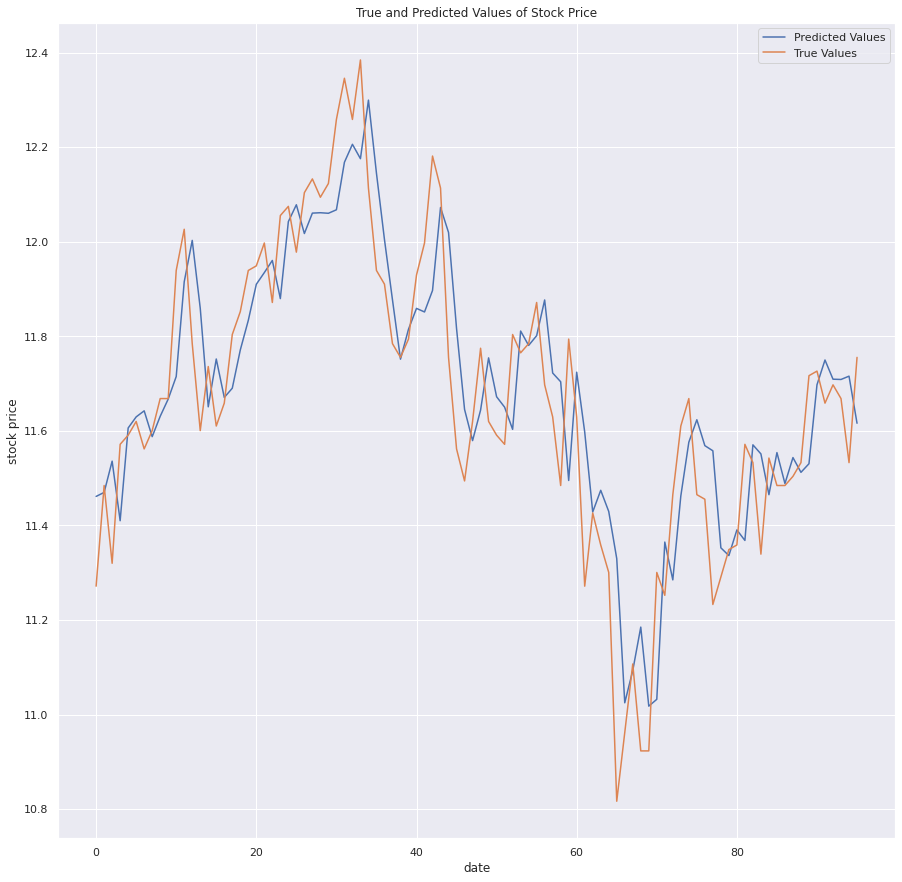

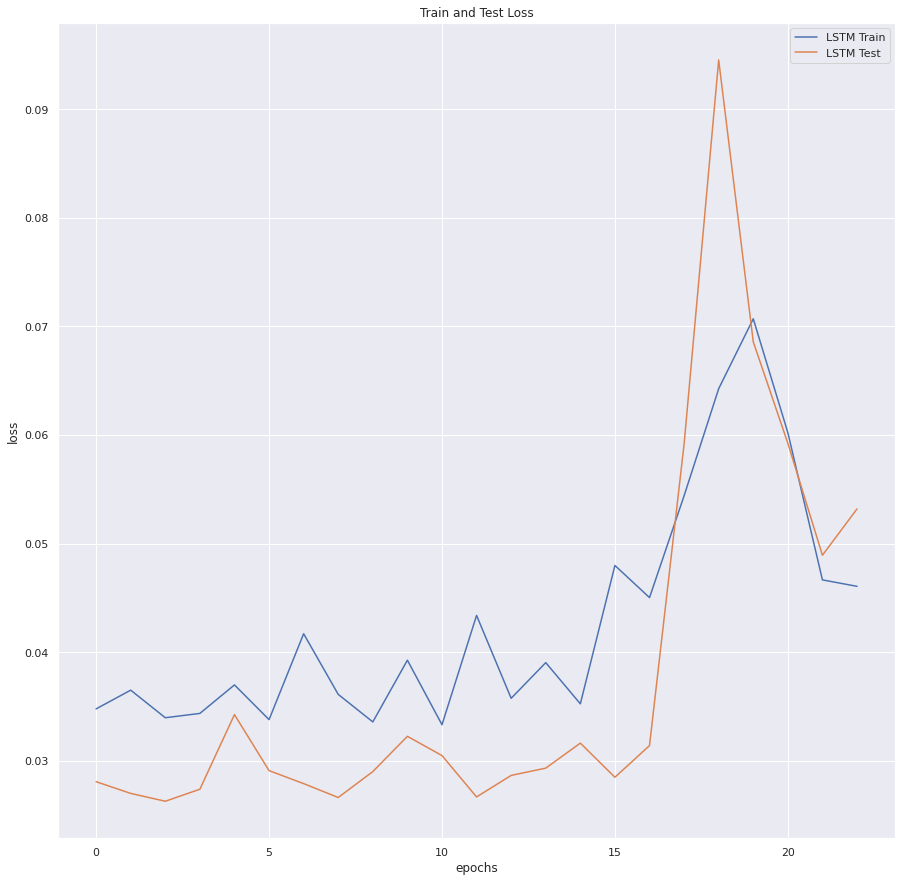

In [241]:
model_evaluation(inv_y_5_AMCR, inv_yhat_5_AMCR, history_5_AMCR)

  Metric     Score
0   EVAR  0.724347
1    CoD  0.714205
2    MAE  0.136851
3    MSE  0.028402
4   RMSE  0.168528
5  MedAE  0.115476
6     ME  0.547680
7   MAPE  0.011726


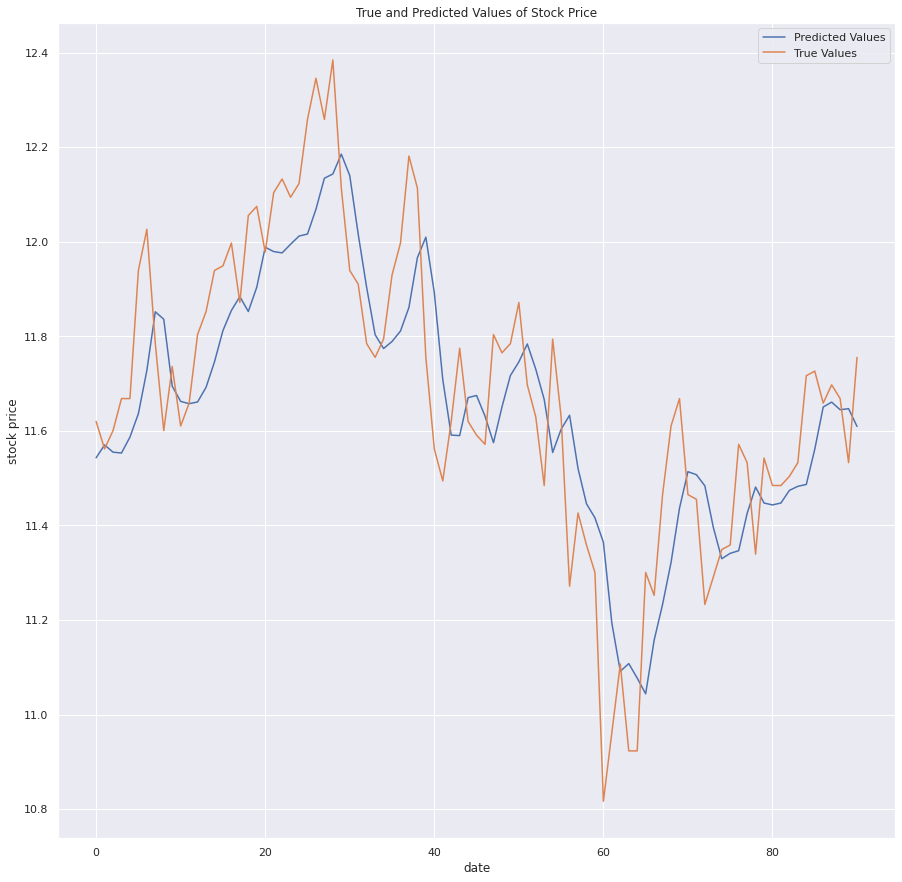

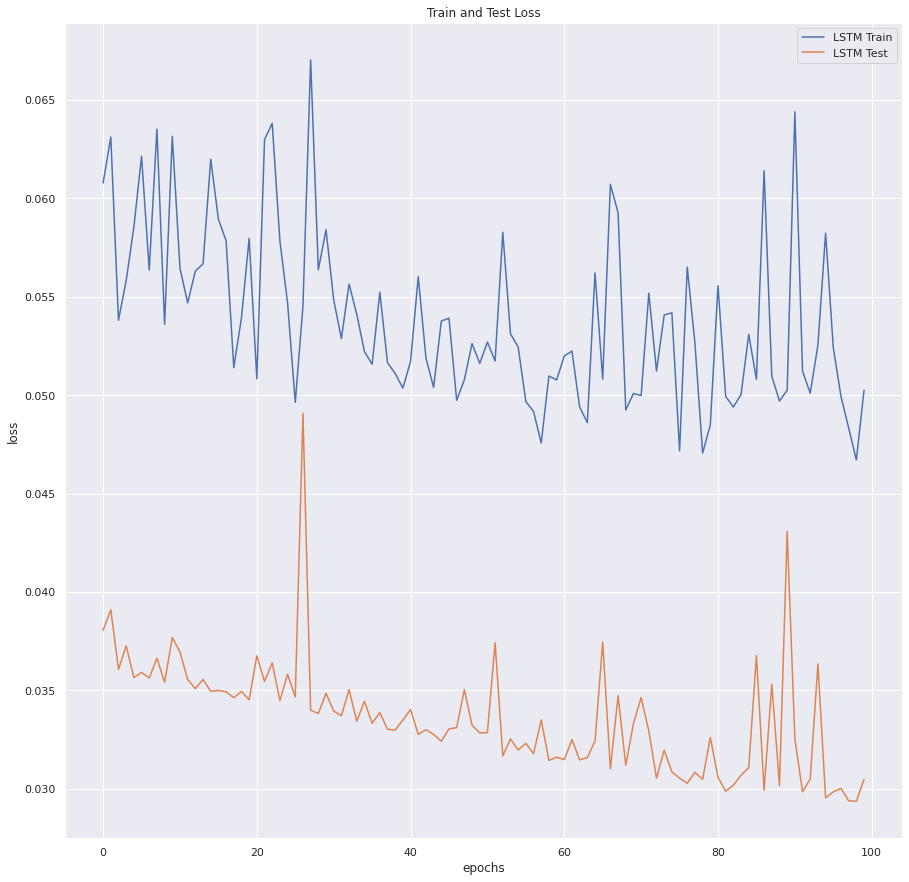

In [242]:
model_evaluation(inv_y_10_AMCR, inv_yhat_10_AMCR, history_10_AMCR)

  Metric     Score
0   EVAR  0.785018
1    CoD  0.784798
2    MAE  0.117553
3    MSE  0.023407
4   RMSE  0.152995
5  MedAE  0.100217
6     ME  0.463039
7   MAPE  0.010102


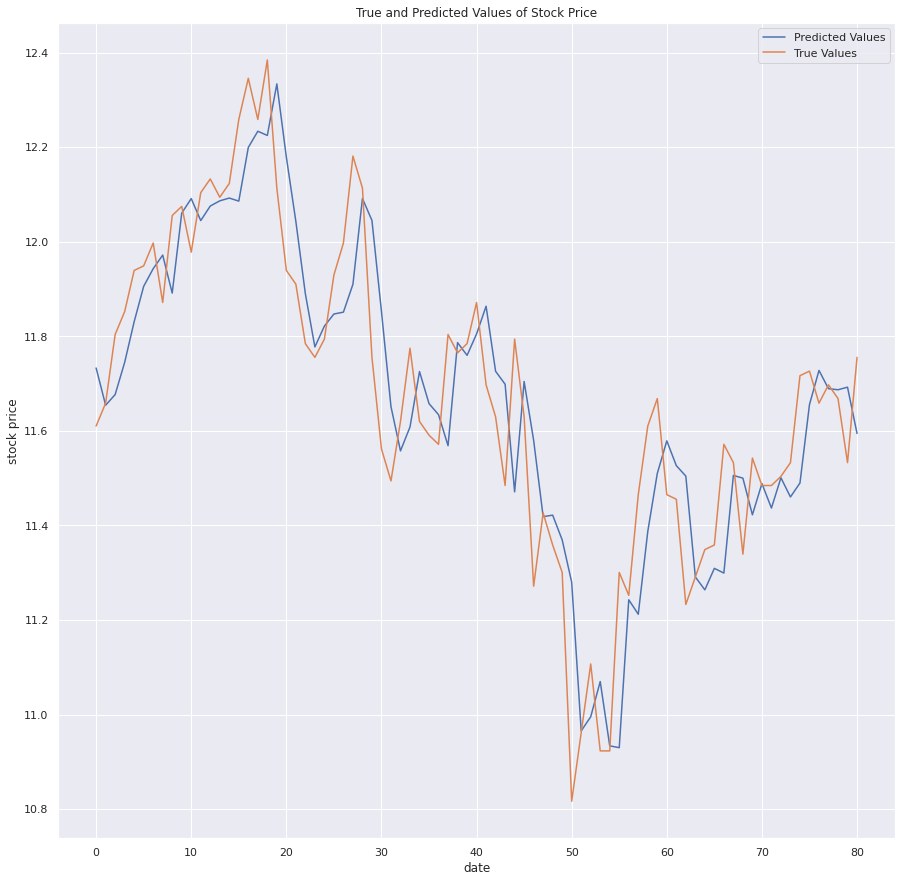

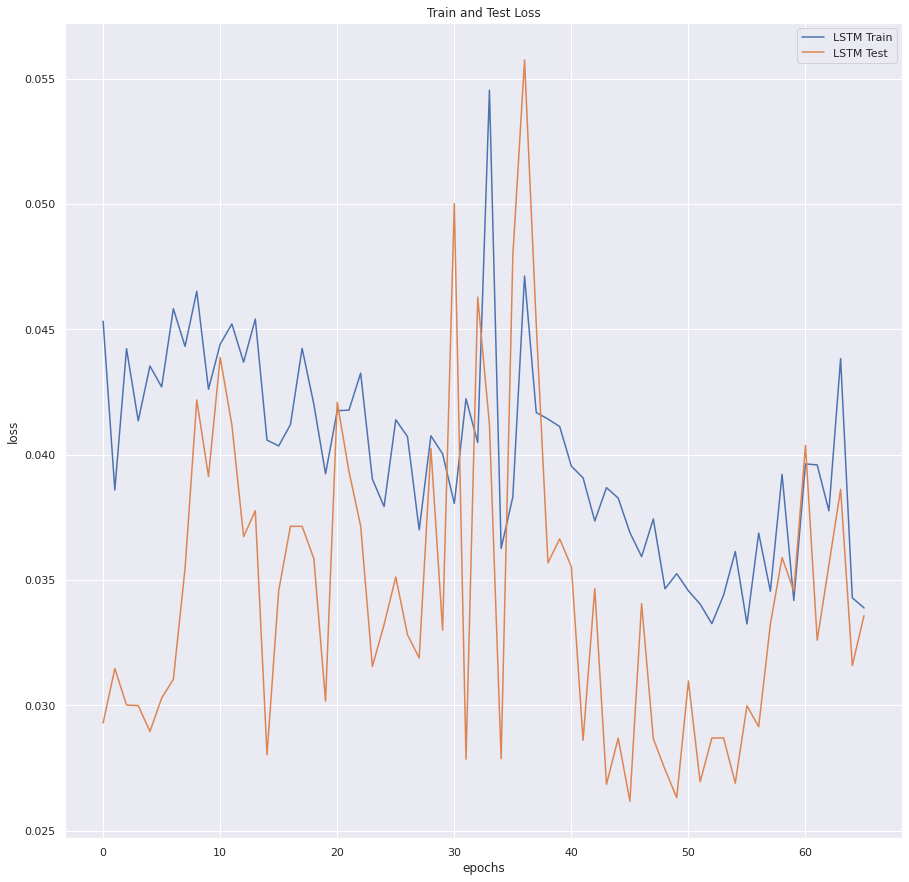

In [243]:
model_evaluation(inv_y_20_AMCR, inv_yhat_20_AMCR, history_20_AMCR)

  Metric         Score
0   EVAR      0.927167
1    CoD      0.924573
2    MAE    111.248929
3    MSE  18171.133323
4   RMSE    134.800346
5  MedAE    106.013097
6     ME    335.102597
7   MAPE      0.021683


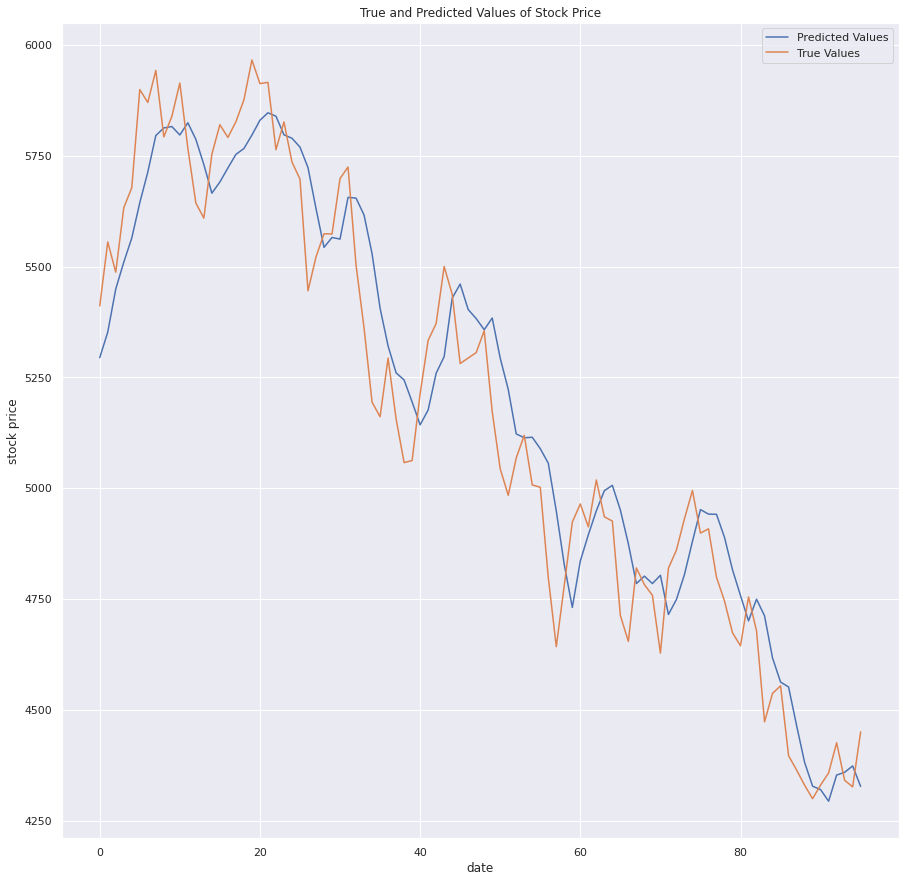

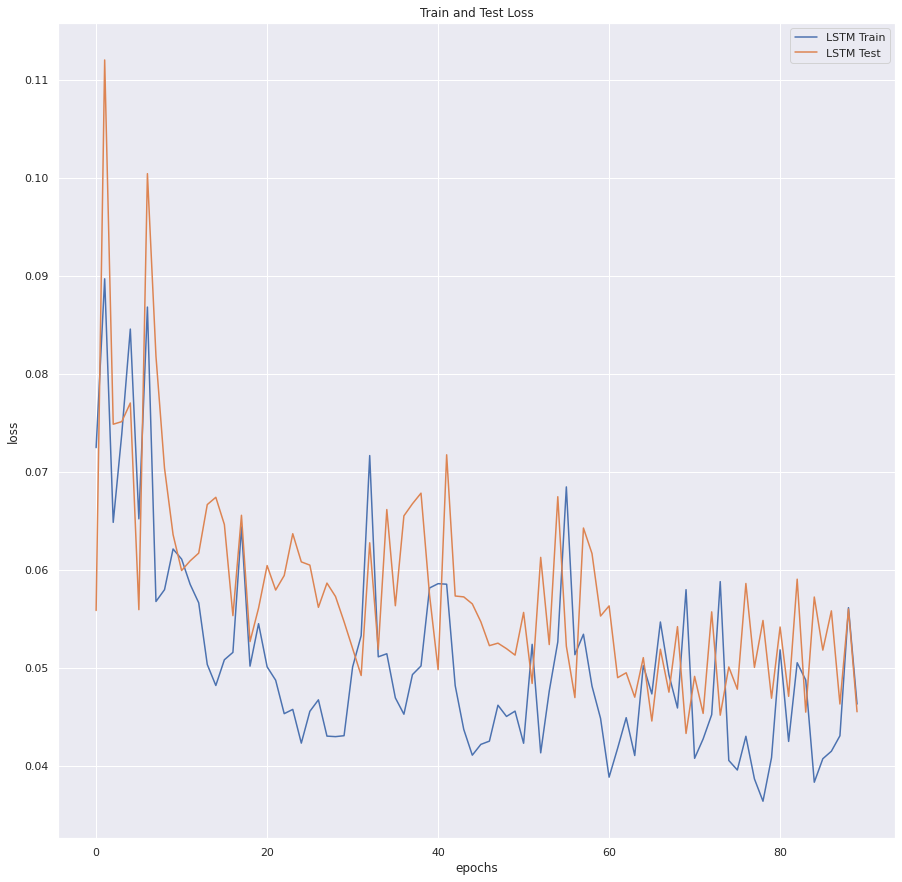

In [244]:
model_evaluation(inv_y_5_NVR, inv_yhat_5_NVR, history_5_NVR)

  Metric         Score
0   EVAR      0.933695
1    CoD      0.932784
2    MAE    104.477826
3    MSE  16463.351932
4   RMSE    128.309594
5  MedAE     92.154268
6     ME    365.566329
7   MAPE      0.020702


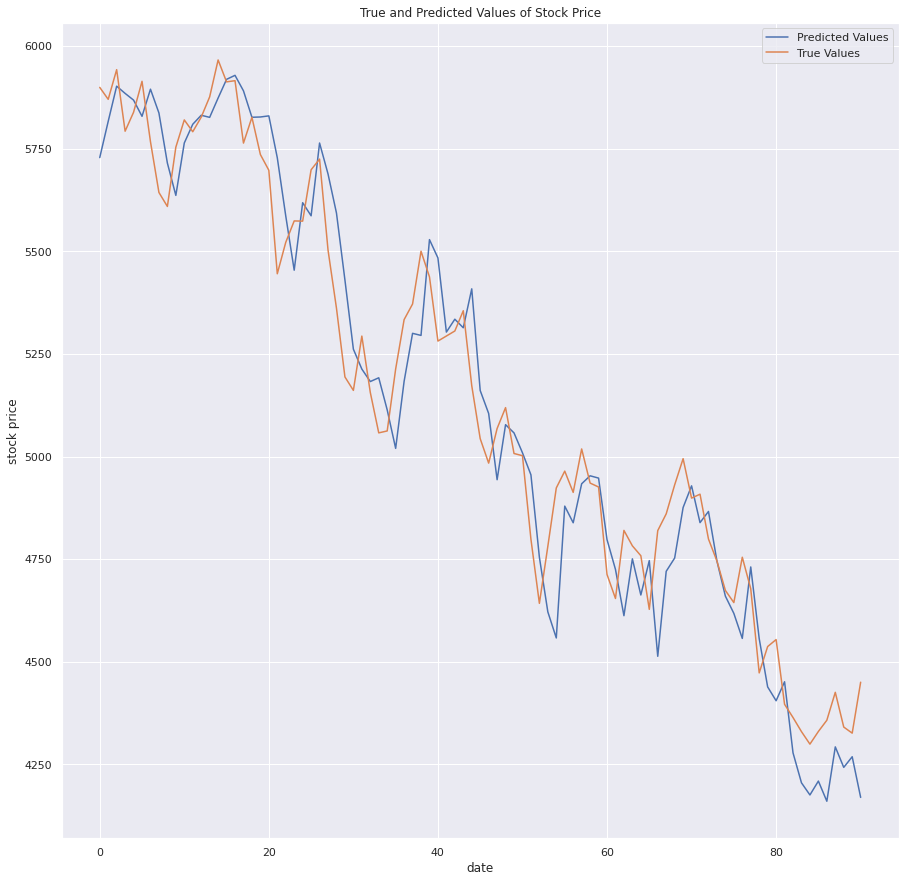

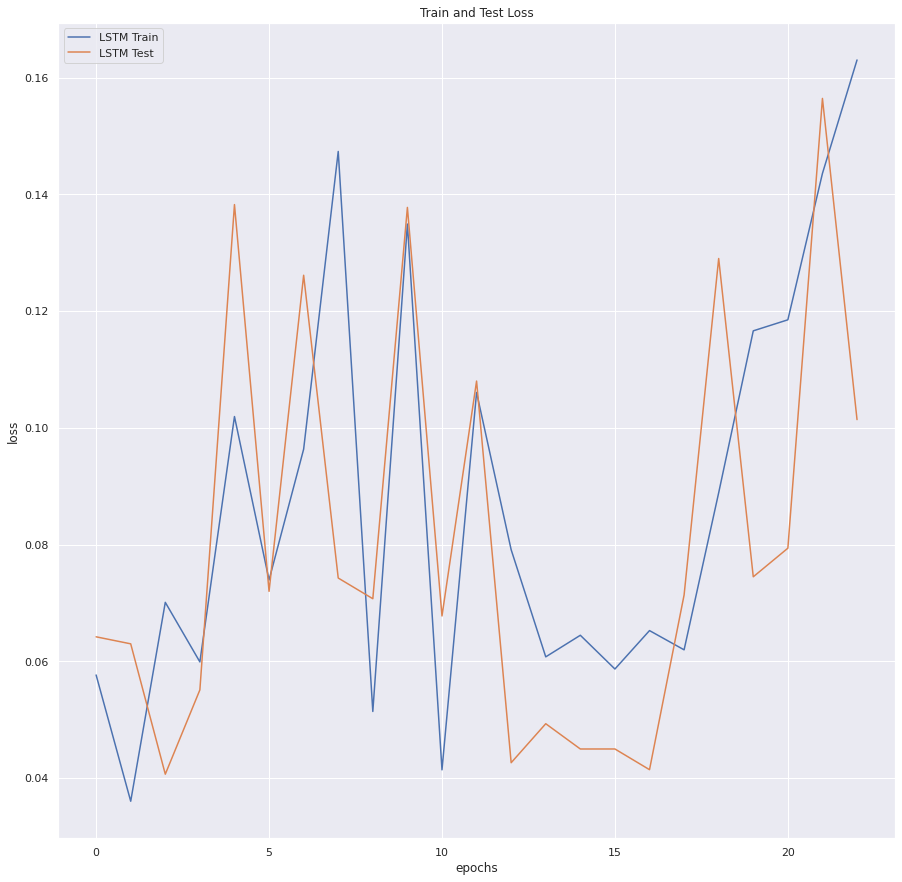

In [245]:
model_evaluation(inv_y_10_NVR, inv_yhat_10_NVR, history_10_NVR)

  Metric         Score
0   EVAR      0.945646
1    CoD      0.944758
2    MAE     88.070806
3    MSE  11796.126267
4   RMSE    108.609973
5  MedAE     75.817933
6     ME    262.379429
7   MAPE      0.017475


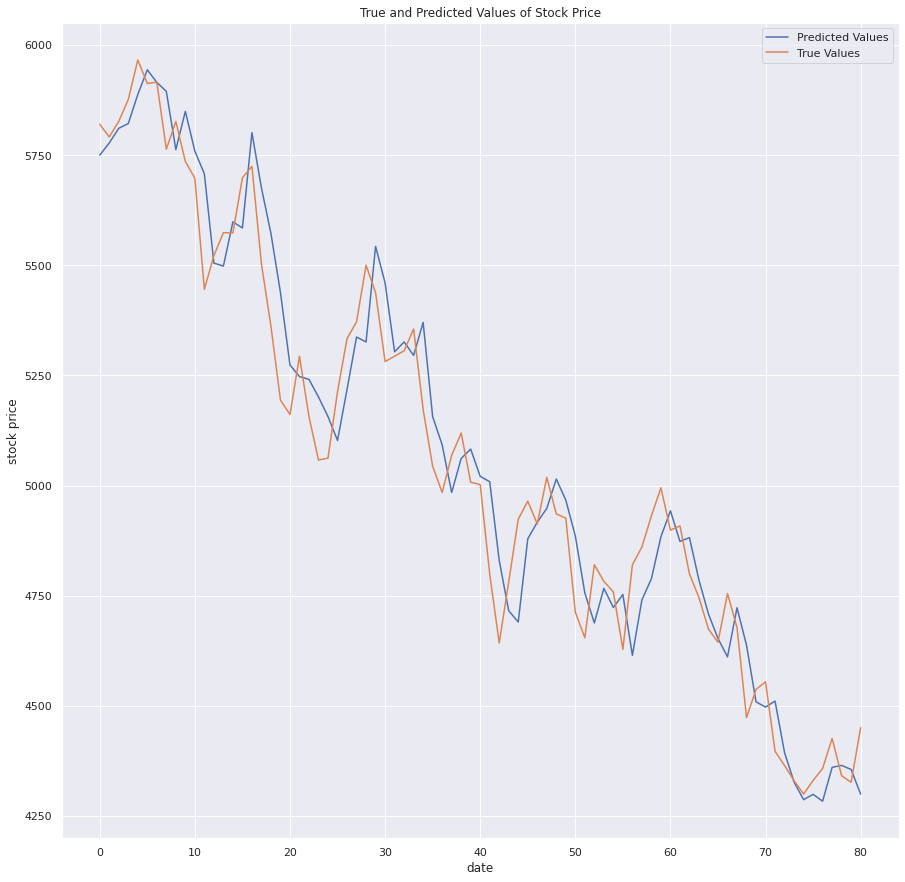

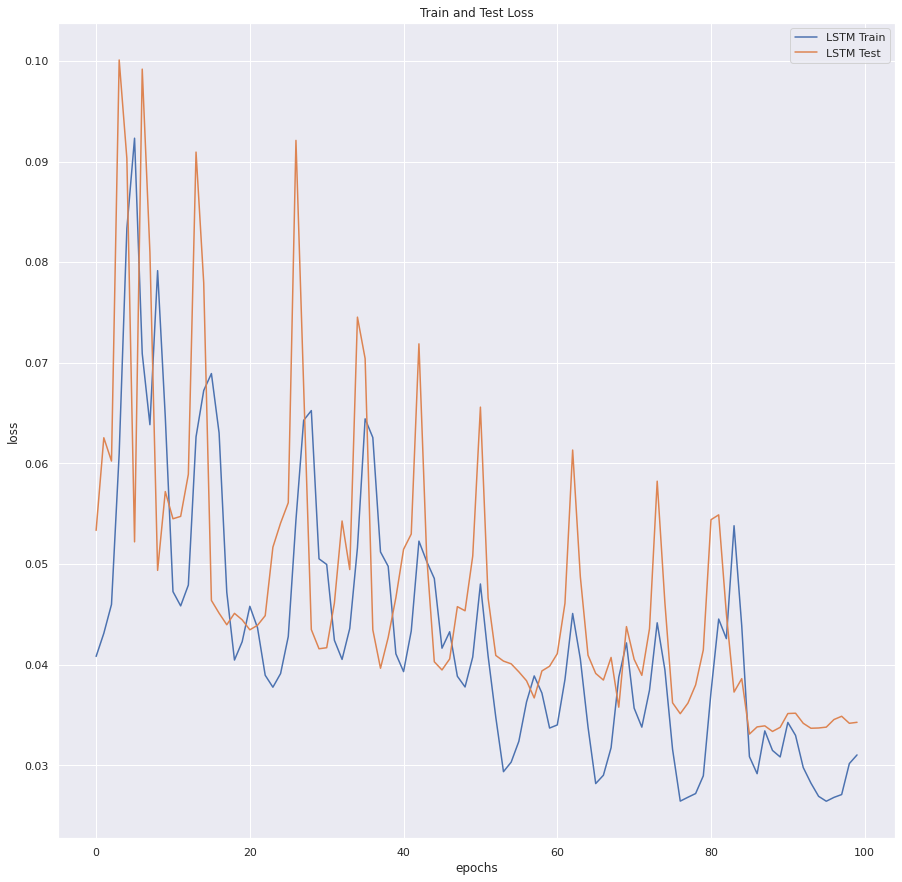

In [246]:
model_evaluation(inv_y_20_NVR, inv_yhat_20_NVR, history_20_NVR)

## LSTM + Sentiment Analysis

  Metric     Score
0   EVAR  0.750677
1    CoD  0.680246
2    MAE  0.141887
3    MSE  0.031262
4   RMSE  0.176810
5  MedAE  0.125179
6     ME  0.558499
7   MAPE  0.012274


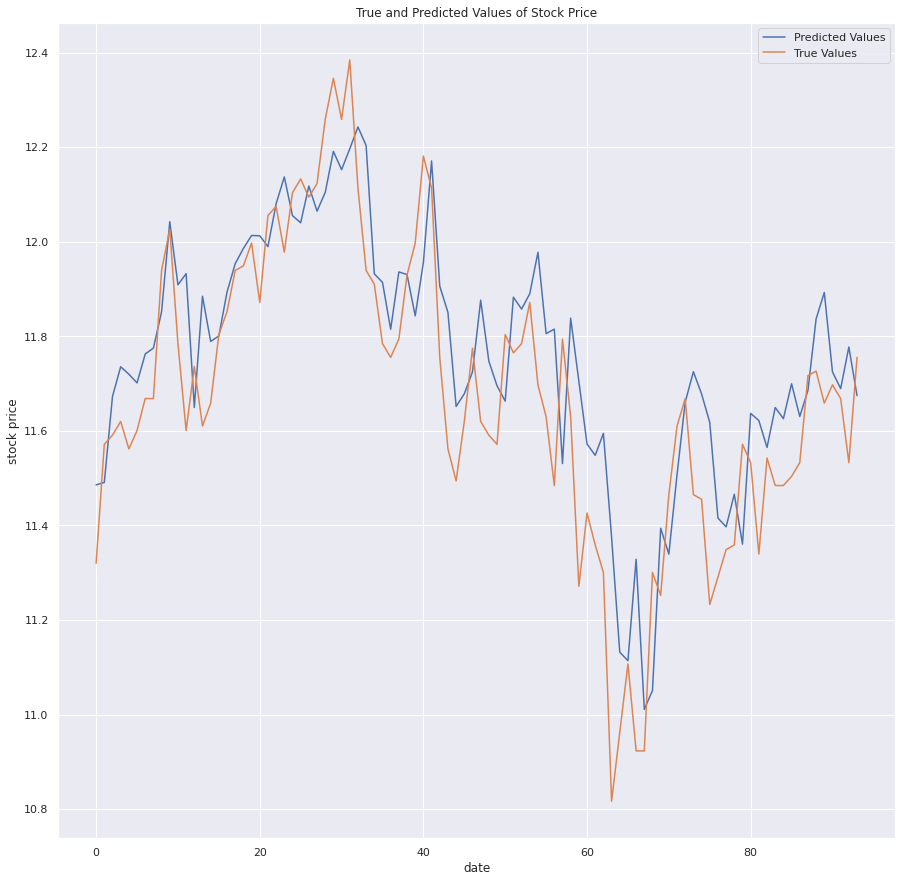

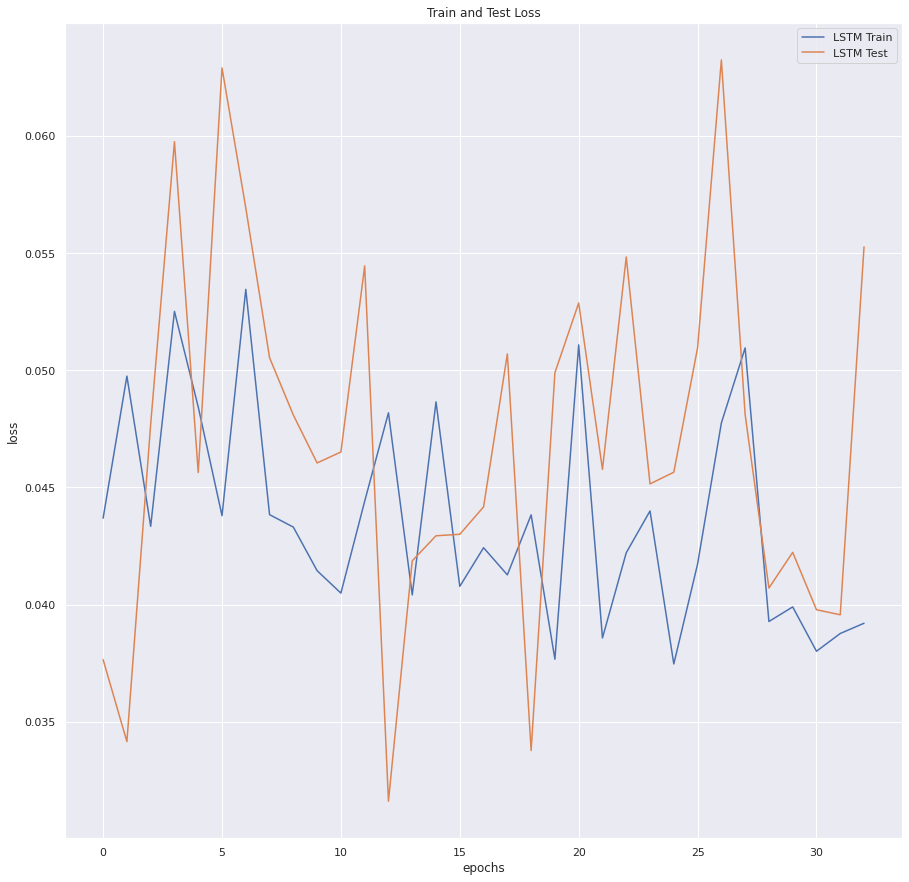

In [247]:
model_evaluation(inv_y_5_AMCR_sentiment, inv_yhat_5_AMCR_sentiment, history_5_AMCR_sentiment)

  Metric     Score
0   EVAR  0.746037
1    CoD  0.733022
2    MAE  0.131292
3    MSE  0.027073
4   RMSE  0.164539
5  MedAE  0.119641
6     ME  0.504502
7   MAPE  0.011242


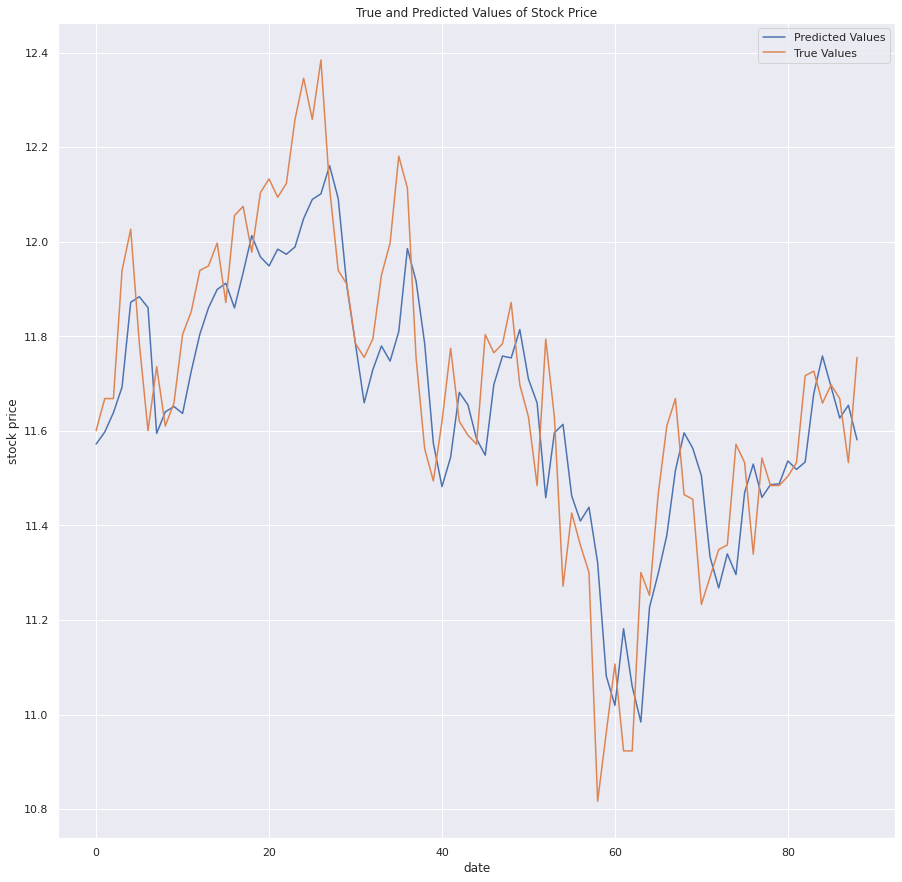

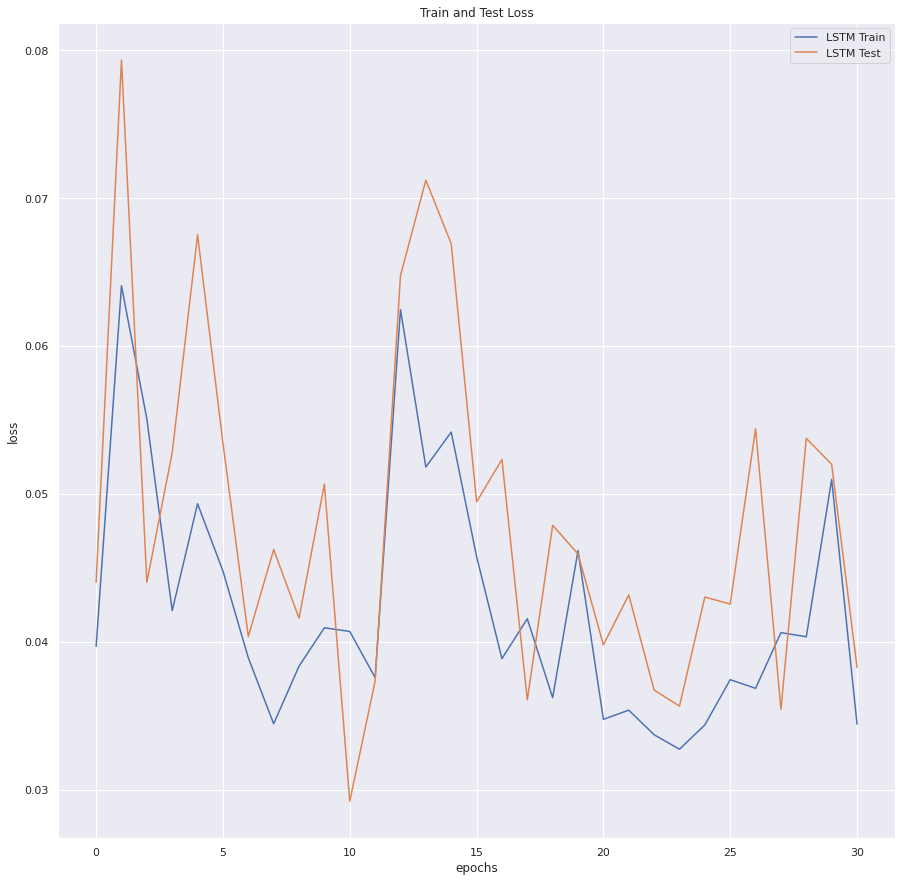

In [248]:
model_evaluation(inv_y_10_AMCR_sentiment, inv_yhat_10_AMCR_sentiment, history_10_AMCR_sentiment)

  Metric     Score
0   EVAR  0.786649
1    CoD  0.764436
2    MAE  0.125720
3    MSE  0.026257
4   RMSE  0.162039
5  MedAE  0.090586
6     ME  0.509910
7   MAPE  0.010855


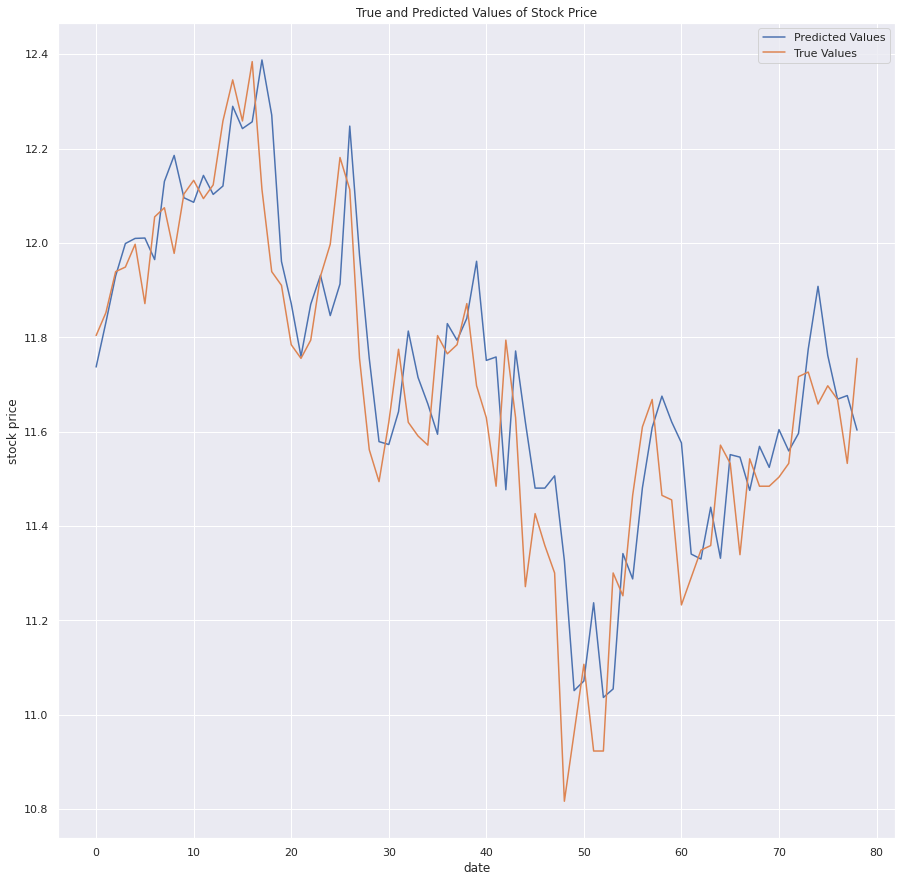

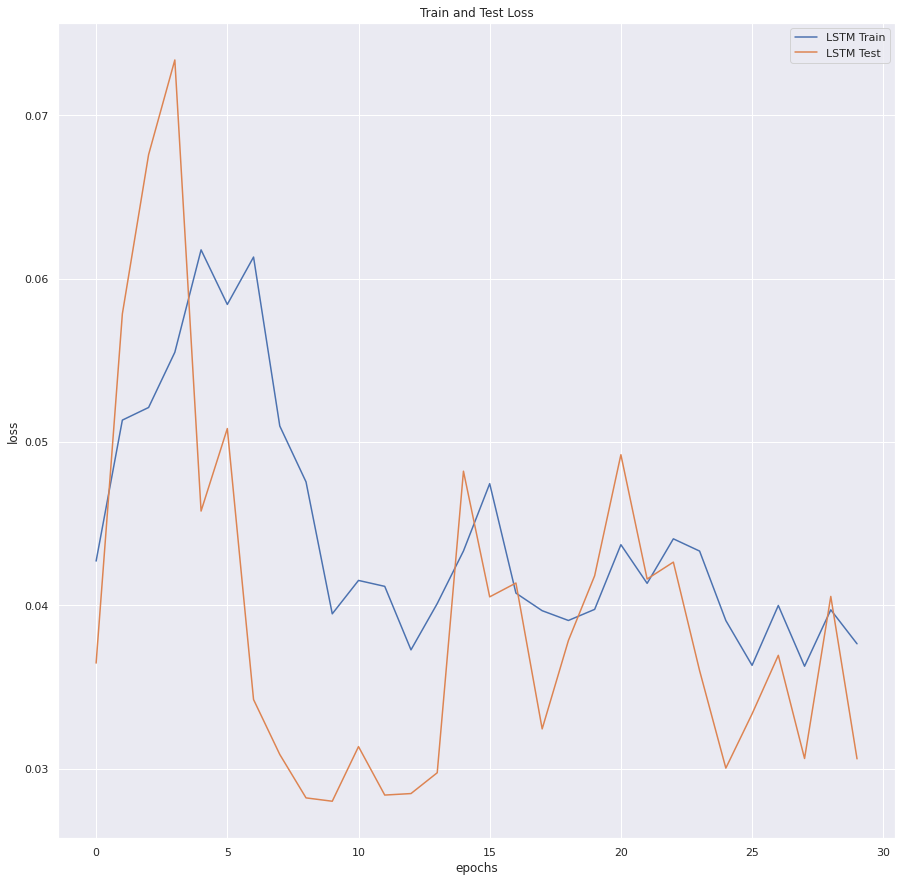

In [249]:
model_evaluation(inv_y_20_AMCR_sentiment, inv_yhat_20_AMCR_sentiment, history_20_AMCR_sentiment)

  Metric         Score
0   EVAR      0.950983
1    CoD      0.949722
2    MAE     88.520512
3    MSE  11966.784228
4   RMSE    109.392798
5  MedAE     80.578653
6     ME    258.107371
7   MAPE      0.017394


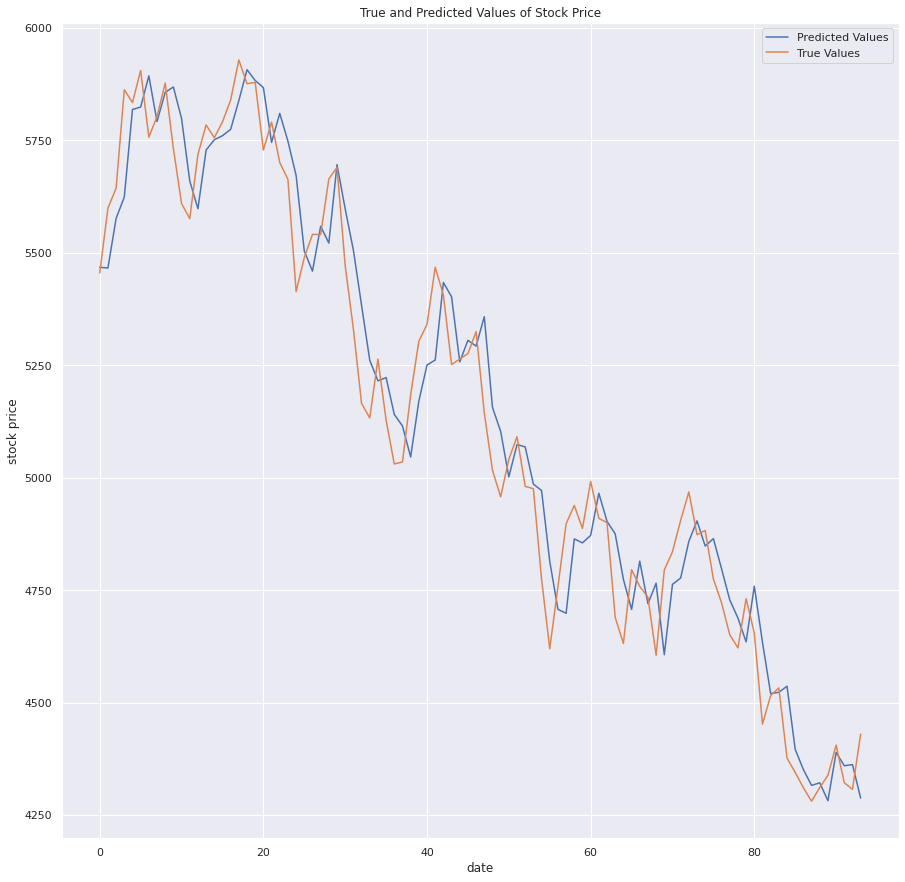

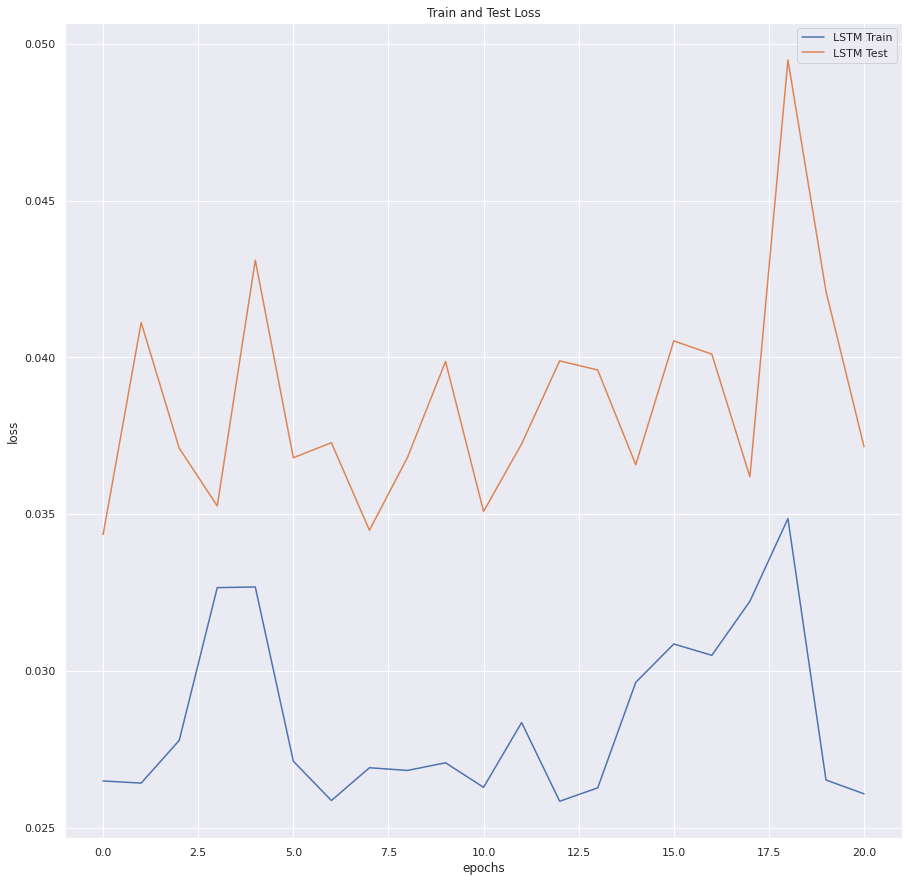

In [250]:
model_evaluation(inv_y_5_NVR_sentiment, inv_yhat_5_NVR_sentiment, history_5_NVR_sentiment)

  Metric         Score
0   EVAR      0.955385
1    CoD      0.955380
2    MAE     84.678813
3    MSE  10362.981351
4   RMSE    101.798730
5  MedAE     75.838438
6     ME    233.225100
7   MAPE      0.016638


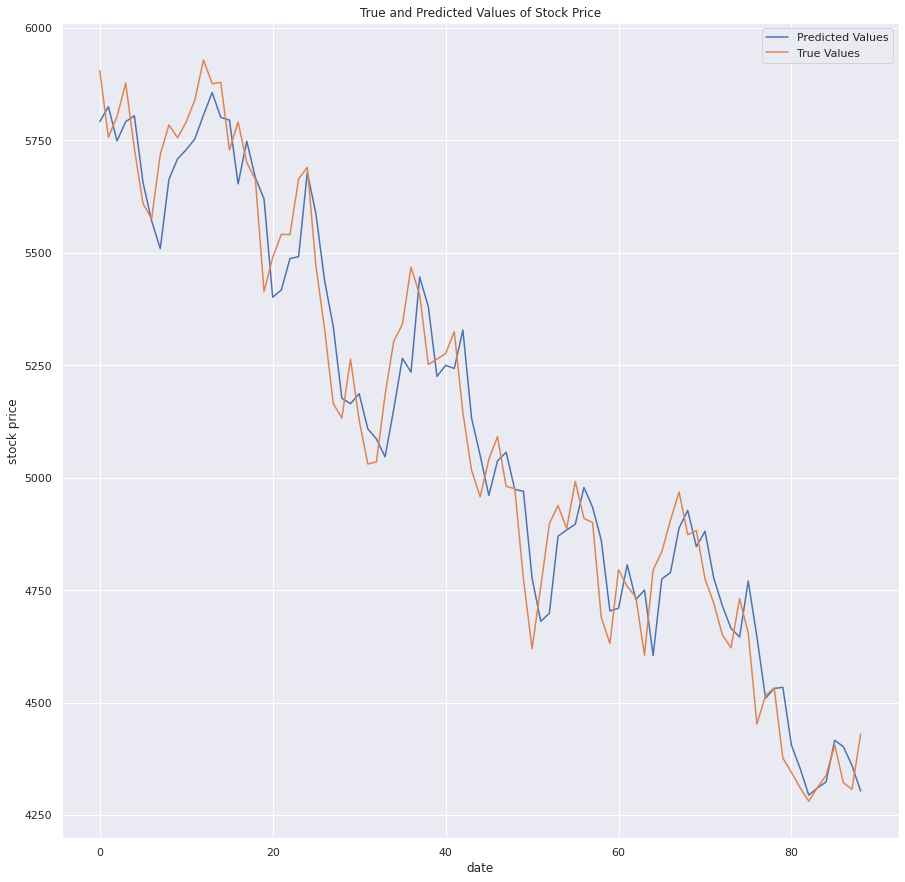

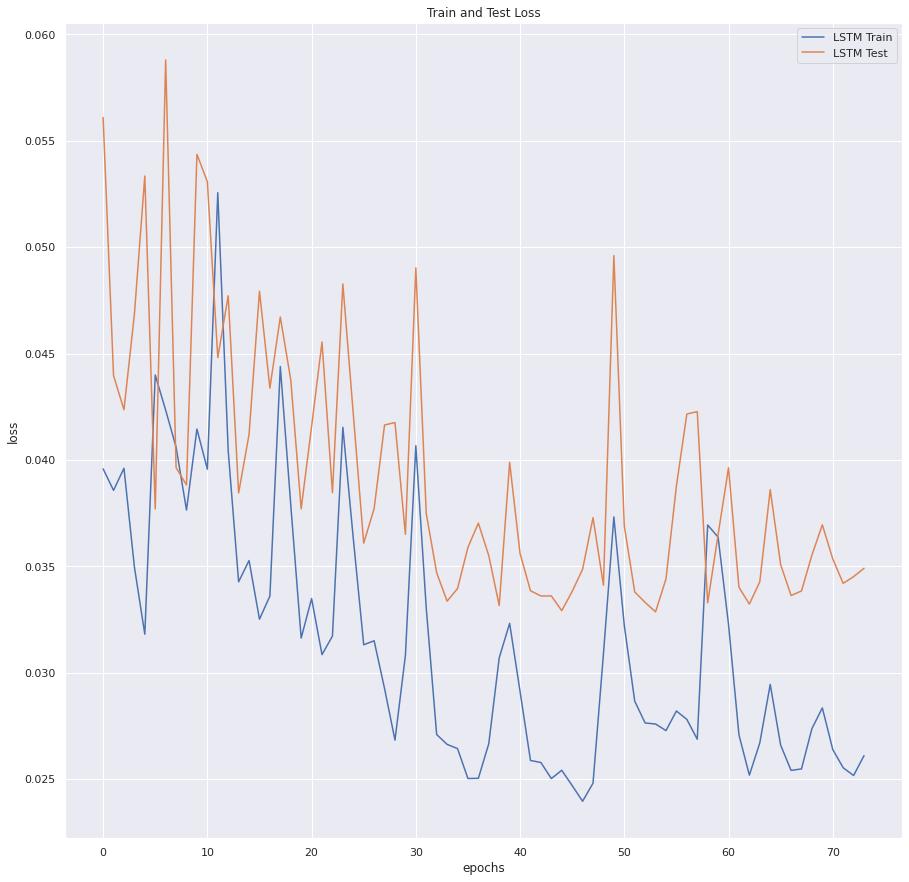

In [251]:
model_evaluation(inv_y_10_NVR_sentiment, inv_yhat_10_NVR_sentiment, history_10_NVR_sentiment)

  Metric         Score
0   EVAR      0.941394
1    CoD      0.939483
2    MAE     91.427573
3    MSE  12091.791314
4   RMSE    109.962681
5  MedAE     74.437117
6     ME    230.065965
7   MAPE      0.018037


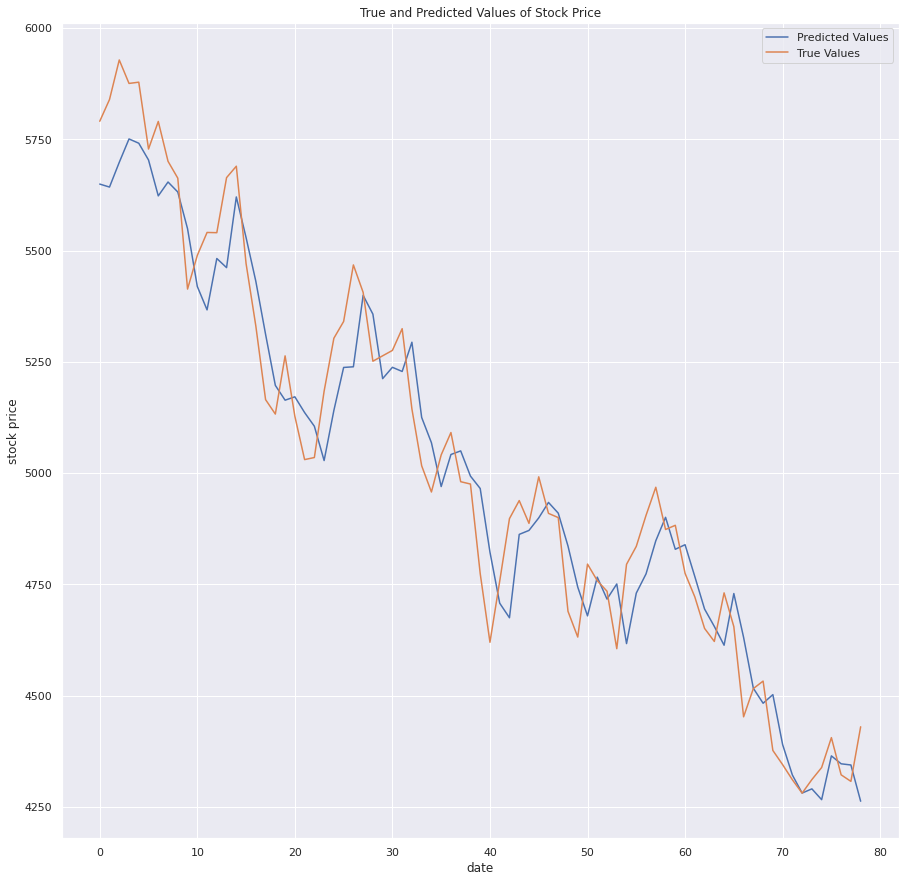

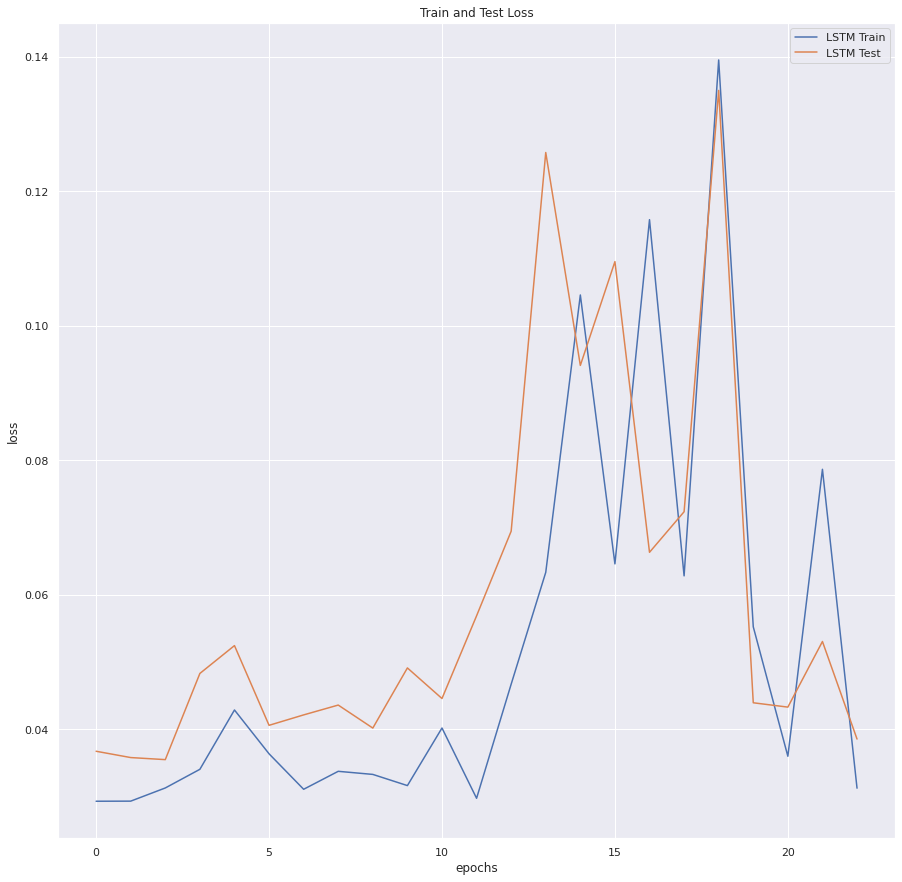

In [252]:
model_evaluation(inv_y_20_NVR_sentiment, inv_yhat_20_NVR_sentiment, history_20_NVR_sentiment)

## Random Forest

AMCR AND NCR EVALUATION FOR EACH LAGS

  Metric     Score
0   EVAR  0.761198
1    CoD  0.761198
2    MAE  0.117656
3    MSE  0.023346
4   RMSE  0.152795
5  MedAE  0.094730
6     ME  0.484489
7   MAPE  0.010111


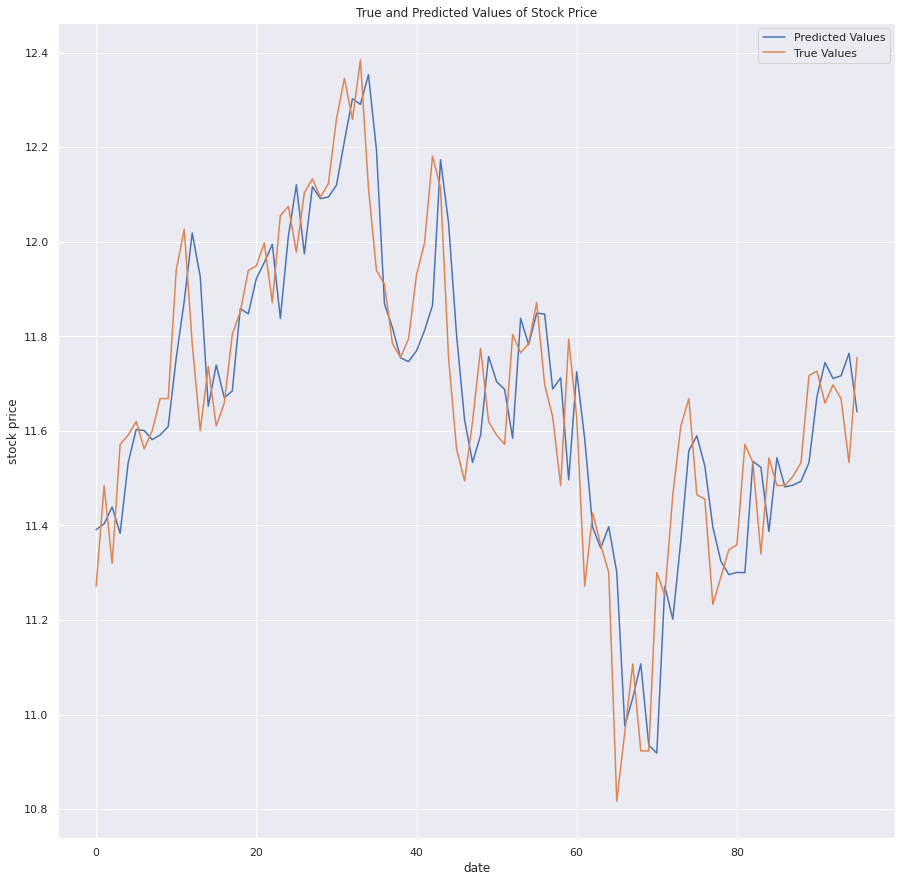

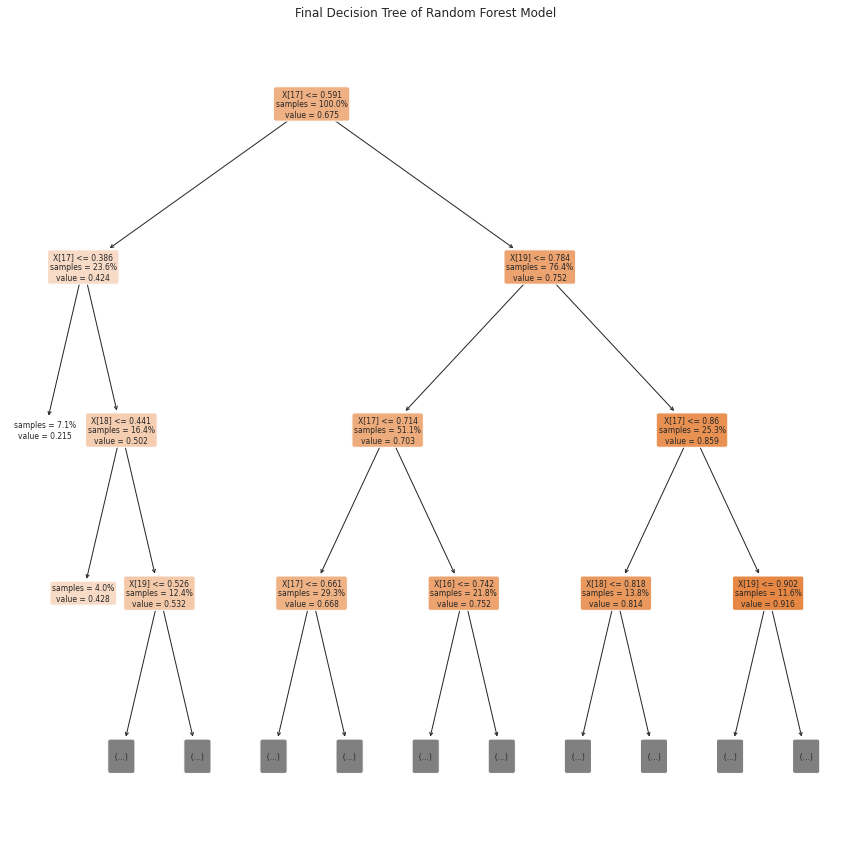

In [253]:
model_evaluation(inv_yy_5_AMCR, inv_yyhat_5_AMCR, rf_model_5_AMCR) 

  Metric     Score
0   EVAR  0.735156
1    CoD  0.735153
2    MAE  0.128402
3    MSE  0.026320
4   RMSE  0.162234
5  MedAE  0.106155
6     ME  0.464437
7   MAPE  0.011043


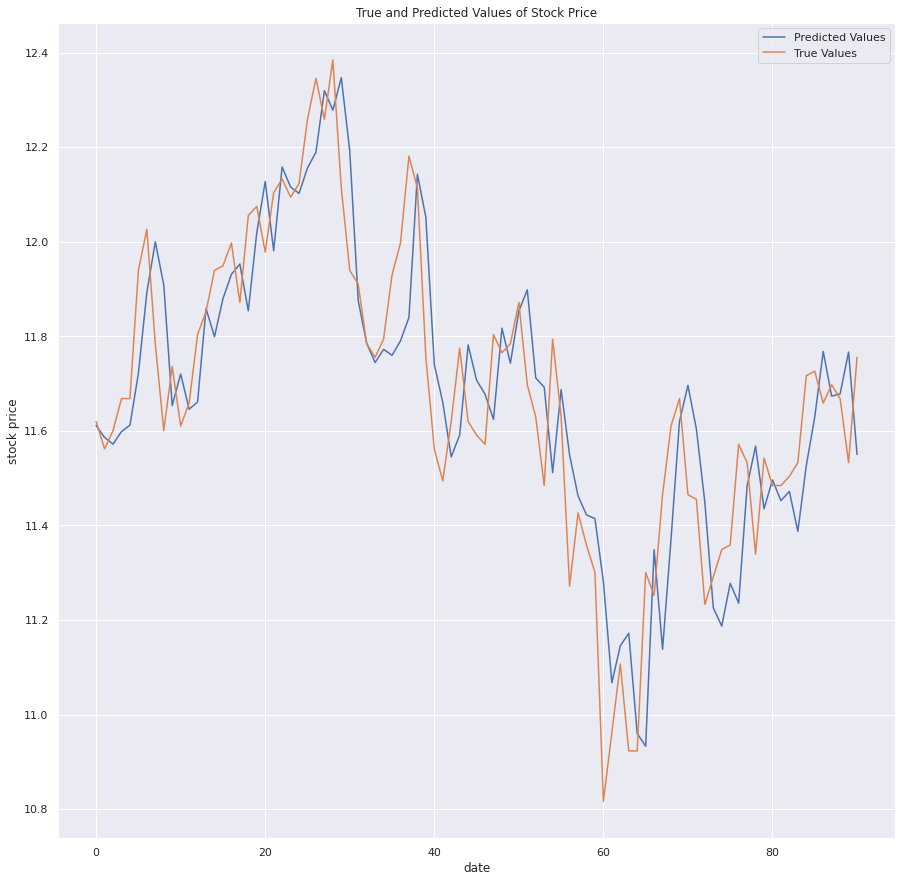

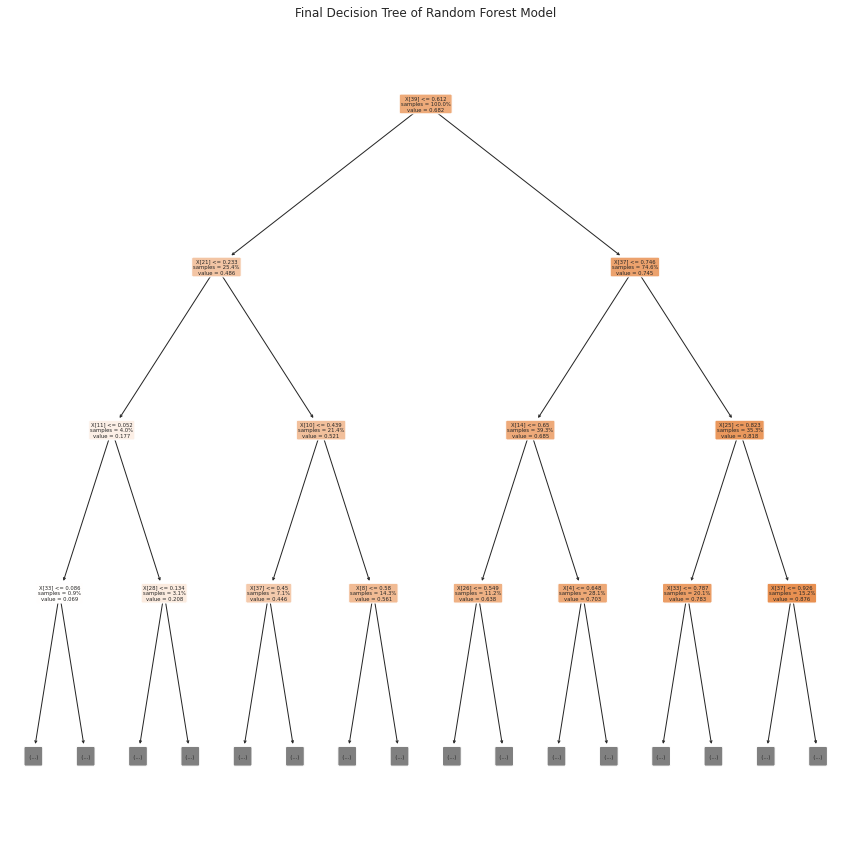

In [254]:
model_evaluation(inv_yy_10_AMCR, inv_yyhat_10_AMCR, rf_model_10_AMCR) 

  Metric     Score
0   EVAR  0.735156
1    CoD  0.735153
2    MAE  0.128402
3    MSE  0.026320
4   RMSE  0.162234
5  MedAE  0.106155
6     ME  0.464437
7   MAPE  0.011043


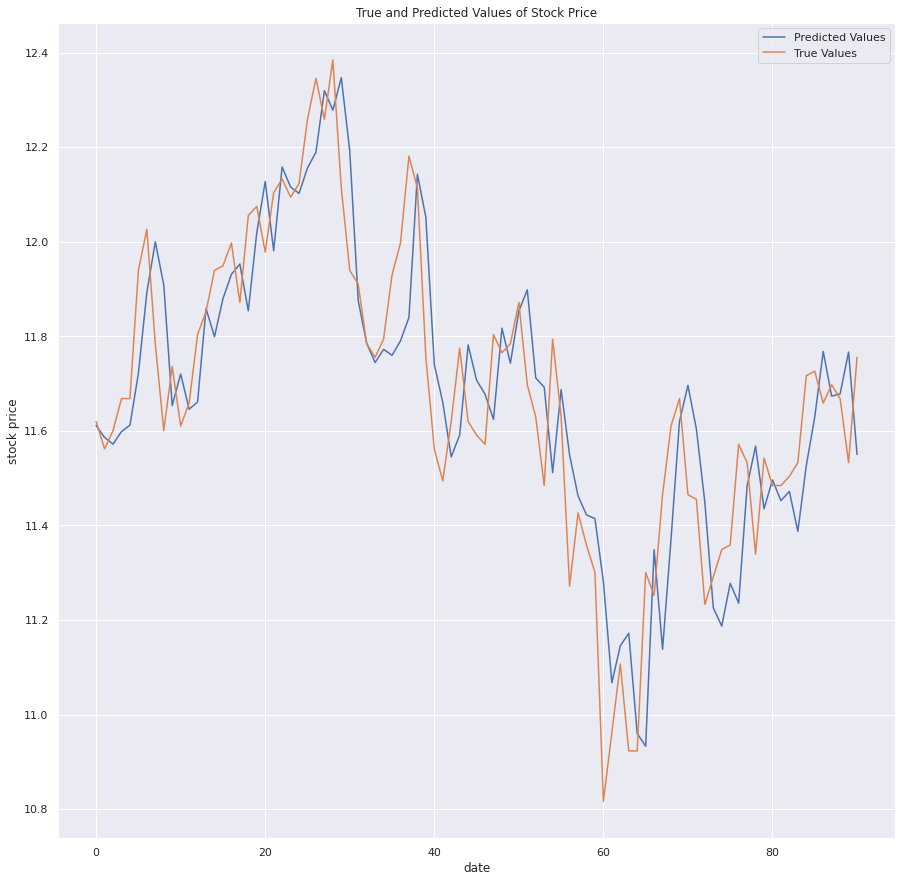

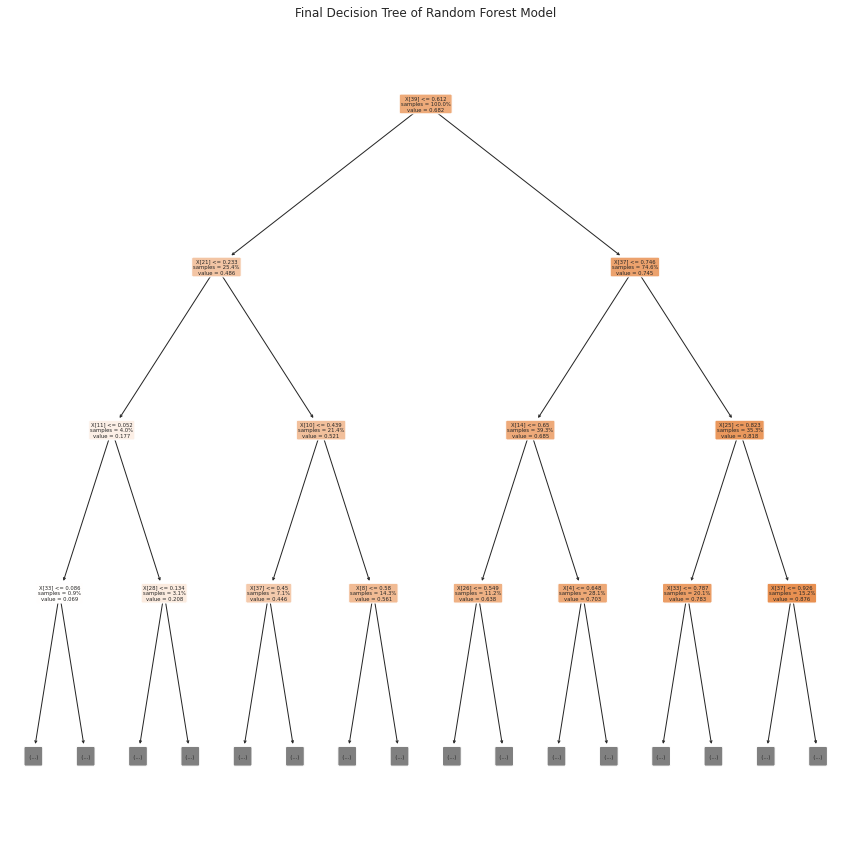

In [255]:
model_evaluation(inv_yy_10_AMCR, inv_yyhat_10_AMCR, rf_model_10_AMCR) 

  Metric     Score
0   EVAR  0.730280
1    CoD  0.730257
2    MAE  0.141381
3    MSE  0.029340
4   RMSE  0.171289
5  MedAE  0.124991
6     ME  0.494257
7   MAPE  0.012187


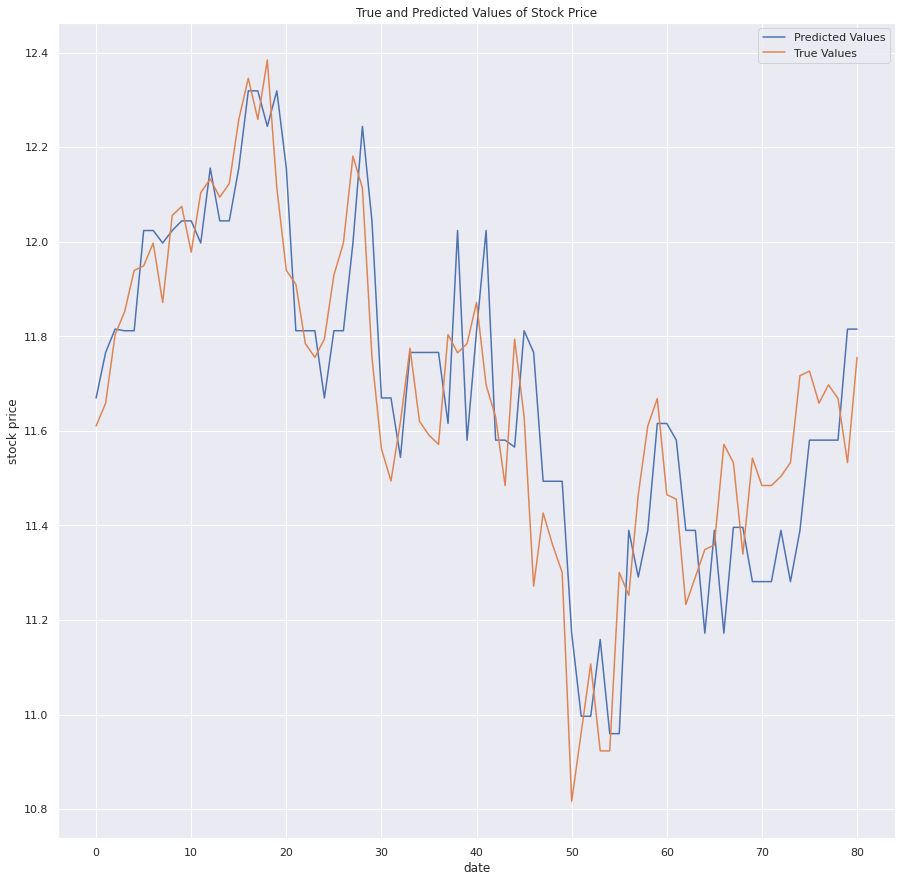

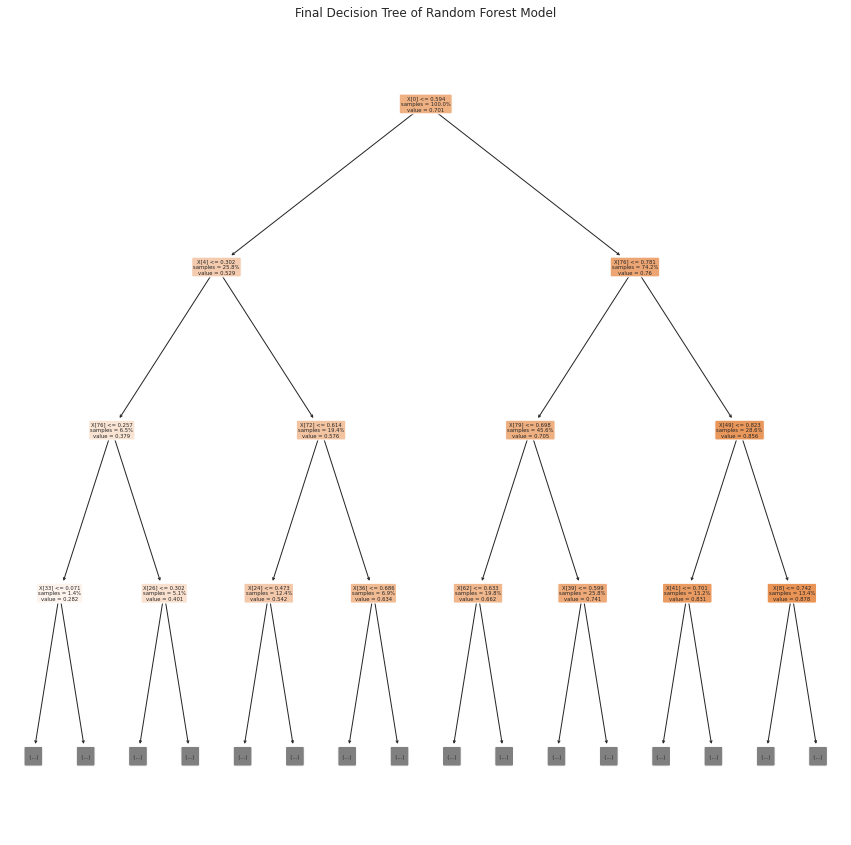

In [256]:
model_evaluation(inv_yy_20_AMCR, inv_yyhat_20_AMCR, rf_model_20_AMCR) 

  Metric         Score
0   EVAR      0.714642
1    CoD      0.596160
2    MAE    228.192305
3    MSE  97288.894855
4   RMSE    311.911678
5  MedAE    125.521456
6     ME    723.934634
7   MAPE      0.041426


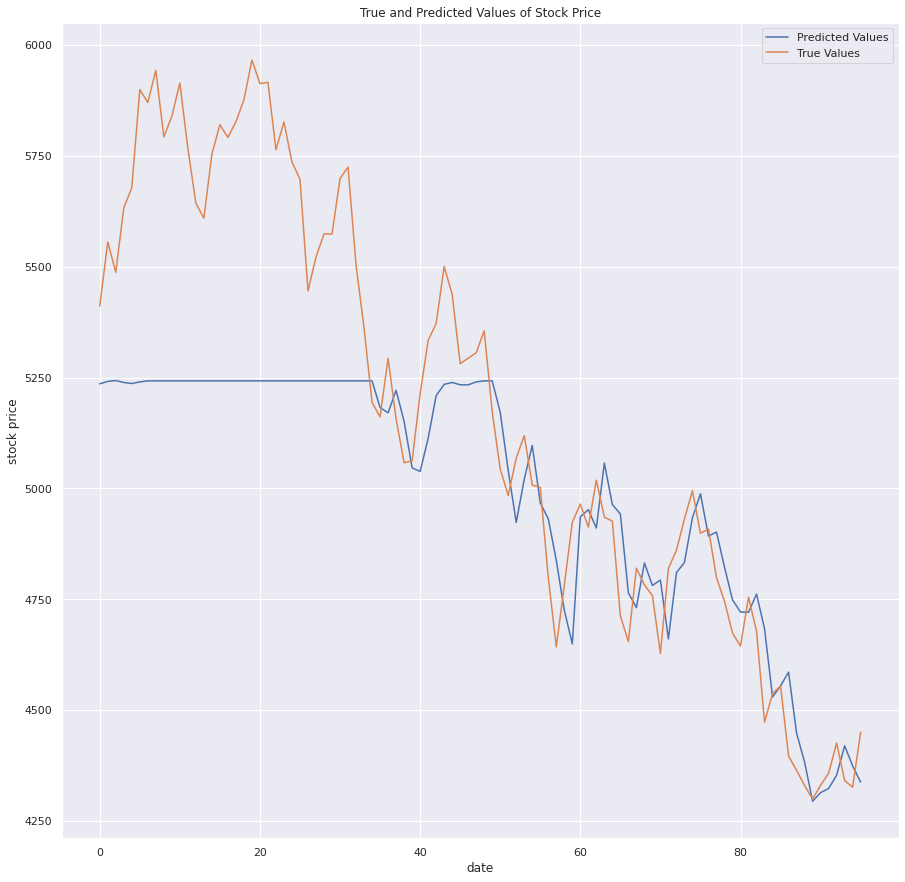

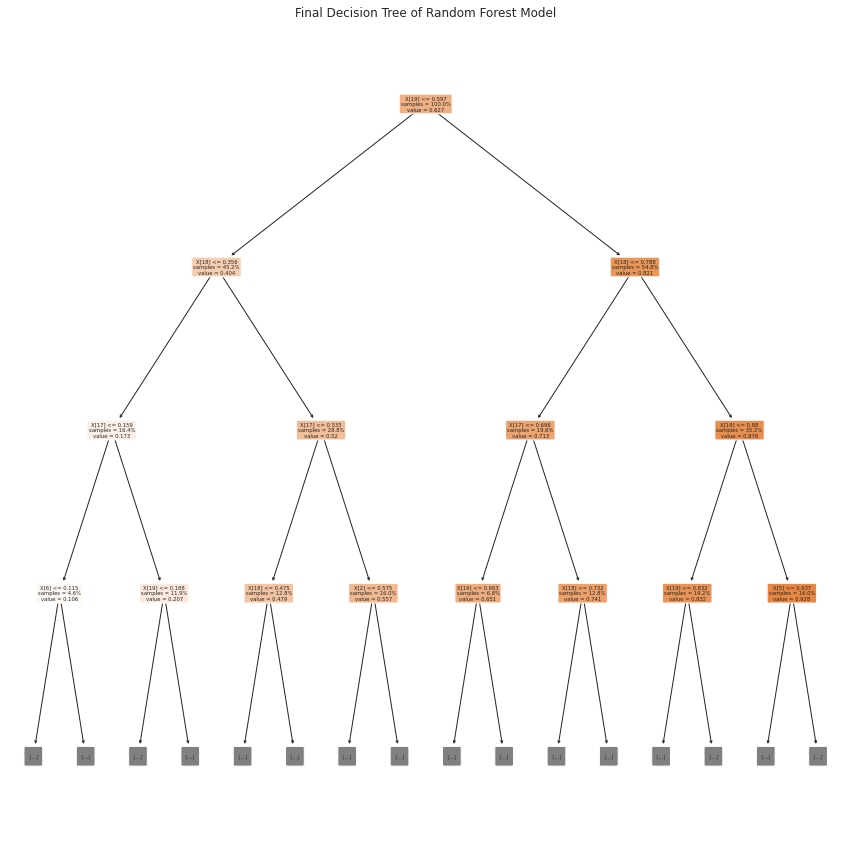

In [257]:
model_evaluation(inv_yy_5_NVR, inv_yyhat_5_NVR, rf_model_5_NVR) 

  Metric          Score
0   EVAR       0.698693
1    CoD       0.585212
2    MAE     229.531751
3    MSE  101595.606642
4   RMSE     318.740657
5  MedAE     125.380548
6     ME     737.812042
7   MAPE       0.041726


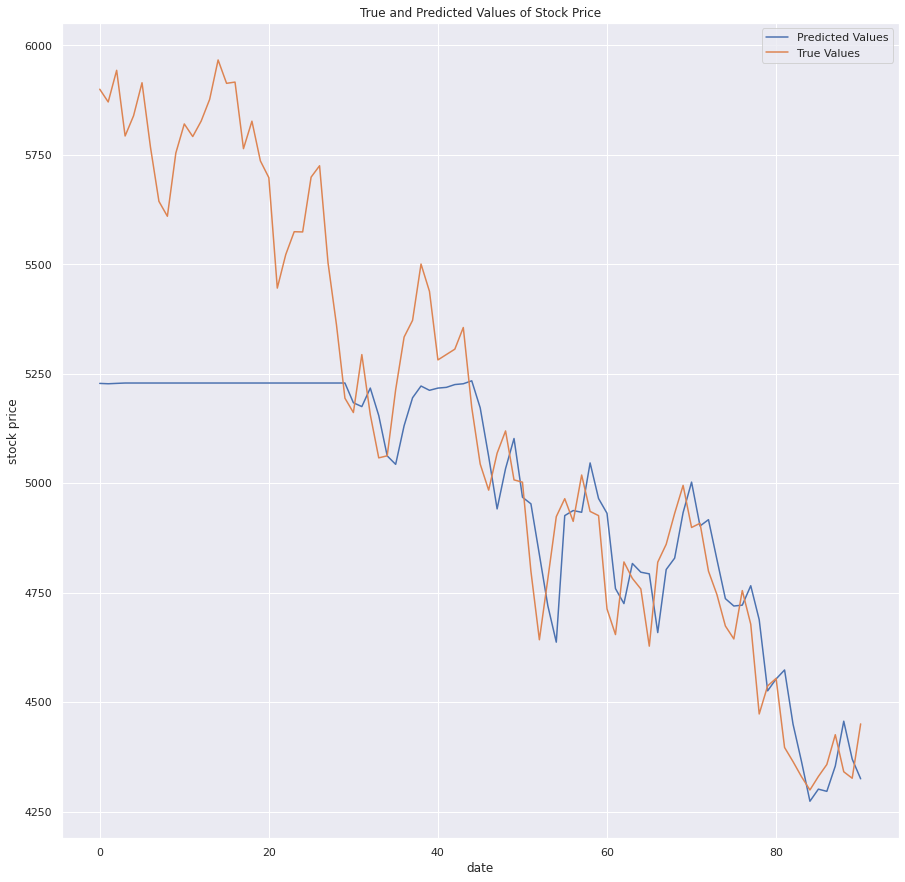

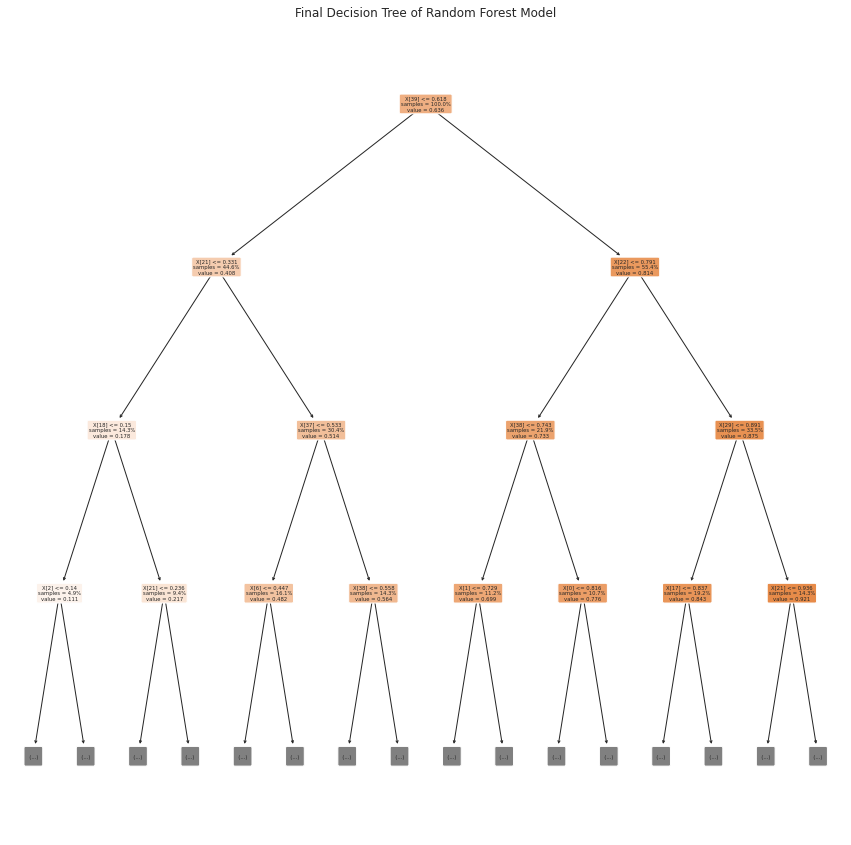

In [258]:
model_evaluation(inv_yy_10_NVR, inv_yyhat_10_NVR, rf_model_10_NVR) 

  Metric         Score
0   EVAR      0.726247
1    CoD      0.668304
2    MAE    188.364297
3    MSE  70828.799302
4   RMSE    266.136806
5  MedAE    118.788585
6     ME    725.192790
7   MAPE      0.035148


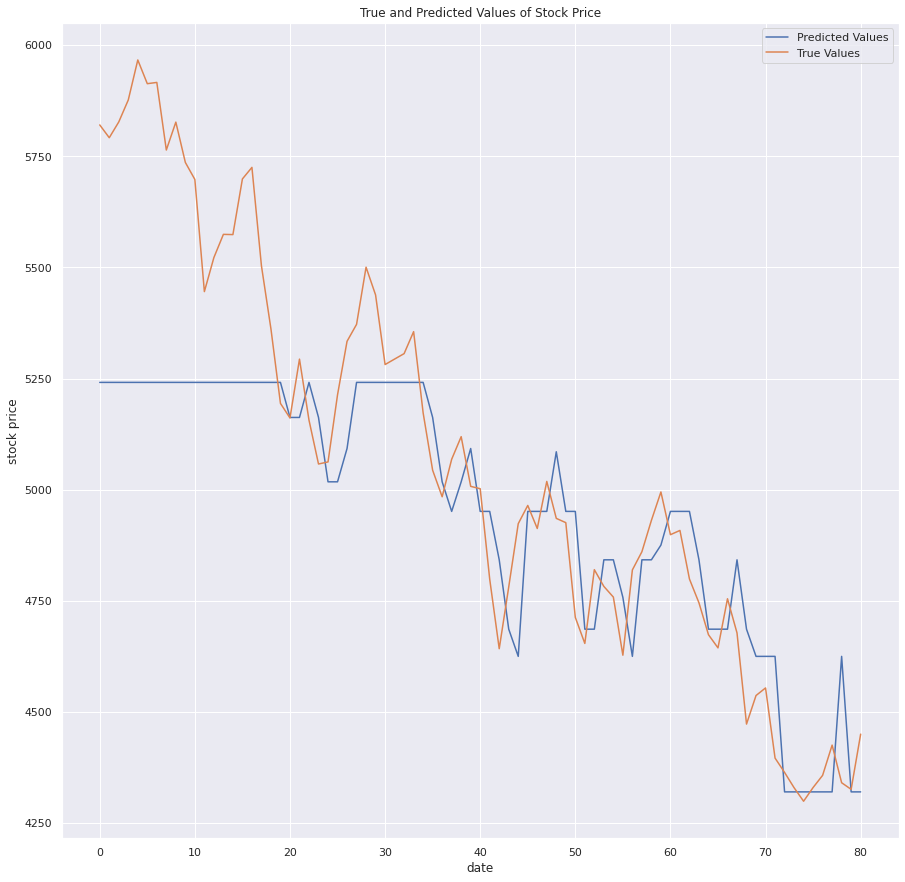

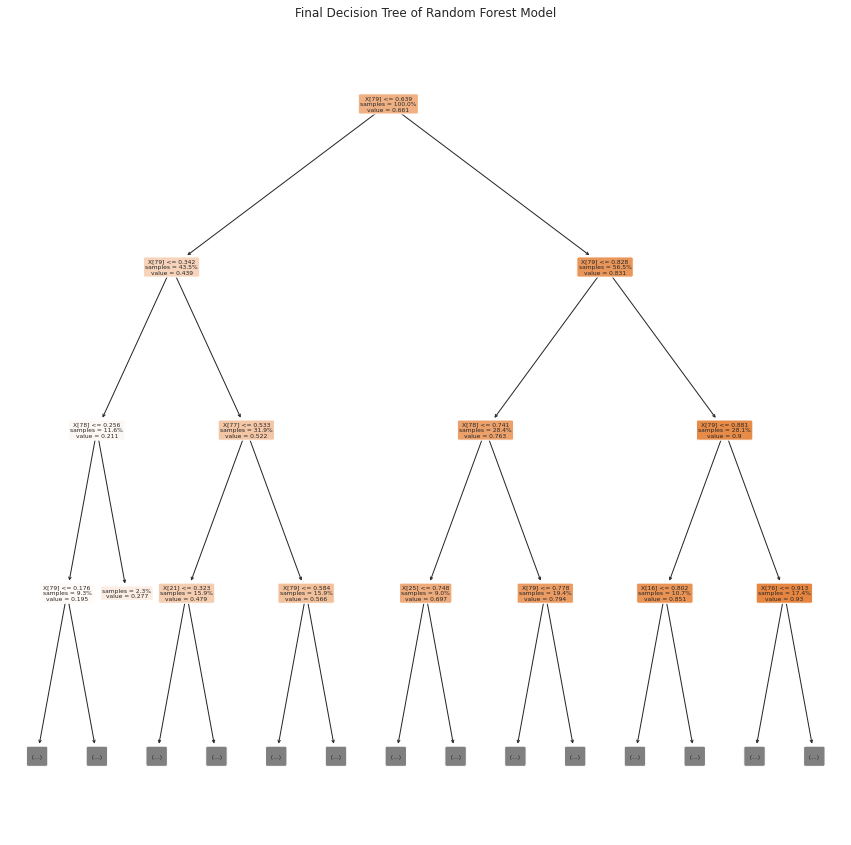

In [259]:
model_evaluation(inv_yy_20_NVR, inv_yyhat_20_NVR, rf_model_20_NVR) 

##Bagging

  Metric     Score
0   EVAR  0.766199
1    CoD  0.757561
2    MAE  0.118342
3    MSE  0.023702
4   RMSE  0.153954
5  MedAE  0.100218
6     ME  0.500412
7   MAPE  0.010202


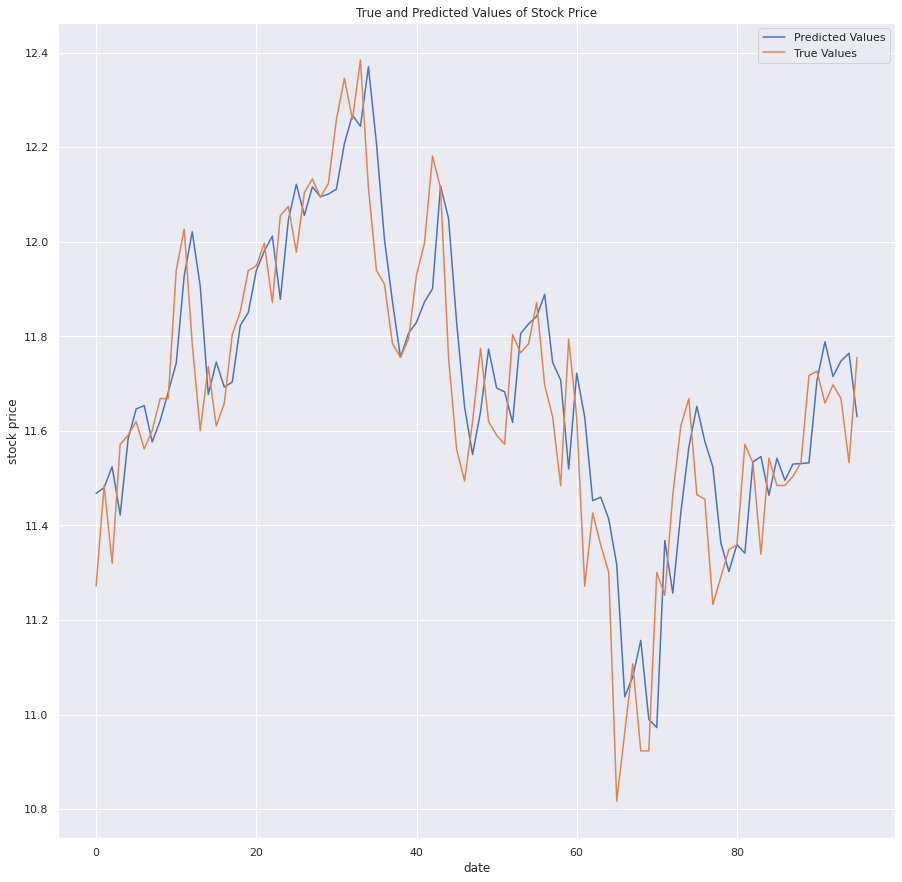

In [260]:
model_evaluation(inv_y_5_AMCR, inv_yhat_bagging_5_AMCR, bagging_5_AMCR)

  Metric     Score
0   EVAR  0.728590
1    CoD  0.726385
2    MAE  0.132901
3    MSE  0.027191
4   RMSE  0.164897
5  MedAE  0.103253
6     ME  0.542169
7   MAPE  0.011414


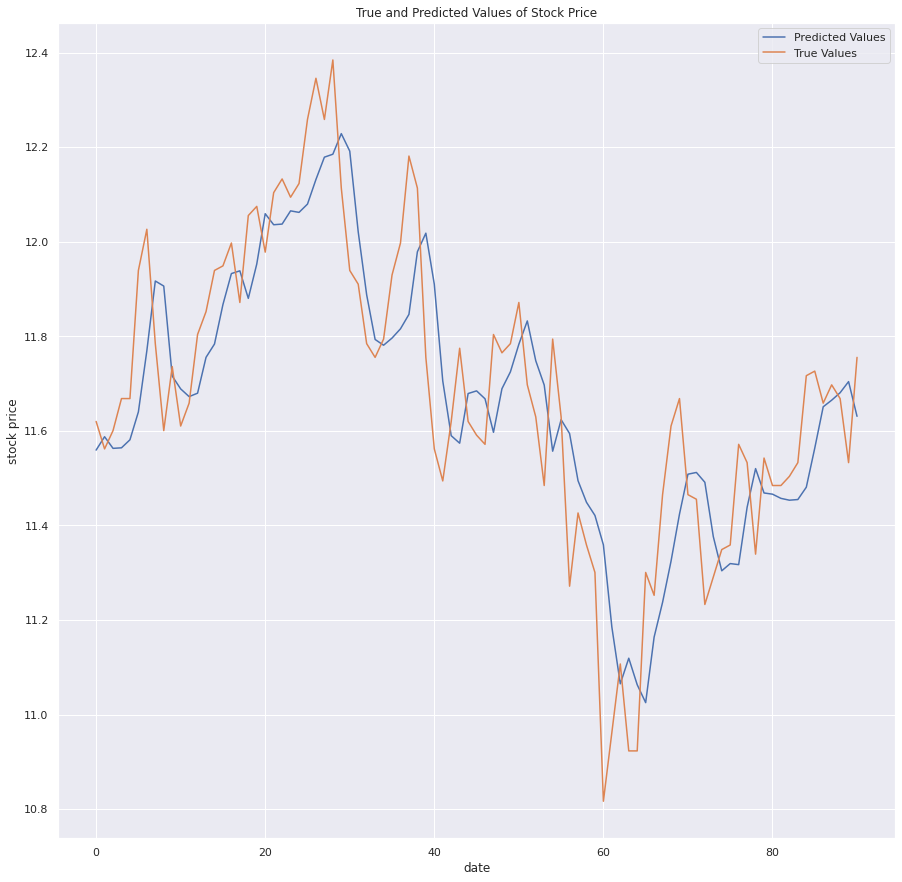

In [261]:
model_evaluation(inv_y_10_AMCR, inv_yhat_bagging_10_AMCR, bagging_10_AMCR)

  Metric     Score
0   EVAR  0.765192
1    CoD  0.765182
2    MAE  0.127684
3    MSE  0.025541
4   RMSE  0.159815
5  MedAE  0.112659
6     ME  0.530814
7   MAPE  0.010992


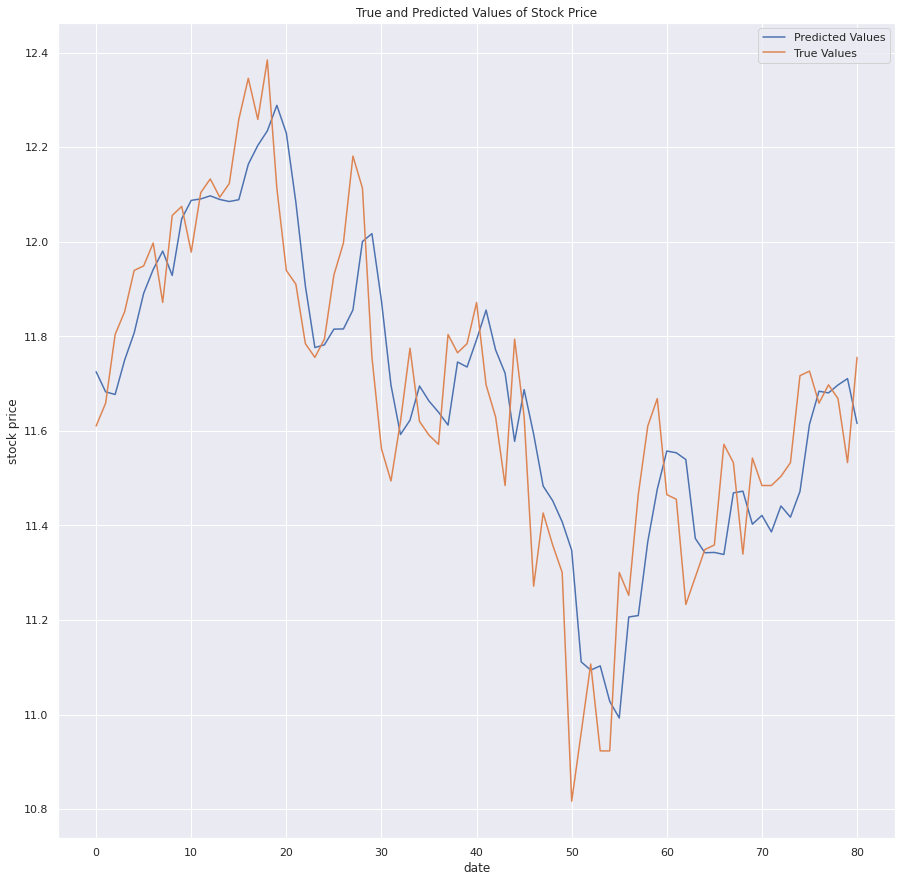

In [262]:
model_evaluation(inv_y_20_AMCR, inv_yhat_bagging_20_AMCR, bagging_20_AMCR)

  Metric         Score
0   EVAR      0.833771
1    CoD      0.790760
2    MAE    173.312093
3    MSE  50407.808354
4   RMSE    224.516833
5  MedAE    126.225833
6     ME    524.031160
7   MAPE      0.031953


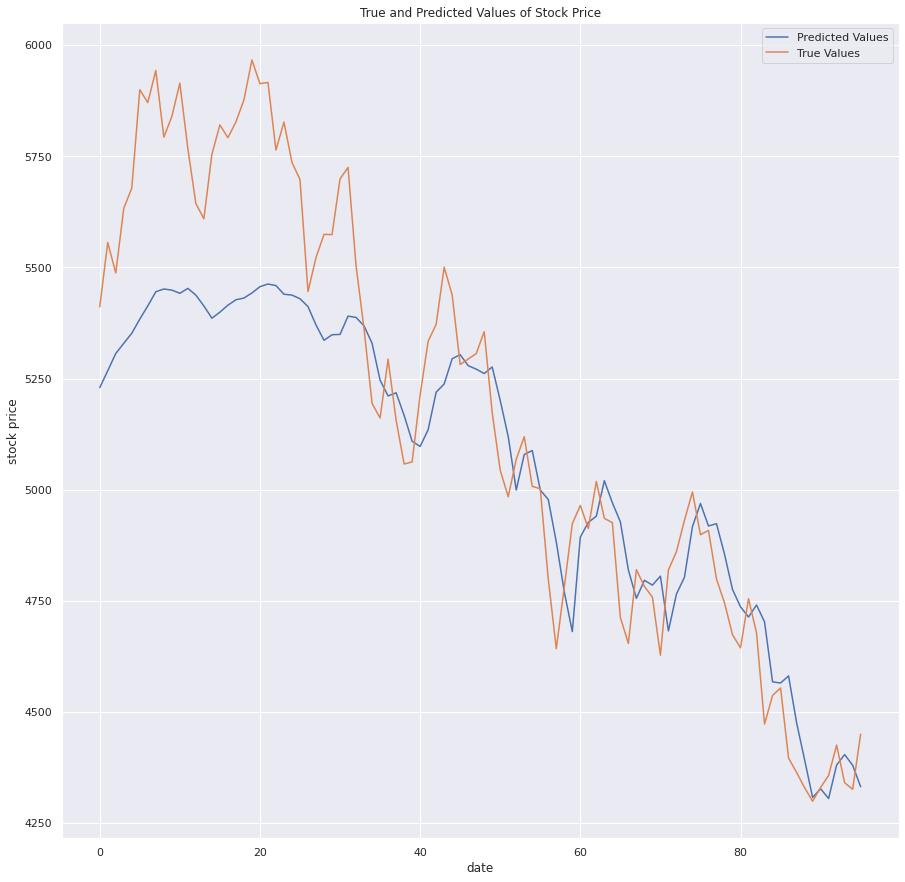

In [263]:
model_evaluation(inv_y_5_NVR, inv_yhat_bagging_5_NVR, bagging_5_NVR)

  Metric         Score
0   EVAR      0.839373
1    CoD      0.788900
2    MAE    174.114843
3    MSE  51705.512846
4   RMSE    227.388462
5  MedAE    115.251982
6     ME    522.918509
7   MAPE      0.032114


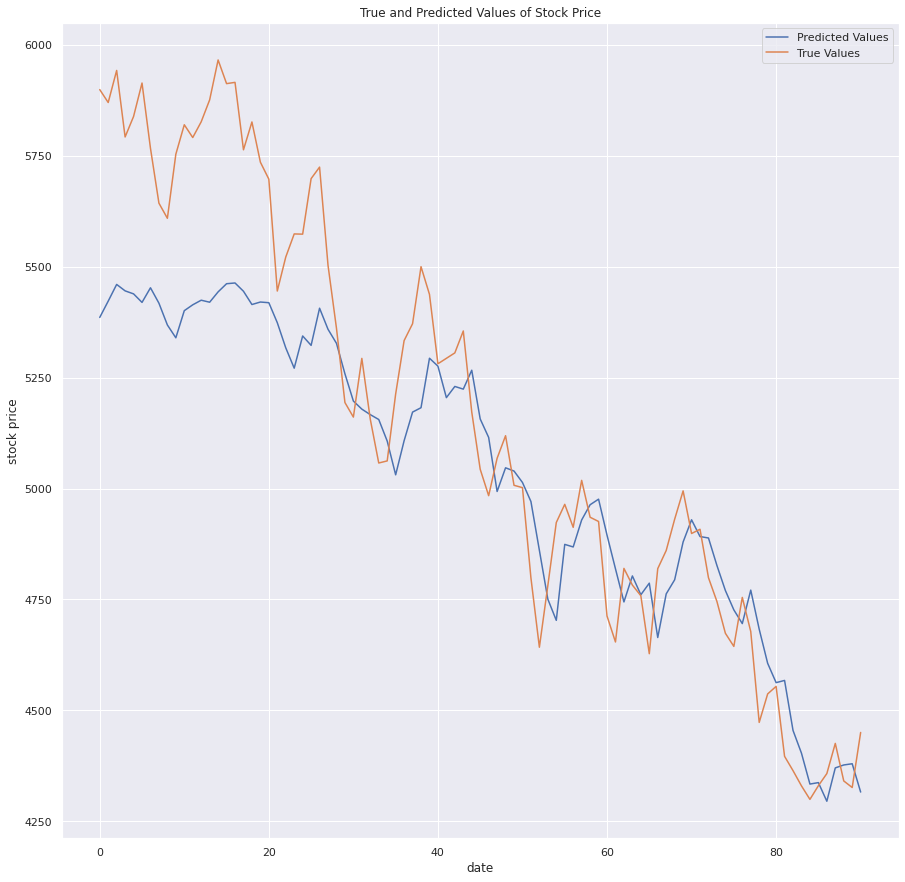

In [264]:
model_evaluation(inv_y_10_NVR, inv_yhat_bagging_10_NVR, bagging_10_NVR)

  Metric         Score
0   EVAR      0.873608
1    CoD      0.869717
2    MAE    132.004046
3    MSE  27820.043749
4   RMSE    166.793416
5  MedAE     94.231048
6     ME    427.905029
7   MAPE      0.025380


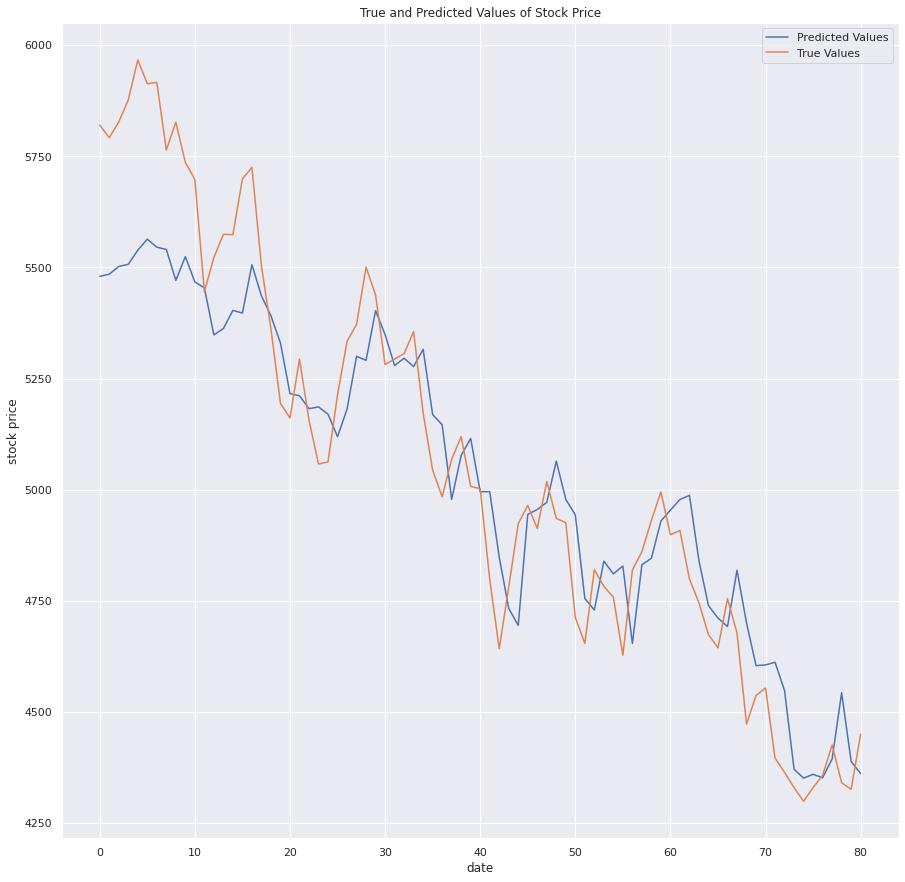

In [265]:
model_evaluation(inv_y_20_NVR, inv_yhat_bagging_20_NVR, bagging_20_NVR)

# Bibliography

Bland, G. 2022. yfinance Library – A Complete Guide. Available at: https://algotrading101.com/learn/yfinance-guide/ [Accessed: 15/03/22]

Wikipedia. 2022. List of S&P 500 companies. Available at: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies [Accessed: 15/04/22]

Lakhotia, N, 2020. Web Scraping a Wikipedia Table into a Dataframe. Available at: https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451 [Accessed: 15/04/22]

https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

https://keras.io/keras_tuner/